# Carga de información en un DataFrame

In [ ]:
!pip install mglearn
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
import seaborn as sns
from matplotlib.gridspec import GridSpec

import scipy.stats
%matplotlib inline
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id='1rNmTHqd36tXWK3hvYhb5q4niyCC14Im9'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_labels.csv')

Leemos los datos, agregandole el tipo de dato a cada columna. 

In [ ]:
data_train = pd.read_csv('train_labels.csv', encoding='latin-1', dtype={'building_id': 'int64', 'damage_grade': 'int64'})

In [ ]:
id='1Dq8-cxuayjGeOyGHUHyFG2XXVWPwgQLb'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('train_values.csv')

In [ ]:
data_values = pd.read_csv('train_values.csv', encoding='latin-1', dtype = {'building_id': 'int64', 'geo_level_2_id': 'int64', 'geo_level_3_id': 'int64',\
                                                                           'count_floors_pre_eq': 'int64', 'age': 'int64', 'area_percentage': 'int64', \
                                                                           'height_percentage': 'int64', 'land_surface_condition': 'category',\
                                                                           'foundation_type': 'category', 'roof_type': 'category', 'ground_floor_type': 'category',\
                                                                           'other_floor_type': 'category', 'position': 'category', 'plan_configuration': 'category',\
                                                                           'has_superstructure_adobe_mud': 'boolean', 'has_superstructure_mud_mortar_stone': 'boolean', \
                                                                           'has_superstructure_stone_flag': 'boolean', 'has_superstructure_cement_mortar_stone': 'boolean',\
                                                                           'has_superstructure_mud_mortar_brick': 'boolean', 'has_superstructure_cement_mortar_brick': 'boolean',\
                                                                           'has_superstructure_timber': 'boolean', 'has_superstructure_bamboo': 'boolean',\
                                                                           'has_superstructure_rc_non_engineered': 'boolean', 'has_superstructure_rc_engineered': 'boolean',\
                                                                           'has_superstructure_other': 'boolean', 'legal_ownership_status': 'category', 'count_families': 'int64', \
                                                                           'has_secondary_use': 'boolean', 'has_secondary_use_agriculture': 'boolean', 'has_secondary_use_hotel': 'boolean', \
                                                                           'has_secondary_use_rental': 'boolean', 'has_secondary_use_institution': 'boolean', 'has_secondary_use_school': 'boolean',\
                                                                           'has_secondary_use_industry': 'boolean', 'has_secondary_use_health_post': 'boolean', \
                                                                           'has_secondary_use_gov_office': 'boolean', 'has_secondary_use_use_police': 'boolean', 'has_secondary_use_other': 'boolean'})

# Analizando propiedades específicas del DataFrame

## Verificación de calidad de los datos

Observamos los datos y chequamos que esten bien cargados.

In [ ]:
data_train.tail()

building_id  damage_grade
260596       688636             2
260597       669485             3
260598       602512             3
260599       151409             2
260600       747594             3

In [ ]:
data_values.tail()

building_id  ...  has_secondary_use_other
260596       688636  ...                    False
260597       669485  ...                    False
260598       602512  ...                    False
260599       151409  ...                    False
260600       747594  ...                    False

[5 rows x 39 columns]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [ ]:
data_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

En una primera instancia pareciera que los datos se cargaron correctamente, y no hay datos nulos, lo cual indicaría que están parcialmente limpios. Además, tiene sentido que ambos DataFrames tengan la misma cantidad de filas (una por edificio).

In [ ]:
data = data_values.merge(data_train, on='building_id', how='inner')

In [ ]:
%%R
labels_R <- read.csv('train_labels.csv', header=TRUE)
values_R <- read.csv('train_values.csv', header=TRUE)
data_R <- merge(labels_R, values_R, by='building_id')
summary(data_R)

  building_id       damage_grade   geo_level_1_id geo_level_2_id  
 Min.   :      4   Min.   :1.000   Min.   : 0.0   Min.   :   0.0  
 1st Qu.: 261190   1st Qu.:2.000   1st Qu.: 7.0   1st Qu.: 350.0  
 Median : 525757   Median :2.000   Median :12.0   Median : 702.0  
 Mean   : 525676   Mean   :2.238   Mean   :13.9   Mean   : 701.1  
 3rd Qu.: 789762   3rd Qu.:3.000   3rd Qu.:21.0   3rd Qu.:1050.0  
 Max.   :1052934   Max.   :3.000   Max.   :30.0   Max.   :1427.0  
 geo_level_3_id  count_floors_pre_eq      age         area_percentage  
 Min.   :    0   Min.   :1.00        Min.   :  0.00   Min.   :  1.000  
 1st Qu.: 3073   1st Qu.:2.00        1st Qu.: 10.00   1st Qu.:  5.000  
 Median : 6270   Median :2.00        Median : 15.00   Median :  7.000  
 Mean   : 6258   Mean   :2.13        Mean   : 26.54   Mean   :  8.018  
 3rd Qu.: 9412   3rd Qu.:2.00        3rd Qu.: 30.00   3rd Qu.:  9.000  
 Max.   :12567   Max.   :9.00        Max.   :995.00   Max.   :100.000  
 height_percentage land_sur

In [ ]:
data.head(5)

building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
0       802906               6  ...                    False             3
1        28830               8  ...                    False             2
2        94947              21  ...                    False             3
3       590882              22  ...                    False             2
4       201944              11  ...                    False             3

[5 rows x 40 columns]

In [ ]:
data.shape

(260601, 40)

Tiene la misma cantidad de filas. Entonces existió una correspondecia uno a uno entre ambos data sets. Vemos también que no hay datos repetidos:

In [ ]:
data['building_id'].duplicated().any()

False

Analizamos ahora si los datos tienen valores con sentido. En primer lugar, si un edificio tiene un uso secundario (columna has_secondary_use) entonces tendrá que tener en True alguna de los usos secundarios ofrecidos. Veamos que esto sucede:


In [ ]:
data.shape[0] == (data['has_secondary_use'] == data['has_secondary_use_agriculture'] + data['has_secondary_use_agriculture'] + data['has_secondary_use_hotel']	+ data['has_secondary_use_rental'] + data['has_secondary_use_institution'] +	data['has_secondary_use_school'] + data['has_secondary_use_industry'] + data['has_secondary_use_health_post'] + data['has_secondary_use_gov_office'] + data['has_secondary_use_use_police'] + data['has_secondary_use_other']).count()

True

Otra característica que podemos corroborar inmediatamente es que area_percentage y height_percentage tengan todos valores entre 0 y 100, ya que son porcentajes. Tal como se muestra a continuación, esto sucede para todos los casos.

In [ ]:
data.loc[(data['area_percentage'] > 100) | (data['area_percentage'] < 0)].shape[0] + data.loc[(data['height_percentage'] > 100) | (data['height_percentage'] < 0)].shape[0] 

0

Por el momento no filtraremos ningún dato, dado que parecen estar limpios. 

In [ ]:
maximo=data['geo_level_2_id'].max()
es_unico=True

for i in range(maximo):
  region=data.loc[data['geo_level_2_id']==i]['geo_level_1_id'].drop_duplicates()
  region_superior=region.to_list()
  if(len(region_superior)>1):
    es_unico=False

es_unico

True

In [ ]:
maximo=data['geo_level_3_id'].max()
es_unico=True

for i in range(maximo):
  region=data.loc[data['geo_level_3_id']==i]['geo_level_2_id'].drop_duplicates()
  region_superior=region.to_list()
  if(len(region_superior)>1):
    es_unico=False

es_unico

True

## Análisis inicial de los datos

Comenzamos analizado ** La edad de las edificaciones **

Text(0.5, 1.0, 'Cantidad de Edificios Según Su Edad')

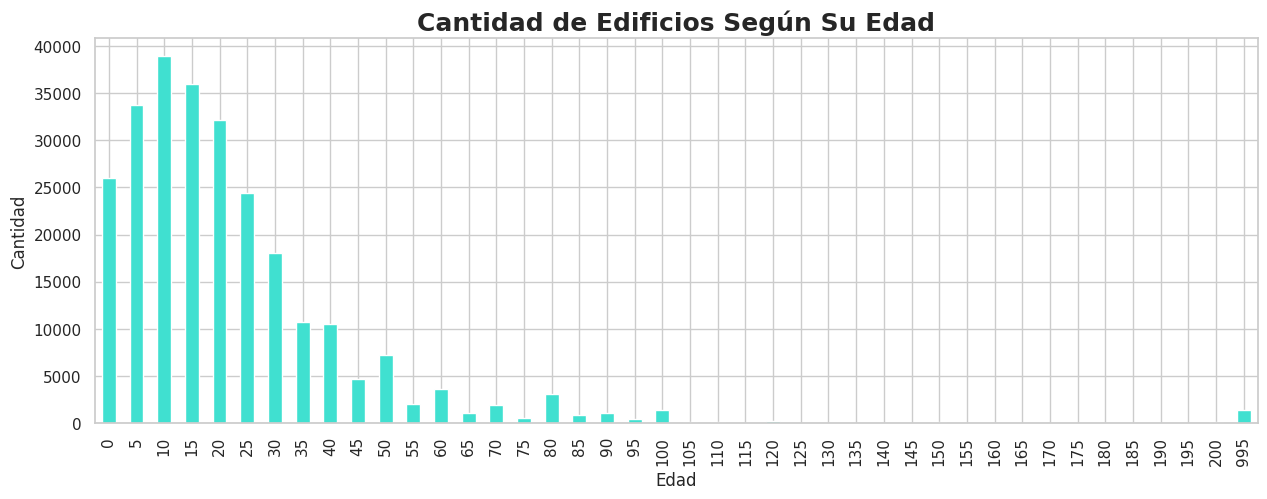

In [ ]:
age = data['age']
age.value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(15,5),color="turquoise")
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.title("Cantidad de Edificios Según Su Edad",weight='bold',size=18)

Podemos apreciar que la mayor parte de las edificaciones datan de los últimos 25 años.

Además, registramos un conjunto de edificaciones con edad de 995 años, los cuales notificamos como valores anormales. Esto podría deberse a no saber la edad exacta de una edificación agrupandolas por default en 995, o simplemente podría ser una carga incorrecta de los datos.

Otra variable que tiene un interés inicial es ** la altura de las edificaciones **, ya que a mayor altura, el análisis resulta de mayor interés

In [ ]:
height = data['height_percentage']
height.value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

Text(0.5, 1.0, 'Histograma de la Cantidad de Edificios Según Su Estatura')

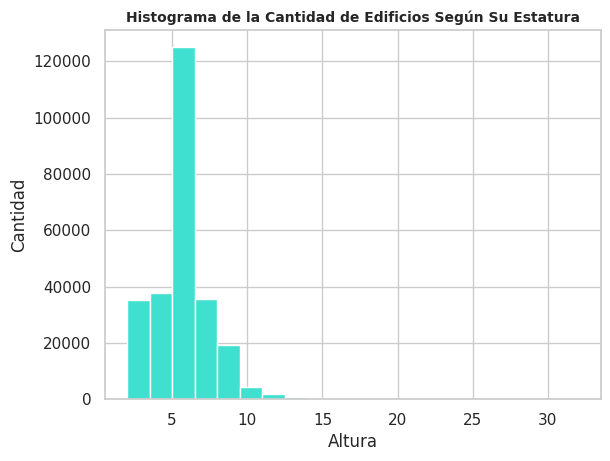

In [ ]:
height.plot(kind='hist', bins=20,color="turquoise" )
plt.xlabel('Altura')
plt.ylabel('Cantidad')
plt.title("Histograma de la Cantidad de Edificios Según Su Estatura",weight='bold',size=10)

La mayor parte de los edificios concentran su altura normalizada entre los 5 y 7.

## Analizando la utilización de memoria del DataFrame

In [ ]:
data.dtypes

building_id                                  int64
geo_level_1_id                               int64
geo_level_2_id                               int64
geo_level_3_id                               int64
count_floors_pre_eq                          int64
age                                          int64
area_percentage                              int64
height_percentage                            int64
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud               boolean
has_superstructure_mud_mortar_stone        boolean
has_superstructure_stone_flag              boolean
has_superstructure_cement_mortar_stone     boolean
has_superstructure_mud_mortar_b

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [ ]:
(data.memory_usage() / (1024)).sum()

35630.51171875

## Analizando variables estadísticas iniciales

In [ ]:
data.select_dtypes('number')

building_id  geo_level_1_id  ...  count_families  damage_grade
0            802906               6  ...               1             3
1             28830               8  ...               1             2
2             94947              21  ...               1             3
3            590882              22  ...               1             2
4            201944              11  ...               1             3
...             ...             ...  ...             ...           ...
260596       688636              25  ...               1             2
260597       669485              17  ...               1             3
260598       602512              17  ...               1             3
260599       151409              26  ...               1             2
260600       747594              21  ...               3             3

[260601 rows x 10 columns]

In [ ]:
data.describe()

building_id  ...         damage_grade
count           260,601.00  ...           260,601.00
mean            525,675.48  ...                 2.24
std             304,545.00  ...                 0.61
min                   4.00  ...                 1.00
25%             261,190.00  ...                 2.00
50%             525,757.00  ...                 2.00
75%             789,762.00  ...                 3.00
max           1,052,934.00  ...                 3.00

[8 rows x 10 columns]

Se listan solo las variables numéricas, que tienen relevancia para un análisis estadístico.

Podemos sacar algunas conclusiones:

* `building_id` no presenta una distribución continua, comienza en 4, su máximo es 1,052,934 con 260 mil elementos.
* La edad más grande es de 995 años, podría o no ser un error.
* Tenemos gran variación en los tipos numéricos, por lo cual, tenemos gran cantidad de posibilidades para indagar, comparar y analizar en las siguientes etapas.



# Analizando el grado del daño

Para comenzar el análisis, ponemos el foco de atención en la Variable Aleatoria Discreta (Categórica) de respuesta

 $Y \equiv $ "Grado del daño recibido".

Esta es la variable más importante del set de datos. Luego del análisis exploratorio buscaremos predecirla. En este sentido, realizaremos modelos que estimen su comportamiento conociendo muestras de las demás Variables Aleatorias regresoras o explicativas $X_{i}$. Por el momento $0<i<n = 38$. Sin embargo existe la posibilidad de que combinemos variables o eliminemos otras si es necesario, de modo tal que no podemos afirmar que la cantidad de Variables Aleatorias que tenemos se mantendrá constante. 


## Descripción y visualización inicial de la variable

In [ ]:
data['damage_grade'].describe()

count             260,601.00
mean                    2.24
std                     0.61
min                     1.00
25%                     2.00
50%                     2.00
75%                     3.00
max                     3.00
Name: damage_grade, dtype: float64

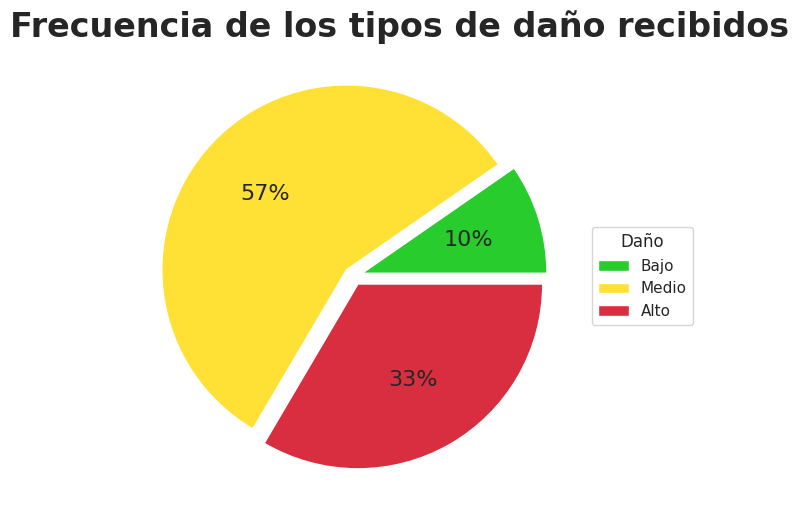

In [ ]:
damage_df = (data.groupby('damage_grade').size()).to_frame()
damage_df.columns = ['Frecuencia']
damage_df.index = ['', '', '']
explode = (0.05, 0.05, 0.05)
g = damage_df.plot.pie(y='Frecuencia', figsize= (10, 6), fontsize=16 ,autopct='%1.0f%%', colors = ['#28CC2D', '#FFE135', '#D82E3F'], explode=explode)
g.set_title('Frecuencia de los tipos de daño recibidos', size=24, y =1, x=0.6, weight='bold')
g.set_ylabel("")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

[Text(0, 0, 'Daño menor'),
 Text(0, 0, 'Daño mediano'),
 Text(0, 0, 'Daño mayor')]

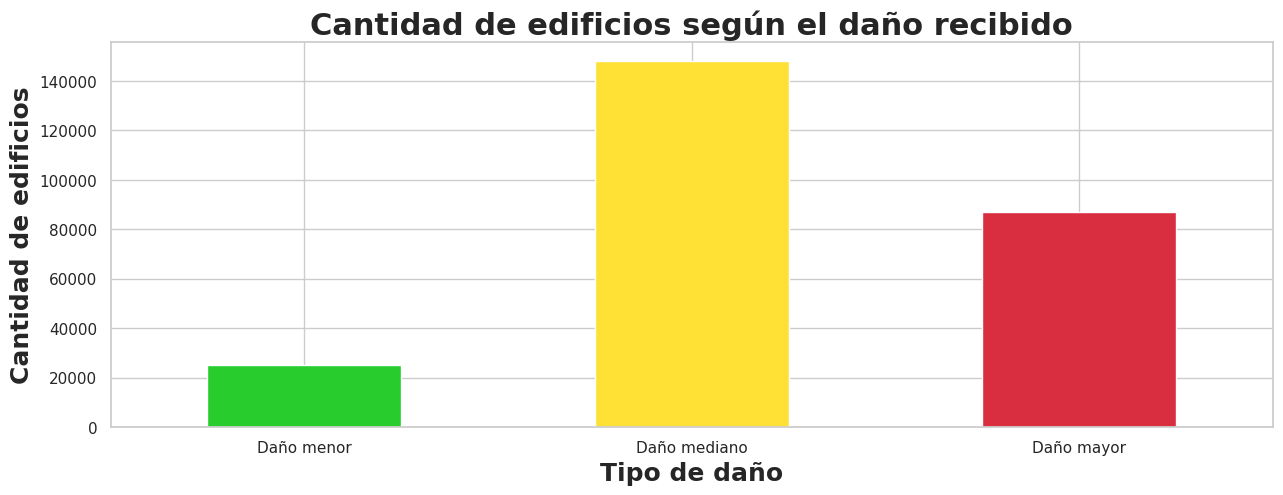

In [ ]:
g = data.groupby('damage_grade').size().plot(kind='bar', figsize=(15,5), rot=0, color=['#28CC2D', '#FFE135', '#D82E3F'])
g.set_title("Cantidad de edificios según el daño recibido", weight='bold', size=22)
g.set_xlabel("Tipo de daño", size=18, weight='bold')
g.set_ylabel("Cantidad de edificios", size=18, weight='bold')
g.set_xticklabels(['Daño menor','Daño mediano', 'Daño mayor'])

Veamos como se correlacionan las variables con la variable Y. Separamos con colores de tonalidad las distintas familias de variables aleatorias que se pueden diferenciar según su característica

   1. Zona geográfica (Amarillo): geo_level_1_id, geo_level_2_id, geo_level_3_id. 
   2. Las de tamaño y edad (Azules): count_floors_pre_eq, age, area_percentage y height_percentage.
   3. Materiales de construcción (Violetas): todas aquellas que comienzan con has_superstructure.
   4. Cantidad de Familias (Marrón).
   5. Uso Secundario (Verdes).

In [ ]:
# hacemos un primer analisis para las que se pueden considerar como Variables Aleatorias al tener valores numericos.
variables = []
correlation = []
for i in range(1,39):
  if type(data[data.columns[i]][0]) != type(data['legal_ownership_status'][0]):
    variables.append(data.columns[i])
    correlation.append(scipy.stats.pearsonr(data[data.columns[i]], data['damage_grade'])[0])

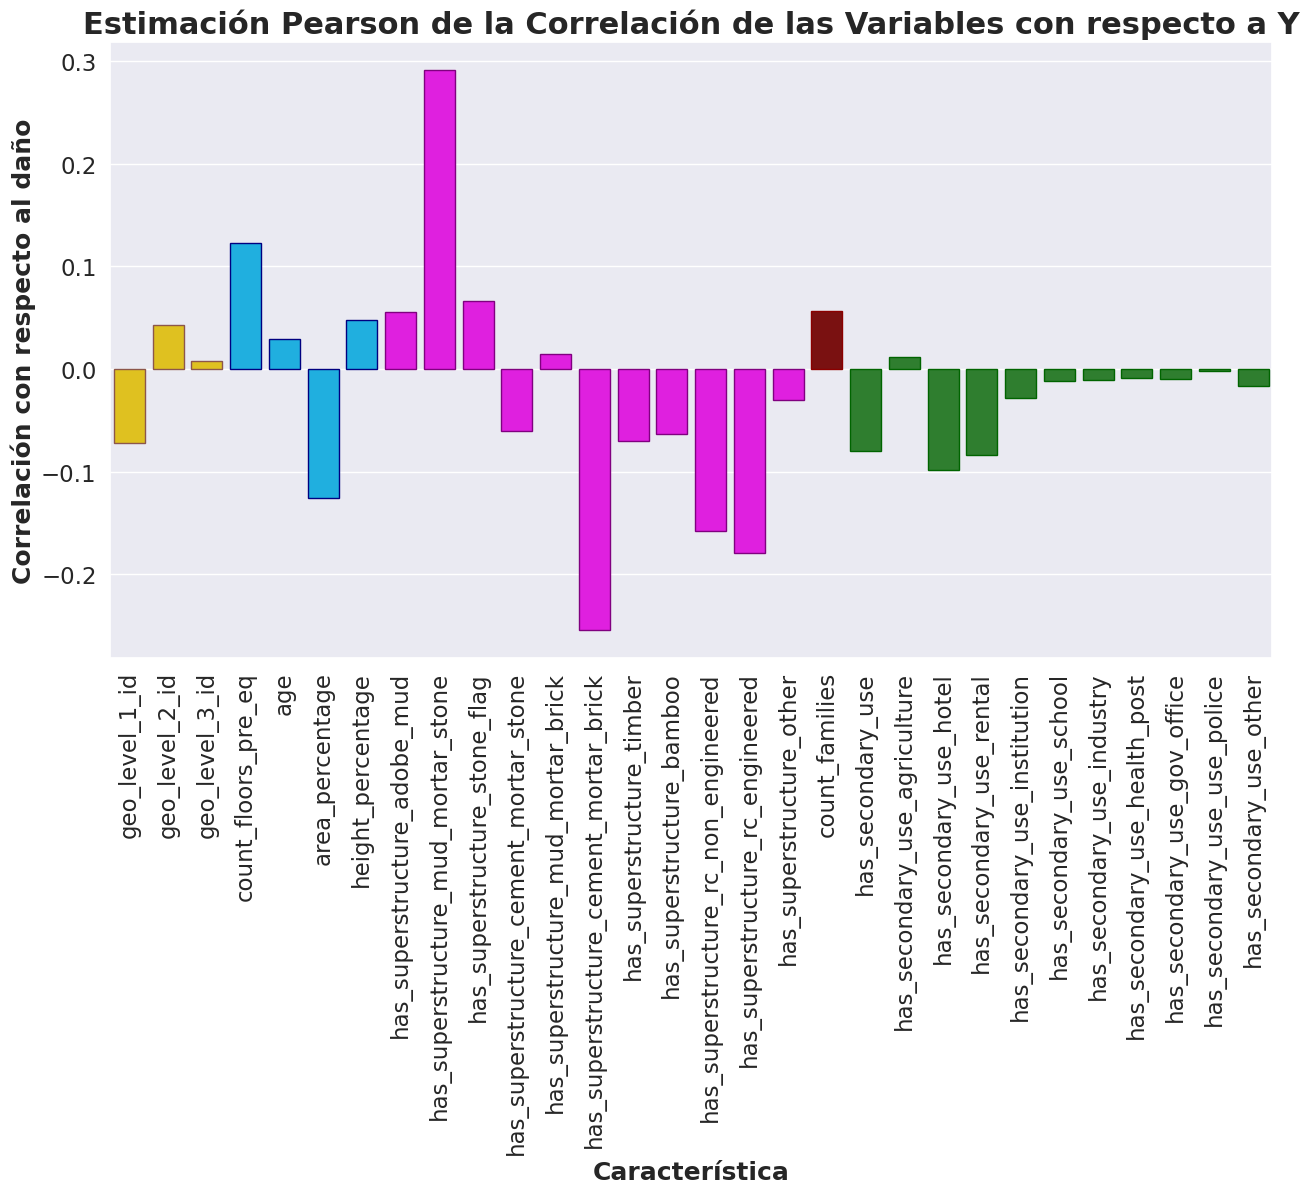

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
#g = sns.barplot(variables,correlation, palette =sns.color_palette())
g = sns.barplot(variables,correlation, palette =['gold', 'gold','gold', 'deepskyblue', 'deepskyblue','deepskyblue','deepskyblue', 'fuchsia','fuchsia',\
                                                 'fuchsia', 'fuchsia','fuchsia','fuchsia', 'fuchsia','fuchsia','fuchsia', 'fuchsia','fuchsia','darkred',\
                                                 'forestgreen','forestgreen','forestgreen', 'forestgreen','forestgreen','forestgreen', 'forestgreen',\
                                                 'forestgreen','forestgreen', 'forestgreen','forestgreen'], \
                edgecolor= ['tab:brown', 'tab:brown','tab:brown', 'navy', 'navy','navy','navy', 'purple','purple',\
                                                 'purple', 'purple','purple','purple', 'purple','purple','purple', 'purple','purple','darkred',\
                                                 'darkgreen','darkgreen','darkgreen', 'darkgreen','darkgreen','darkgreen', 'darkgreen',\
                                                 'darkgreen','darkgreen', 'darkgreen','darkgreen'])
g.set_title("Estimación Pearson de la Correlación de las Variables con respecto a Y", size=22, weight='bold')
g.set_ylabel('Correlación con respecto al daño', weight='bold')
g.set_xlabel('Característica', weight='bold')

plt.xticks(rotation=90)
plt.show()

De este gráfico de correlaciones extraemos ciertas variables que debemos analizar si o si, dado que su correlación (en módulo) con la variable importante a analizar es significativa en comparación con las demas variables.

Es esperable que la variable "Cantidad de pisos" tenga una correlación positiva y fuerte (en comparación con las demás), dado que a mayor cantidad de pisos, menos estable es una estructura, y por lo tanto, mayor es el riesgo de desastre. Lo mismo ocurre para la variables "estructa de tipo barro y piedra": Es sabido que estos materiales no son los más resistentes. 

En contraste, la variable estructural "Estructa de cemento y ladrillo", tiene una correlación negativa y fuerte, pues soporta más daños. Otras estructuras que parecieran tener una buena resistencia a sismos son aquellas que fueron construidas con concreto reforzado. 

Las variables de usabilidad tienen en general una correlación baja con la variable en cuestión. Sin embargo se puede observar que en general son más resistentes a los sismos que la media. Esto se puede deber a que estas edificaciones suelen pasar por más controles de normas de seguridad. 

 
Es interesante observar también la correlación de la variable principal con las variables categóricas del DataFrame. Al no ser numéricas, no las podemos estudiar en conjunto. Por lo tanto aplicamos el método conocido por la comunidad como One Hot Encoding para generar una columna con contenido binario por cada categoría posible.


In [ ]:
binary = data
for column in data.columns:
    if type(data[column][0]) == str:
      list_categories = data[column].value_counts().reset_index()['index'].to_list()
      for category in list_categories:
        binary[column + ' is ' + category] = binary[column] == category
      print(column)
    if(column != 'damage_grade'):
       binary = binary.drop(columns=column)

binary.head()

land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
legal_ownership_status


damage_grade  ...  legal_ownership_status is r
0             3  ...                        False
1             2  ...                        False
2             3  ...                        False
3             2  ...                        False
4             3  ...                        False

[5 rows x 39 columns]

In [ ]:
# hacemos un primer analisis para las que se pueden considerar como Variables Aleatorias al tener valores numericos.
variables = []
correlation = []
for i in range(1,39):
  variables.append(binary.columns[i])
  correlation.append(scipy.stats.pearsonr(binary[binary.columns[i]], binary['damage_grade'])[0])

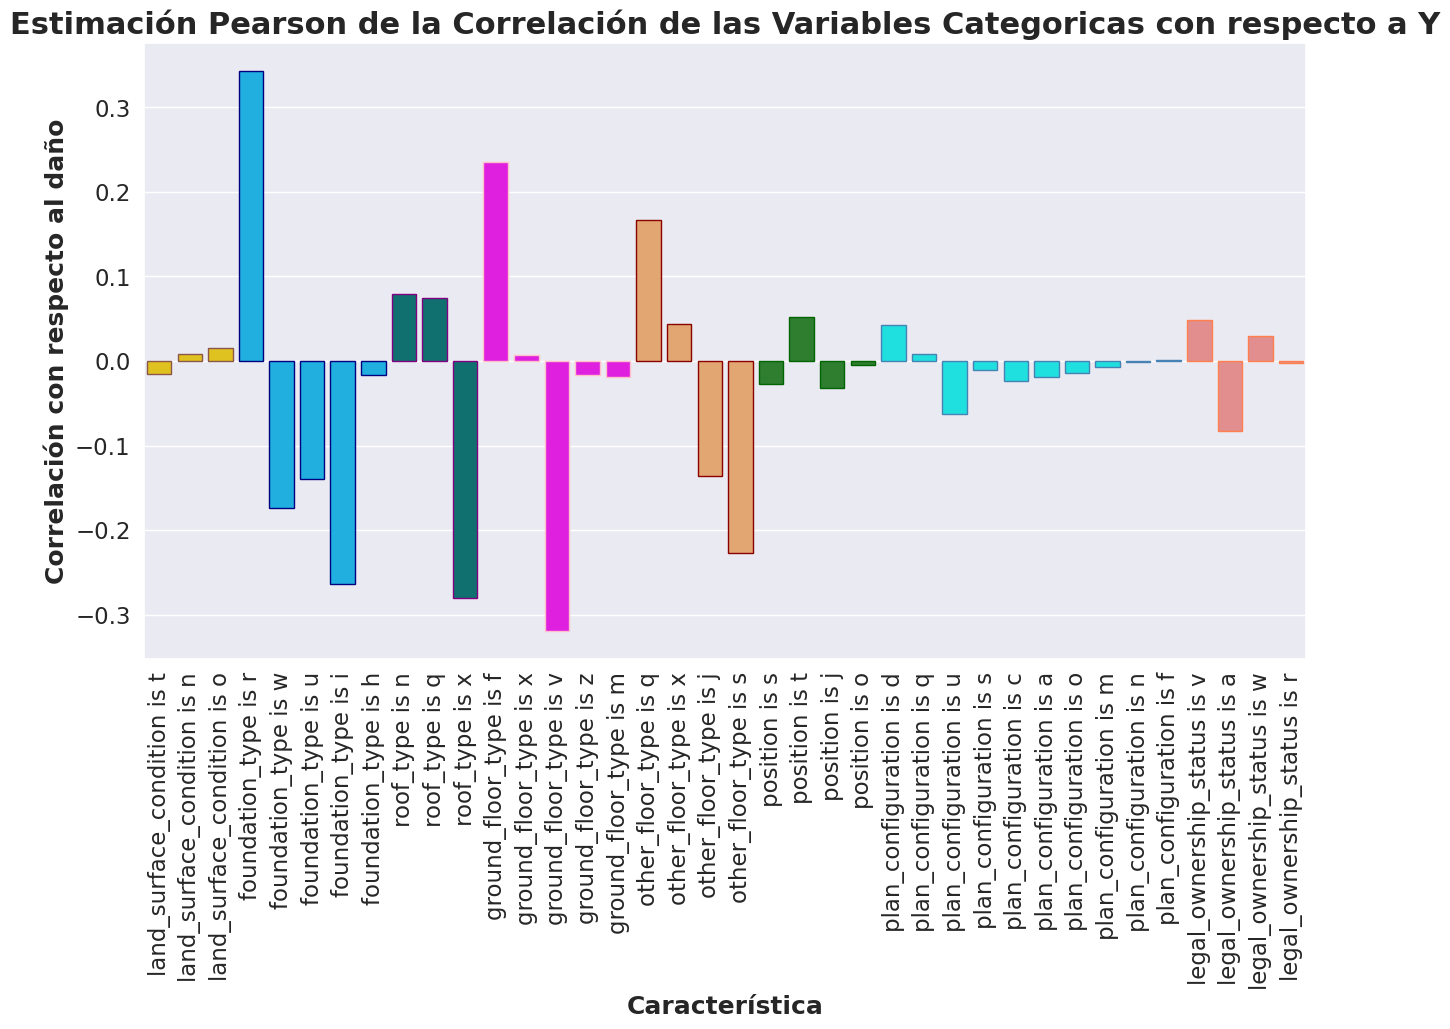

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(font_scale = 1.5)
g = sns.barplot(variables,correlation, palette =['gold', 'gold','gold', 'deepskyblue', 'deepskyblue','deepskyblue','deepskyblue', 'deepskyblue','teal',\
                                                 'teal', 'teal','fuchsia','fuchsia', 'fuchsia','fuchsia','fuchsia', 'sandybrown','sandybrown','sandybrown',\
                                                 'sandybrown','forestgreen','forestgreen', 'forestgreen','forestgreen','aqua', 'aqua',\
                                                 'aqua','aqua', 'aqua','aqua','aqua','aqua','aqua','aqua','lightcoral','lightcoral','lightcoral','lightcoral'], \
                edgecolor= ['tab:brown', 'tab:brown','tab:brown', 'navy', 'navy','navy','navy', 'navy','purple',\
                                                 'purple', 'purple','pink','pink', 'pink','pink','pink', 'darkred','darkred','darkred',\
                                                 'darkred','darkgreen','darkgreen', 'darkgreen','darkgreen','steelblue', 'steelblue',\
                                                 'steelblue','steelblue', 'steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','coral','coral','coral','coral'])
g.set_title("Estimación Pearson de la Correlación de las Variables Categoricas con respecto a Y", size=22, weight='bold')
g.set_ylabel('Correlación con respecto al daño', weight='bold')
g.set_xlabel('Característica', weight='bold')

plt.xticks(rotation=90)
plt.show()

In [ ]:
useful_data = data_train
useful_data.head(10)

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3
5       333020             2
6       728451             3
7       475515             1
8       441126             2
9       989500             1

# Plantamiento de preguntas

# Visualizaciones

HACER INTRO

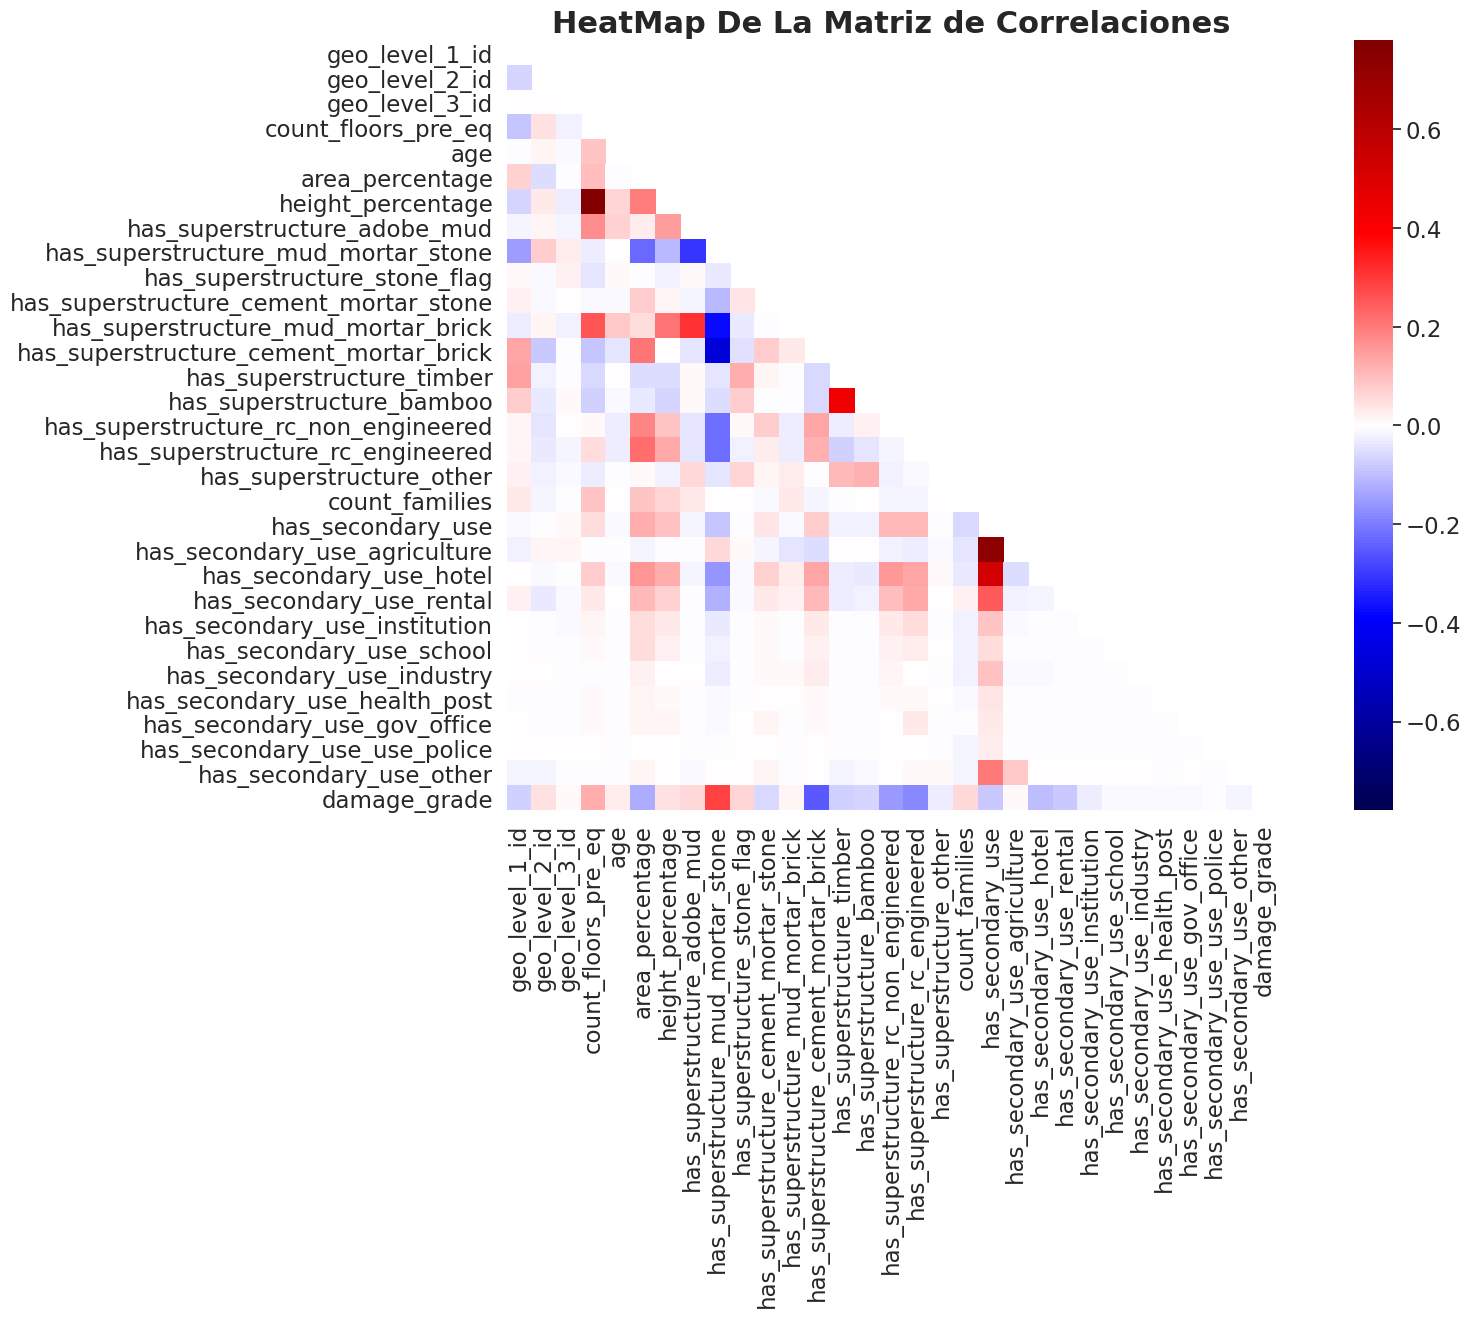

In [ ]:
corrMatrix = data.drop(columns='building_id').corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True    
with sns.axes_style("white"):
      f, ax = plt.subplots(figsize=(20, 10))
      ax = sns.heatmap(corrMatrix, mask=mask, vmin=-0.78, vmax=0.78, square=True, cmap='seismic')
      ax.set_title("HeatMap De La Matriz de Correlaciones", weight='bold', size=22)
plt.show()

#### Análisis del HeatMap:

Este gráfico muestra muchísimas relaciones entre las variables. Intentaremos analizar las cuestiones más significativas. 

Diferenciando en las Familias mencionadas, se pueden observar claras relaciones entre las mismas. 

En primer lugar, para aquellas de Uso Secundario, las correlación es muy cercana a cero (región a la izquierda e inferior del gráfico). Esto se debe a que generalmente si un edificio tiene una función, es muy probable que no tenga otra. Es poco común conocer un colegio que comparta espacios con una fábrica industrial. 

El hecho de que la correlación entre has_secondary_use y has_secondary_use_agriculture sea muy alta, nos indica que la gran mayoría de edificios con uso secundario son usadas con propósitos de agricultura. Hacemos el cálculo para mostrar esta afirmación.

In [ ]:
 data['has_secondary_use_agriculture'].sum() / data['has_secondary_use'].sum()

0.5754218685690767

En segundo lugar hay más hoteles, luego más edificios con propósito de renta, etc., siguiendo los tonos de rojo en la columna de has_secondary_use con respecto a las demás variables de su familia. 


Se cumple también un nivel de asociación relativamente alto entre las familias de Materiales de Construcción y la de Uso Secundario. Dejando de lado la variable de uso secundario para agronomía, se observa en la columna de has_superstructure_mud_mortar_stone que la correlación es negativa. Esto es, la mayoría de edificios con uso secundario, no están construidos con barro y piedra, la cual por el color rojizo que toma en la correlación con el grado de daño, indica que es de las estructuras menos resistentes. En contraposición, la correlación es mayor a cero con algunas de las estructuras que menos daño sufrieron: cement_mortar_brick y las de has_superstructure_rc. 

Esto pareciera fortalecer nuestra hipótesis previa: Los edificios con uso secundario suelen tener más controles de normas de seguridad. 

En adhisión, a excepción de los lugares de uso agrónomo, el volúmen de los edificios suele ser mayor. Esto se evidencia por la tonalidad de las columnas de area_percentage y height_percentage en relación a la familia de Uso Secundario.

Para la variable que indica una normalización de la altura, se observa naturalmente una relevante relación con la cantidad de pisos. Además, ésta aumenta a medida que aumenta el area del suelo.

# Visualización de variables numéricas

## Altura de los edificios

Analizaremos las variables `height_percentage` y `count_floors_pre_eq`

Text(0, 0.5, 'Frecuencia')

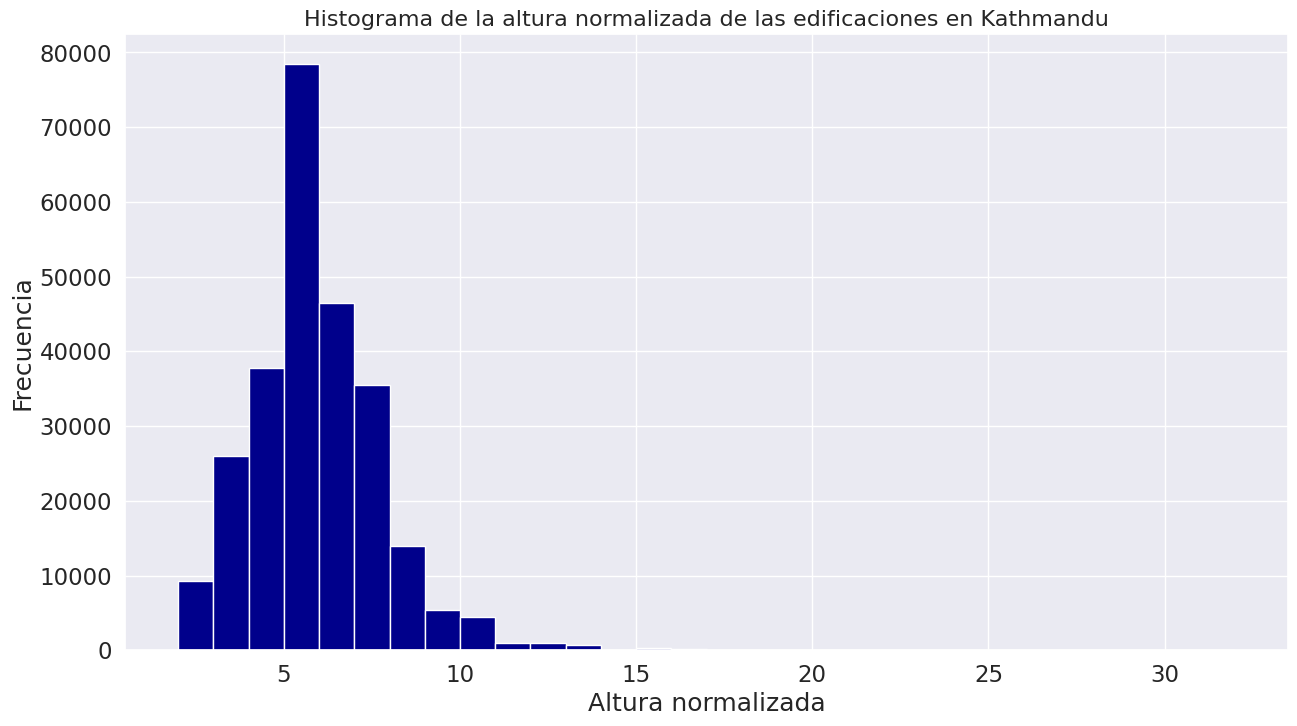

In [ ]:
g = data["height_percentage"].plot.hist(bins=30, color='darkblue')
g.set_title("Histograma de la altura normalizada de las edificaciones en Kathmandu", fontsize=16)
g.set_xlabel("Altura normalizada",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Podemos apreciar que la altura se normalizó a partir de edificios más altos.

La gran masa de edificios se concentra entre los valores 5 y 10.

Text(0, 0.5, 'Frecuencia')

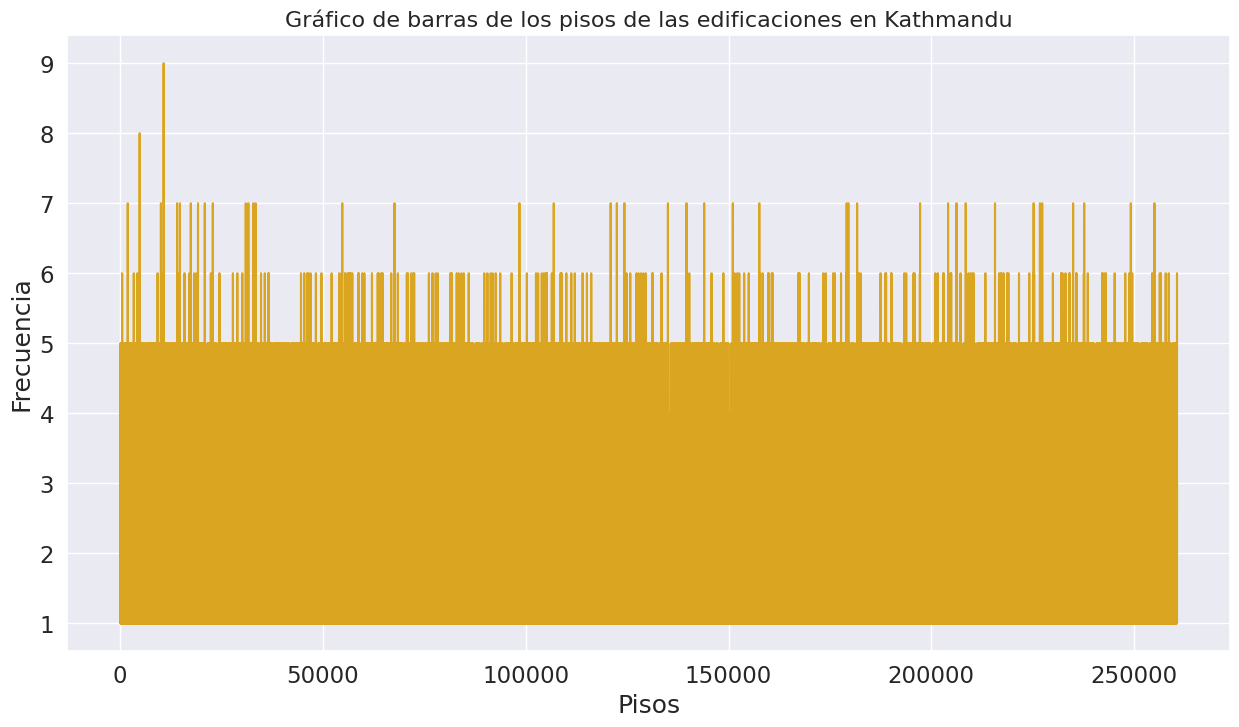

In [ ]:
g = data["count_floors_pre_eq"].plot(color='goldenrod')
g.set_title("Gráfico de barras de los pisos de las edificaciones en Kathmandu", fontsize=16)
g.set_xlabel("Pisos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

En este caso, la mayor parte de edificios tienen 2 pisos. Podemos ver que los edificios más altos en Kathmandu tienen 9 pisos.

In [ ]:
data["count_floors_pre_eq"].max()

9

A partir de aquí vamos a tratar de examinar casos de éxito y fracaso para estas alturas.

In [ ]:
min_damage = data[data["damage_grade"] == 1]
medium_damage = data[data["damage_grade"] == 2]
max_damage = data[data["damage_grade"] == 3]

Text(0.5, 0, 'Cantidad De Pisos')

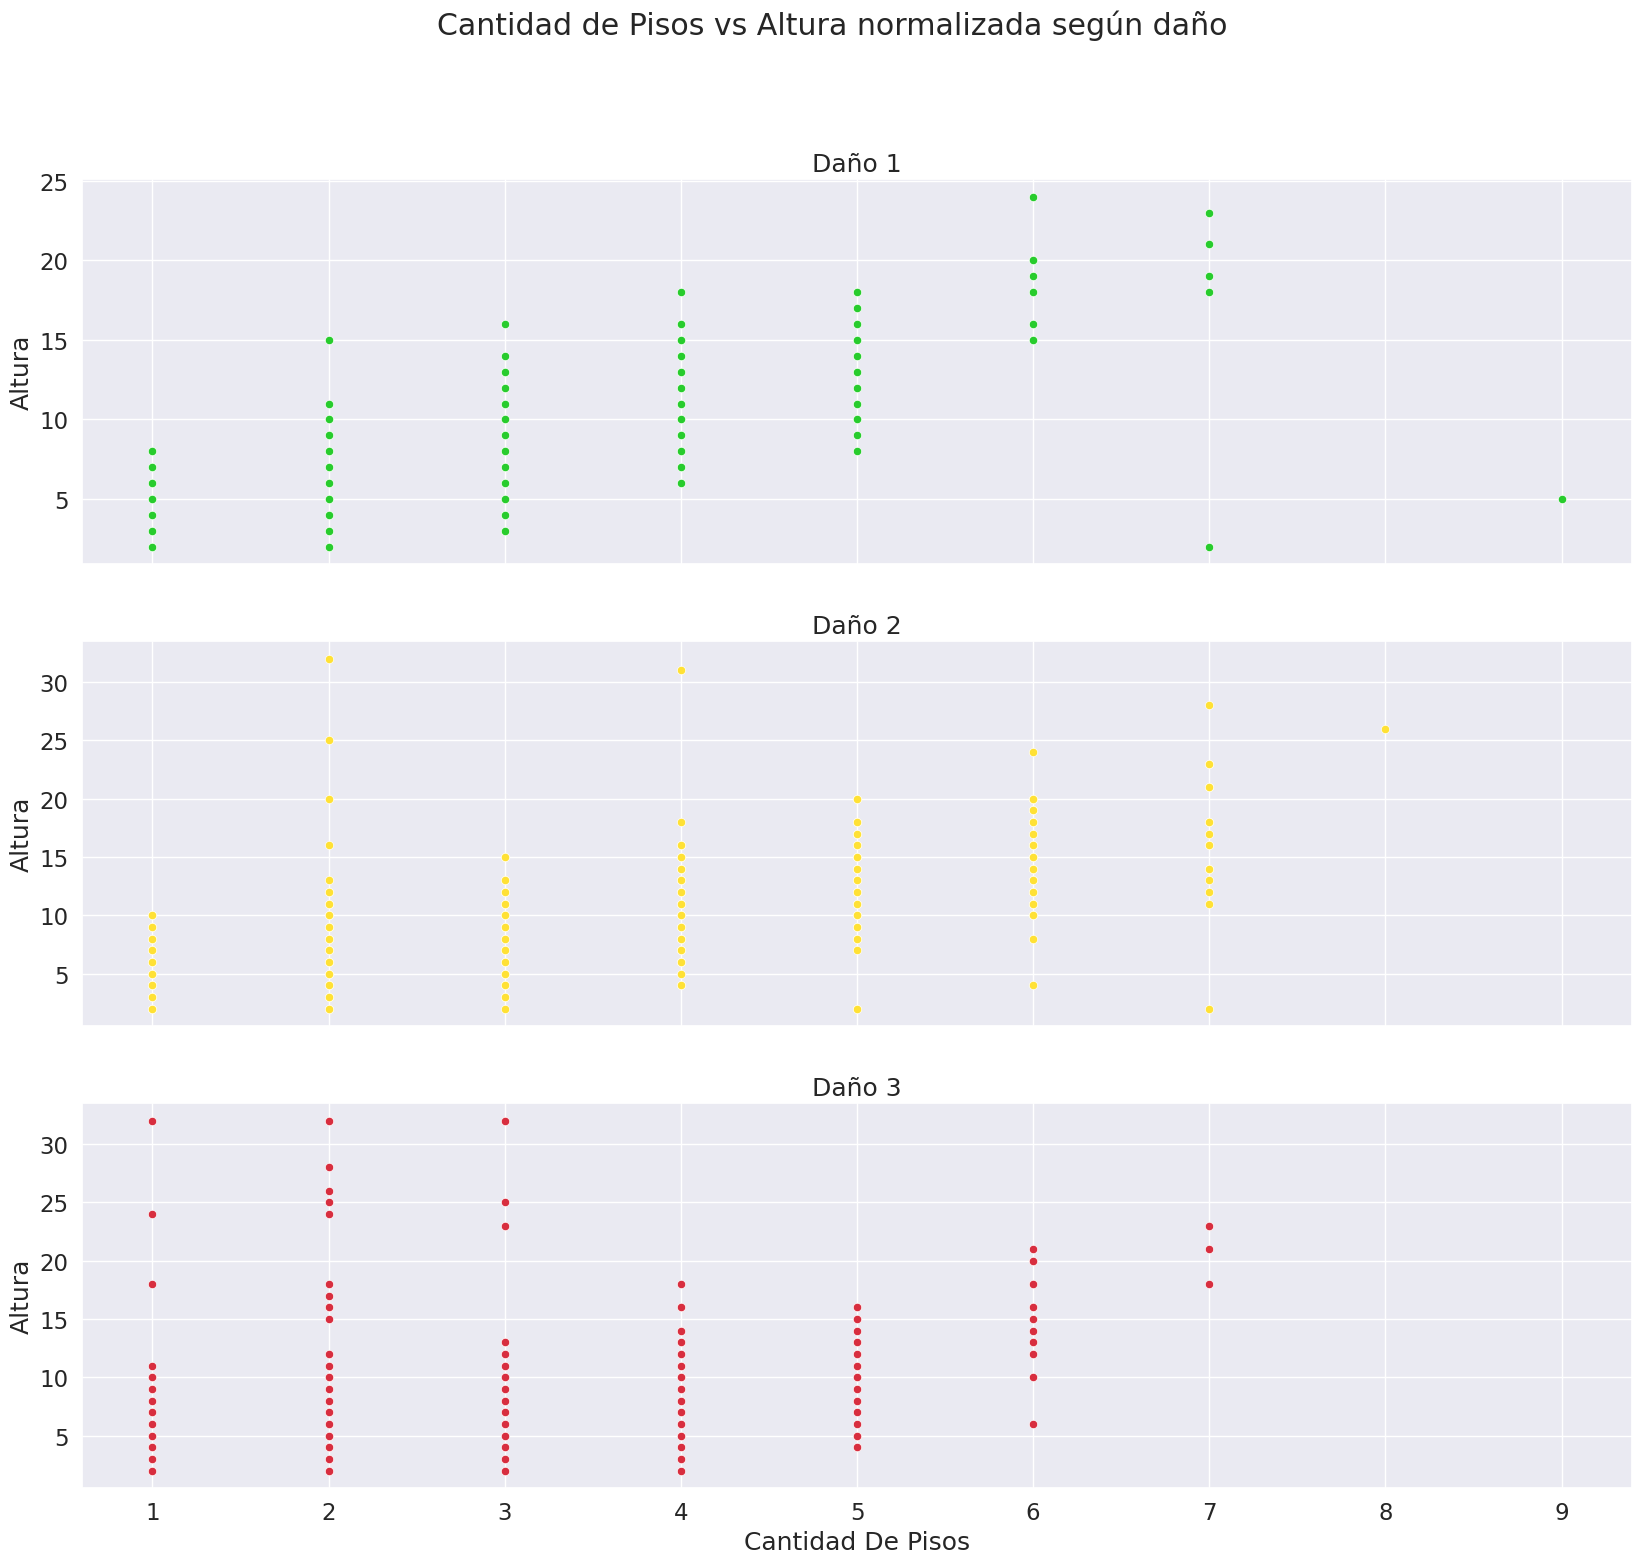

In [ ]:
fig,(ax0,ax1,ax2) = plt.subplots(nrows=3, ncols=1,figsize=(20, 17),sharex='all')

sns.scatterplot(x="count_floors_pre_eq", y="height_percentage", data=min_damage,ax=ax0,color='#28CC2D')
ax0.set_title("Daño 1")
ax0.set_ylabel('Altura')

sns.scatterplot(x="count_floors_pre_eq", y="height_percentage", data=medium_damage,ax=ax1,color='#FFE135')
ax1.set_title("Daño 2")
ax1.set_ylabel('Altura')

sns.scatterplot(x="count_floors_pre_eq", y="height_percentage", data=max_damage,ax=ax2,color='#D82E3F')
ax2.set_title("Daño 3")
ax2.set_ylabel('Altura')

plt.suptitle("Cantidad de Pisos vs Altura normalizada según daño")
ax2.set_xlabel('Cantidad De Pisos')

Text(0.5, 1.0, 'Regresión de Cantidad de Pisos vs Altura normalizada para daño 1')

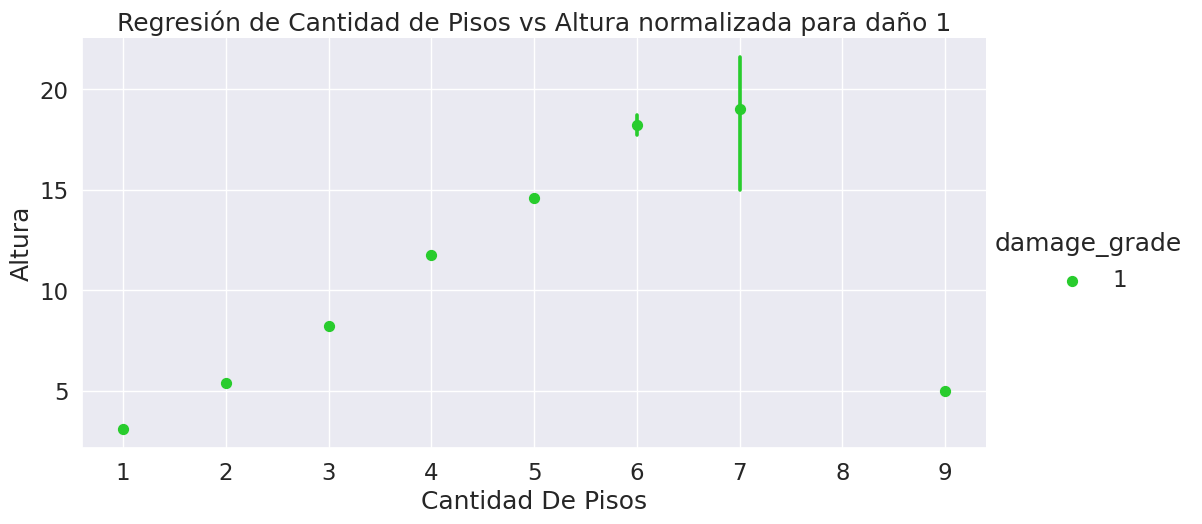

In [ ]:
sns.lmplot(x="count_floors_pre_eq", y="height_percentage", data=min_damage,hue='damage_grade', x_estimator=np.mean, aspect=2, fit_reg=False, palette=['#28CC2D'])
ax = plt.gca()
ax.set_ylabel("Altura")
ax.set_xlabel("Cantidad De Pisos")
ax.set_title("Regresión de Cantidad de Pisos vs Altura normalizada para daño 1", size=18)


Text(0.5, 1.0, 'Altura normalizada dado la Cantidad de Pisos en daño 2')

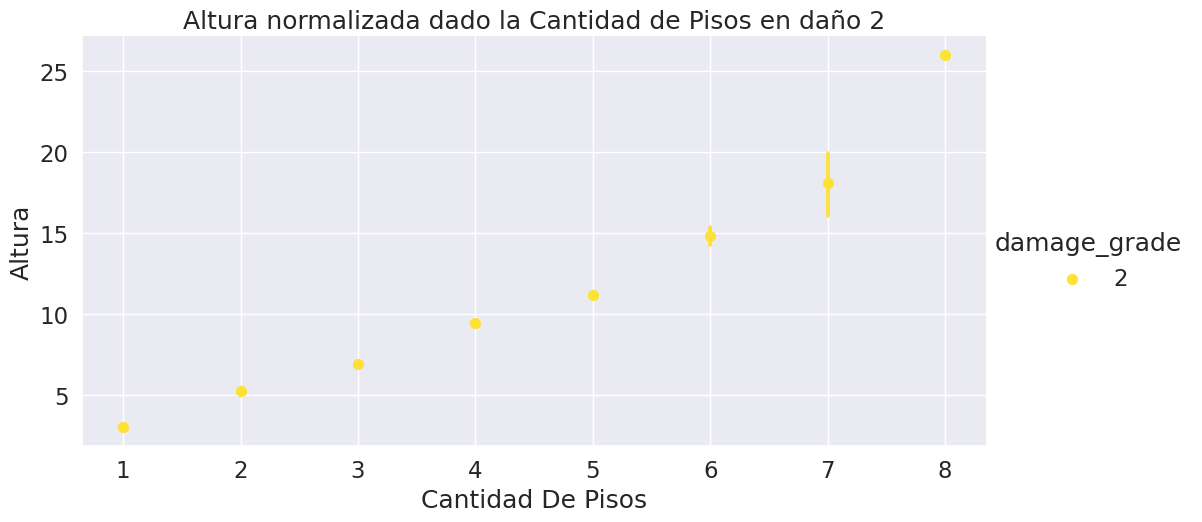

In [ ]:
sns.lmplot(x="count_floors_pre_eq", y="height_percentage", data=medium_damage,hue='damage_grade', x_estimator=np.mean, aspect=2, fit_reg=False, palette=['#FFE135'])
ax = plt.gca()
ax.set_ylabel("Altura")
ax.set_xlabel("Cantidad De Pisos")
ax.set_title("Altura normalizada dado la Cantidad de Pisos en daño 2", size=18)

Text(0.5, 1.0, 'Altura normalizada dado la Cantidad de Pisos en daño 3')

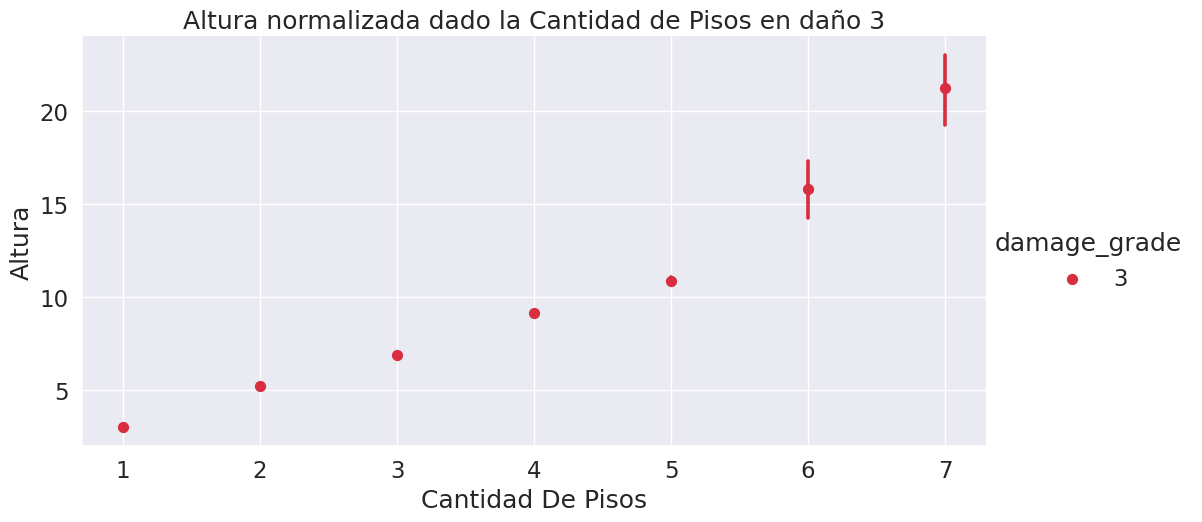

In [ ]:
sns.lmplot(x="count_floors_pre_eq", y="height_percentage", data=max_damage,hue='damage_grade', x_estimator=np.mean, aspect=2, fit_reg=False, palette=['#D82E3F'])
ax = plt.gca()
ax.set_ylabel("Altura")
ax.set_xlabel("Cantidad De Pisos")
ax.set_title("Altura normalizada dado la Cantidad de Pisos en daño 3", size=18)

De estas relaciones podemos apreciar:

* Hasta el piso 6 representan una relación lineal.
* En el piso 6 y 7 hay intervalos de confianza para la media, que se solapan para los 3 niveles de daño.

A partir de las dos conclusiones, precedemos a unificar las columnas en una sola. Nos quedaremos con `count_floors_pre_eq`

In [ ]:
useful_data["count_floors_pre_eq"] = data["count_floors_pre_eq"]

In [ ]:
useful_data.head(1)

building_id  damage_grade  count_floors_pre_eq
0       802906             3                    2

## Edad de los edificios

A partir de lo anterior podríamos ver cómo evoluciona la cantidad de edificios en base a los años en las edificaciones

In [ ]:
data_aux = data[data["age"] < 200]
(data_aux["age"] < 200).value_counts()
data_aux.sort_values("age",ascending=True,inplace=True)

Text(0.5, 1.0, 'Cantidad de Edificios por Año De Construcción')

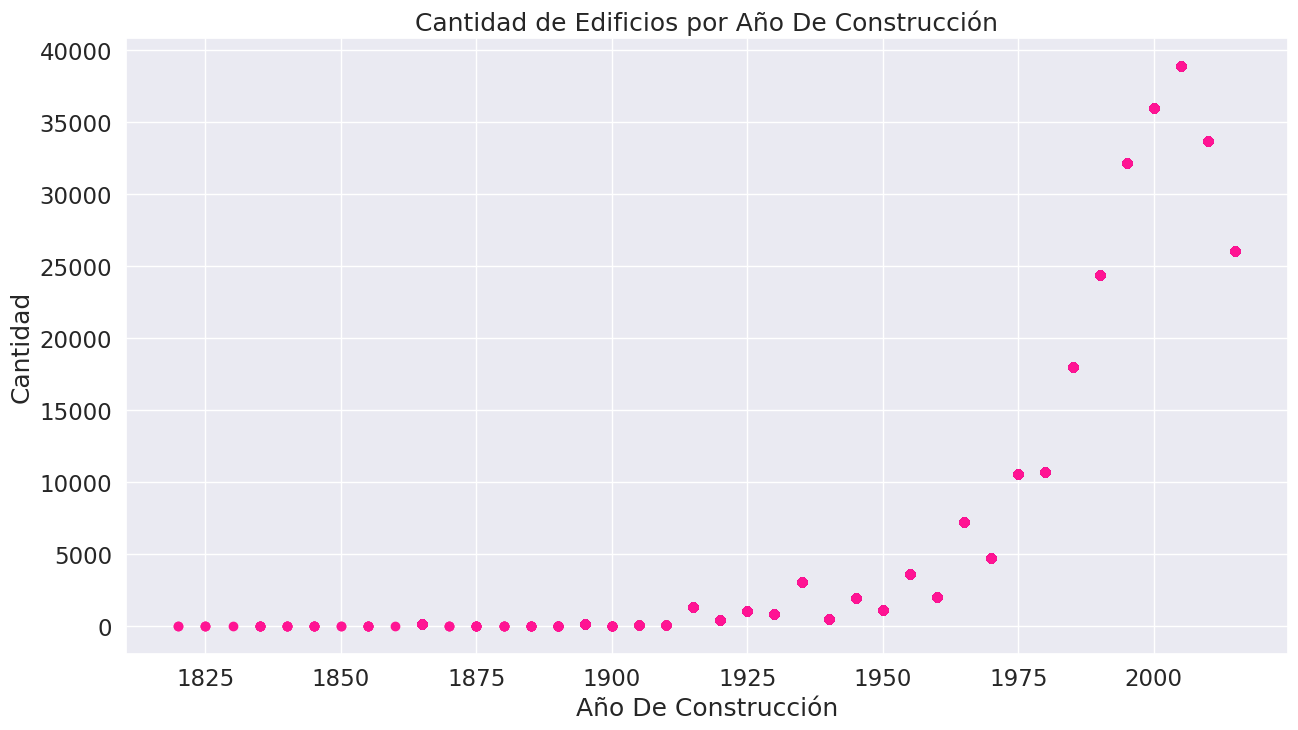

In [ ]:
data_aux["cant edificios"]=0
data_aux["cant edificios"] = data_aux.groupby("age").transform('count')
plt.scatter(2015-data_aux["age"], data_aux["cant edificios"],color='deeppink');
plt.ylabel('Cantidad')
plt.xlabel('Año De Construcción')
plt.title('Cantidad de Edificios por Año De Construcción')

Podemos apreciar que la mayor cantidad de los edificios se concentran en los últimos 50 años.

In [ ]:
pd.crosstab(data["damage_grade"], data["age"])

age             0      5      10     15     20   ...  185  190  195  200  995
damage_grade                                     ...                         
1              7213   5590   4360   2878   1954  ...    0    0    0    3  179
2             12721  19030  22370  20767  18603  ...    1    2    2   64  822
3              6107   9077  12166  12365  11625  ...    0    1    0   39  389

[3 rows x 42 columns]

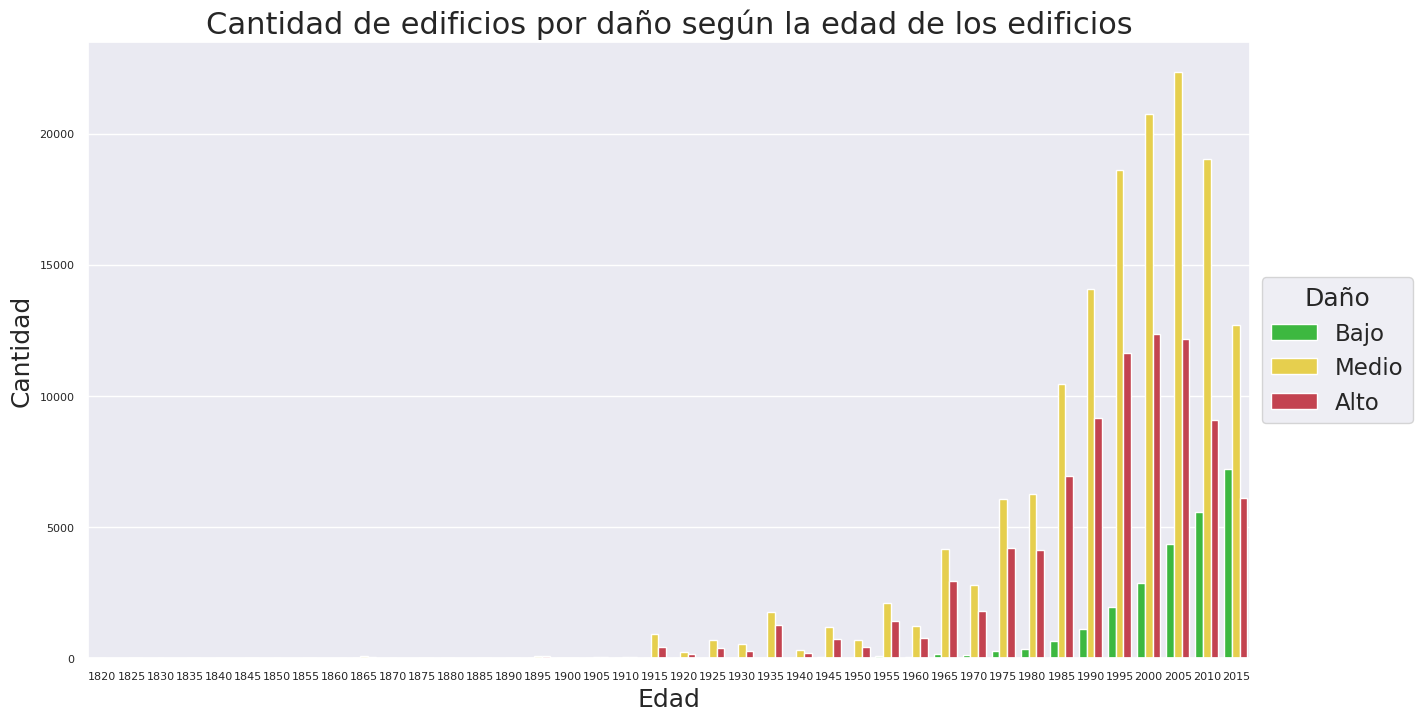

In [ ]:
data_aux['año']=2015-data_aux['age']
data_aux_1800=data_aux[data_aux['año']>1800]
sns.countplot(x='año', hue='damage_grade', data=data_aux_1800, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.tick_params(labelsize=8)
ax.set_xlabel('Edad')
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de edificios por daño según la edad de los edificios", size=22)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Se puede apreciar que mientras más años tienen las edificaciones, más daño sufren.

Como quitamos las edificaciones con 995 años (para mayor claridad de los gráficos), ahora las examinamos por separado

In [ ]:
max_age = data[data["age"] == 995]
max_age.head(10)

building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
386        435557              14  ...                    False             2
716        597626              26  ...                    False             1
1235         7560              26  ...                    False             3
1398       797271              26  ...                    False             1
1635       857371              24  ...                    False             3
2148       829384              27  ...                    False             2
2370       132439              14  ...                    False             3
2851       382719               6  ...                    False             2
2869       637115              12  ...                    False             1
2890       773289               6  ...                    False             2

[10 rows x 40 columns]

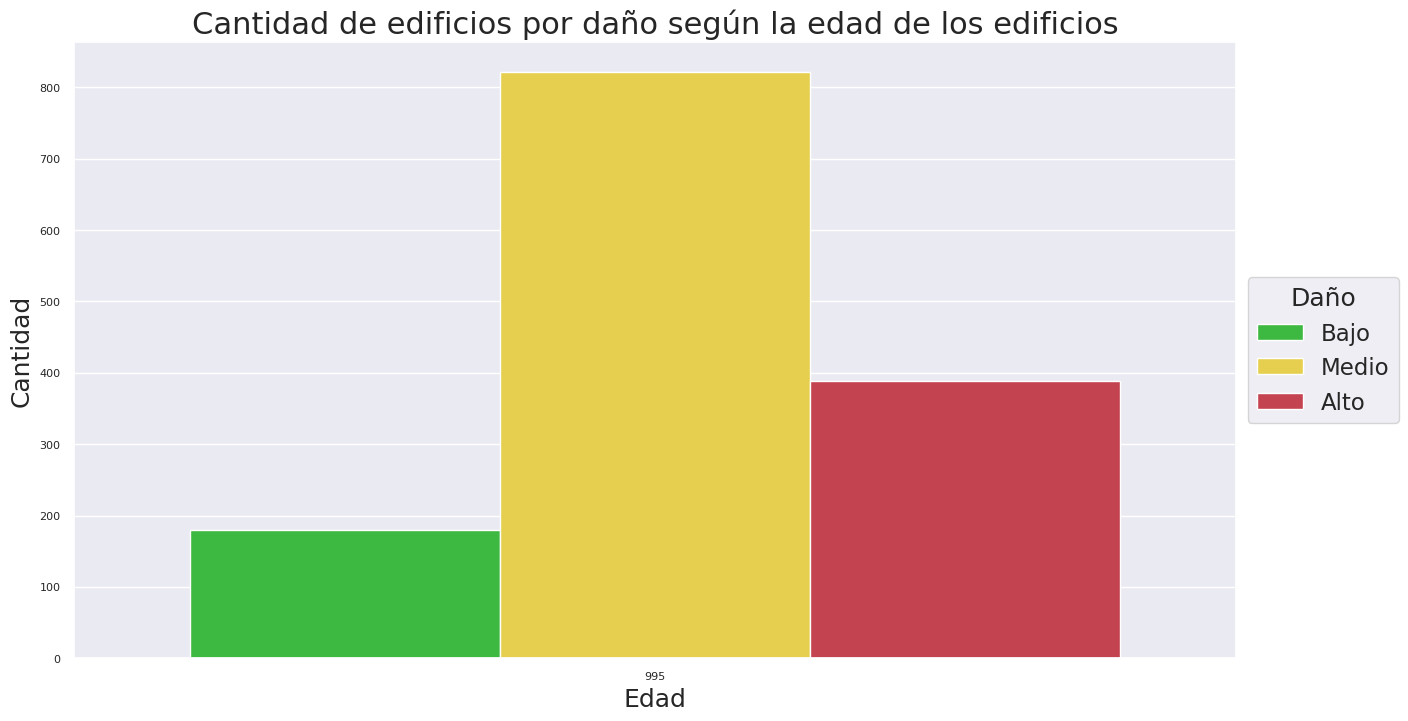

In [ ]:
sns.countplot(x='age', hue='damage_grade', data=max_age, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.tick_params(labelsize=8)
ax.set_xlabel('Edad')
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de edificios por daño según la edad de los edificios", size=22)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Podemos apreciar, además, que para los edificios que de 995 años en este registro, la mayor cantidad de casos es de daño medio.
Además, que el daño máximo duplica (apróximadamente) al daño menor.

In [ ]:
useful_data["age"] = data["age"]

## Superficie ocupada por la edificación

In [ ]:
area_max = data.groupby("area_percentage").filter(lambda x: len(x) >= data["area_percentage"].mean())
area_min = data.groupby("area_percentage").filter(lambda x: len(x) < data["area_percentage"].mean())

In [ ]:
pivot = pd.crosstab(data["damage_grade"], data["area_percentage"])
pivot

area_percentage  1     2     3      4      5    ...  85   86   90   96   100
damage_grade                                    ...                         
1                 12   408  1169   1762   2402  ...    0    3    0    1    0
2                 49  1683  6183  10686  17890  ...    3    2    1    1    1
3                 29  1090  4485   6788  12432  ...    1    0    0    1    0

[3 rows x 84 columns]

Vemos que el porcentaje de área no es un continuo.

In [ ]:
pivot.loc[:, (pivot.loc[1, :] > pivot.loc[3, :])]

area_percentage    17   18   19   21   22   23   24  ...  59  62  64  69  70  72  86
damage_grade                                         ...                            
1                 633  329  444  173  101  242  130  ...   2   1   1   1   3   1   3
2                1332  682  794  353  216  461  210  ...   1   2   3   1   3   5   2
3                 524  306  364  119   74  162   65  ...   1   0   0   0   1   0   0

[3 rows x 37 columns]

In [ ]:
pivot.loc[:, (pivot.loc[3, :] > pivot.loc[1, :])]

area_percentage  1     2     3      4      5      6   ...  65  66  78  83  84  85
damage_grade                                          ...                        
1                12   408  1169   1762   2402   3176  ...   0   1   0   0   1   0
2                49  1683  6183  10686  17890  23145  ...   3   6   0   1   0   3
3                29  1090  4485   6788  12432  15692  ...   2   3   1   2   2   1

[3 rows x 31 columns]

De aquí podemos concluir que a una mayor área, menor es el daño.

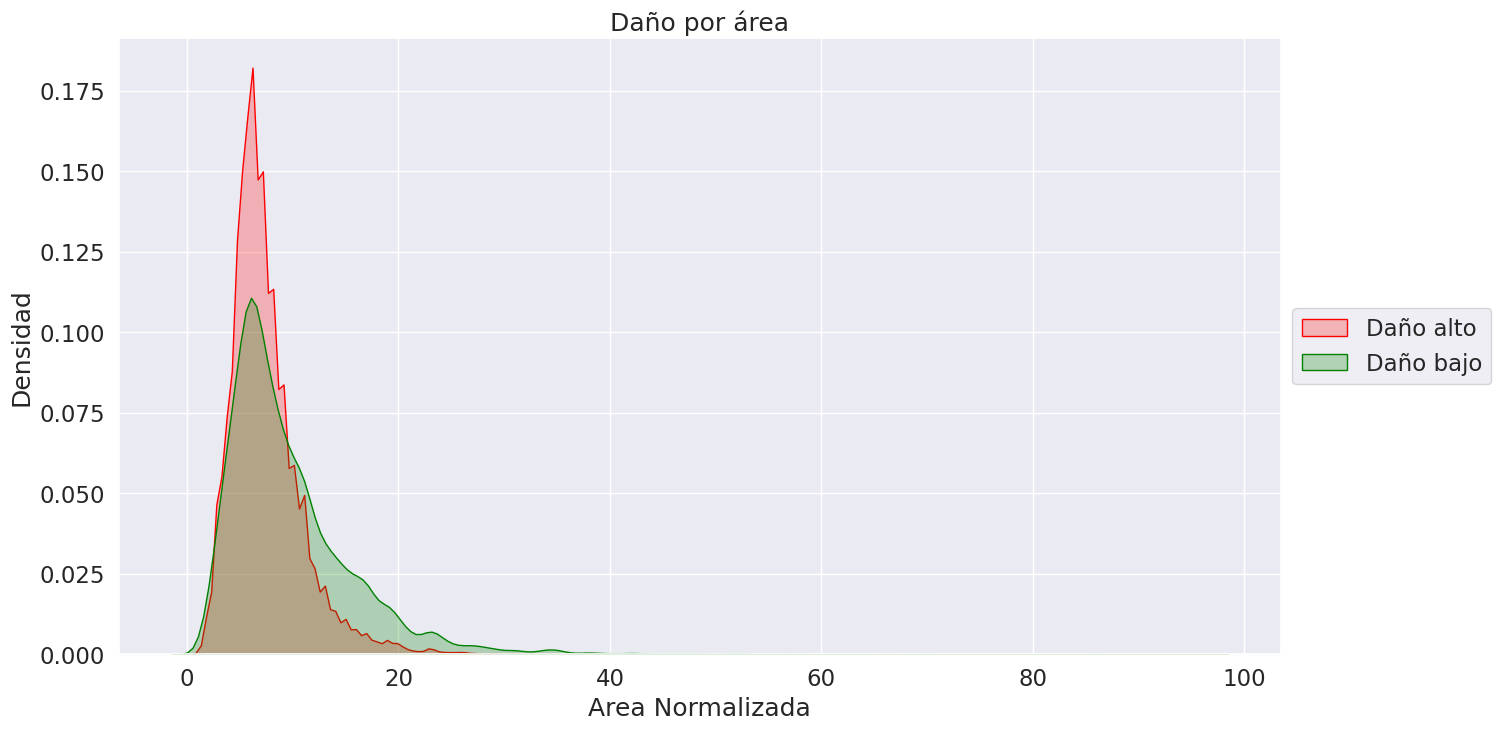

In [ ]:
g = sns.kdeplot(max_damage["area_percentage"], color="red", label='Daño alto', shade=True)
g = sns.kdeplot(min_damage["area_percentage"], color="green", label='Daño bajo', shade=True)

g.set_title("Daño por área", fontsize=18)
g.set_ylabel("Densidad", fontsize=18)
g.set_xlabel("Area Normalizada",fontsize=18)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Observamos que hay una mayor concentración de daño alto en las áreas menores, y que el daño menor supera al mayor (casos de éxito) en las áreas mayores.

HACER INTRO A LOS BOX PLOTS

In [ ]:
useful_data["area_percentage"] = data["area_percentage"]

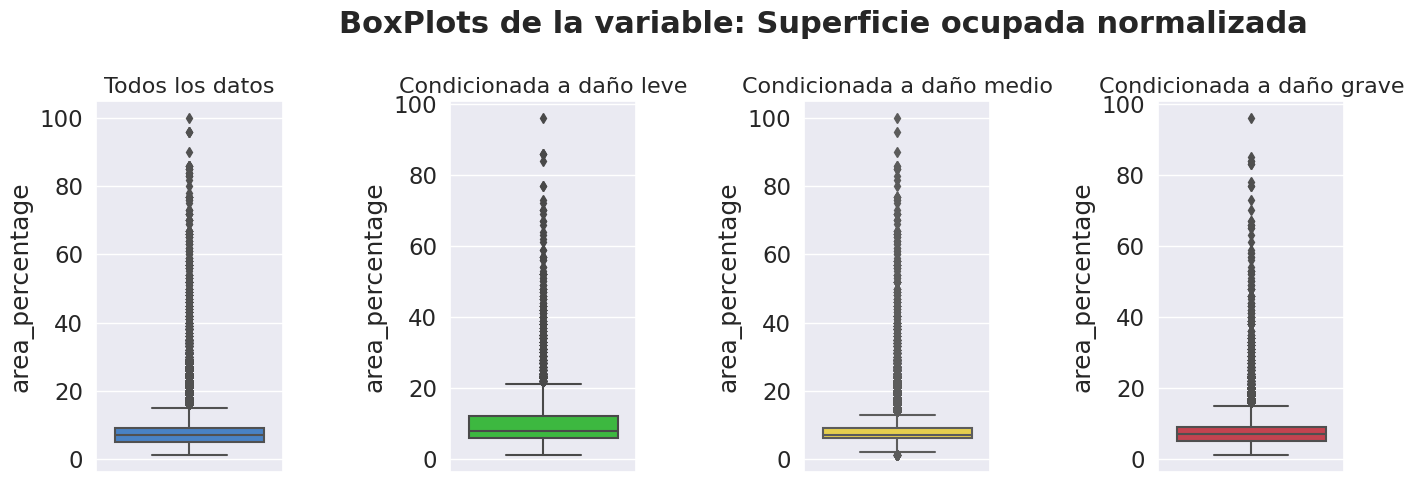

In [ ]:
sns.set(style="whitegrid")
sns.set(font_scale = 1.5)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
fig.suptitle('BoxPlots de la variable: Superficie ocupada normalizada',x=0.7 ,fontsize=22, weight='bold')
sns.boxplot(y=data['area_percentage'] , ax=axes[0], color='#3581D8')
axes[0].set_title('Todos los datos', size=16)
sns.boxplot(y=data.loc[data['damage_grade'] == 1]['area_percentage'], ax=axes[1], color='#28CC2D')
axes[1].set_title('Condicionada a daño leve', size=16)
axes[2].set_title('Condicionada a daño medio', size=16)
axes[3].set_title('Condicionada a daño grave', size=16)
sns.boxplot(y=data.loc[data['damage_grade'] == 2]['area_percentage'] , ax=axes[2], color='#FFE135')
sns.boxplot(y=data.loc[data['damage_grade'] == 3]['area_percentage'] , ax=axes[3], color='#D82E3F')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig.tight_layout(rect=[0, 0.001, 1.2, 0.9])

Para entender mejor la proporción de los outliers con respecto a cada variable:

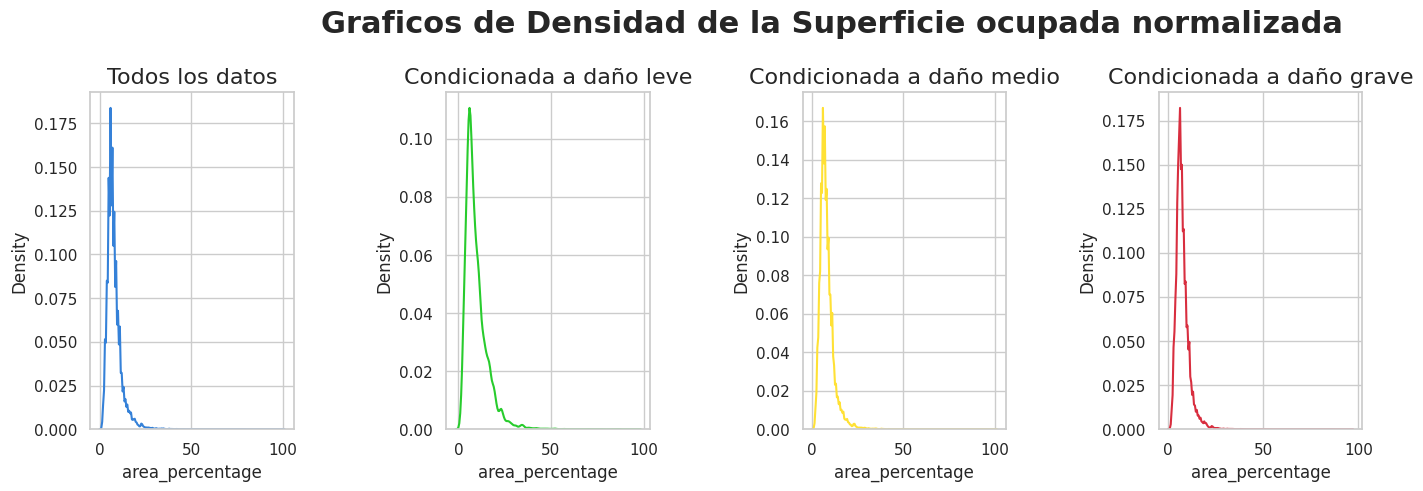

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
axes[0].set_title('Todos los datos', size=16)
axes[1].set_title('Condicionada a daño leve', size=16)
axes[2].set_title('Condicionada a daño medio', size=16)
axes[3].set_title('Condicionada a daño grave', size=16)
fig.suptitle('Graficos de Densidad de la Superficie ocupada normalizada', fontsize=22, x=0.7,weight='bold')
sns.distplot(data['area_percentage'], hist=False, ax=axes[0], color='#3581D8')
sns.distplot(data.loc[data['damage_grade'] == 1]['area_percentage'], hist=False, ax=axes[1], color='#28CC2D')
sns.distplot(data.loc[data['damage_grade'] == 2]['area_percentage'], hist=False, ax=axes[2], color='#FFE135')
sns.distplot(data.loc[data['damage_grade'] == 3]['area_percentage'], hist=False, ax = axes[3], color='#D82E3F')
fig.tight_layout(rect=[0, 0.001, 1.2, 0.9])
fig.show()

In [ ]:
data.loc[data['area_percentage'] > 30].shape[0] / data.shape[0]

0.0038065855464867746

Solo hay un 0.3% de edificios con area mayor a 40 . Filtramos estos "outliers" para poder analizar el comportamiento para las mayorias.


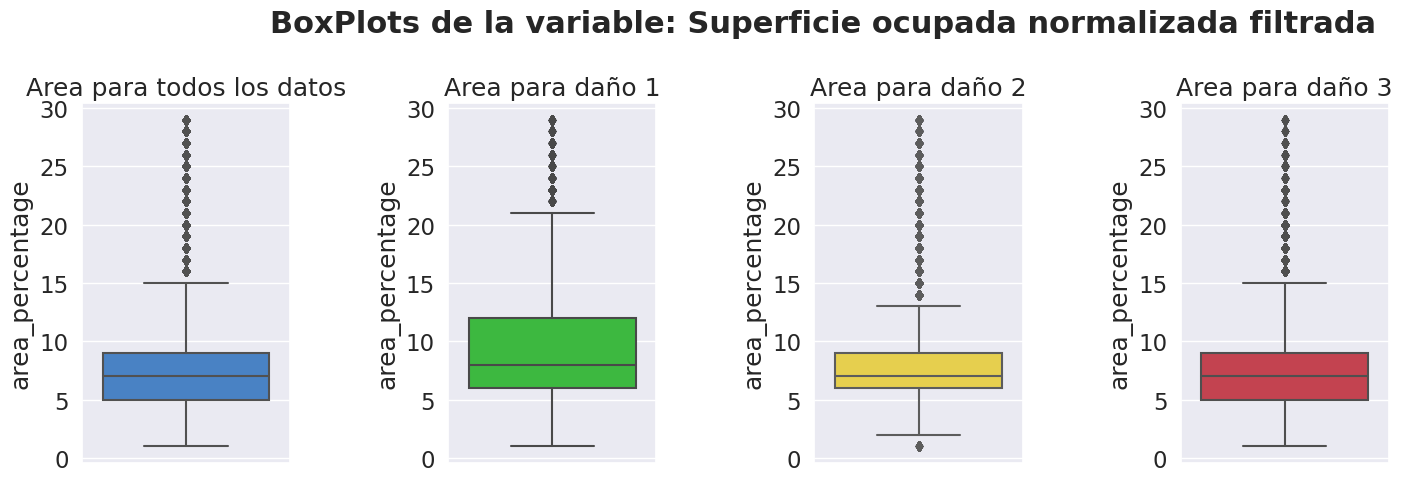

In [ ]:
sns.set(font_scale = 1.5)

data_filtered = data.loc[data['area_percentage'] < 30]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
fig.suptitle('BoxPlots de la variable: Superficie ocupada normalizada filtrada',x=0.7, weight='bold', fontsize=22)
sns.boxplot(y=data_filtered['area_percentage'] , ax=axes[0], color='#3581D8')
axes[0].set_title('Area para todos los datos')
sns.boxplot(y=data_filtered.loc[data_filtered['damage_grade'] == 1]['area_percentage'] , ax=axes[1], color='#28CC2D')
axes[1].set_title('Area para daño 1')
axes[2].set_title('Area para daño 2')
axes[3].set_title('Area para daño 3')
sns.boxplot(y=data_filtered.loc[data_filtered['damage_grade'] == 2]['area_percentage'] , ax=axes[2], color='#FFE135')
sns.boxplot(y=data_filtered.loc[data_filtered['damage_grade'] == 3]['area_percentage'] , ax=axes[3], color='#D82E3F')
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig.tight_layout(rect=[0, 0.001, 1.2, 0.9])



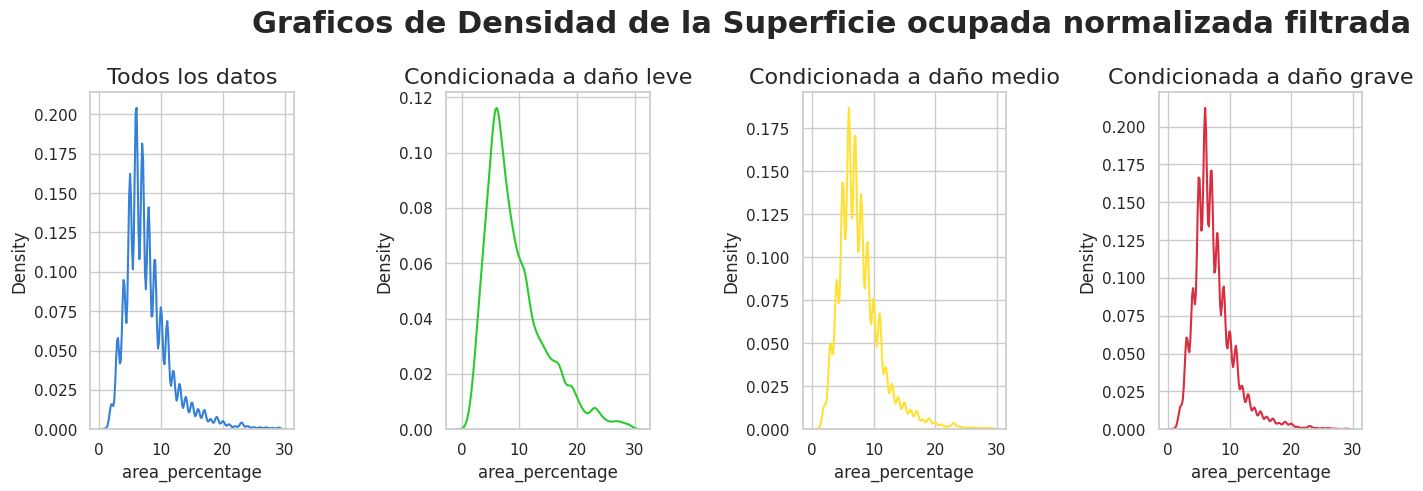

In [ ]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,5))
axes[0].set_title('Todos los datos', size=16)
axes[1].set_title('Condicionada a daño leve', size=16)
axes[2].set_title('Condicionada a daño medio', size=16)
axes[3].set_title('Condicionada a daño grave', size=16)
fig.suptitle('Graficos de Densidad de la Superficie ocupada normalizada filtrada', fontsize=22, x=0.7,weight='bold')
sns.distplot(data_filtered['area_percentage'], hist=False, ax=axes[0], color='#3581D8')
sns.distplot(data_filtered.loc[data_filtered['damage_grade'] == 1]['area_percentage'], hist=False, ax=axes[1], color='#28CC2D')
sns.distplot(data_filtered.loc[data_filtered['damage_grade'] == 2]['area_percentage'], hist=False, ax=axes[2], color='#FFE135')
sns.distplot(data_filtered.loc[data_filtered['damage_grade'] == 3]['area_percentage'], hist=False, ax = axes[3], color='#D82E3F')
fig.tight_layout(rect=[0, 0.001, 1.2, 0.9])


Se observa que la curva para el el area condicionado a que el daño fue menor tiene mayor dispersión que las otras curvas, indicando que dentro de los edificios con mayor area, la mayoria recibieron un impacto menor. 

## Análisis General

Las posibles variables que se pueden analizar como continuas son: count_floors_pre_eq, age, area_percentage, height_percentage y count_families. 

No consideramos dentro de éstas a las variables que indican el lugar geográfico, ya que el mapeo de cada ciudad a un número no viene dado por un orden, sino por una clasificación. 

Consideramos que una variable es analizable como continua si tiene al menos 25 clases distintas. Con menor cantidad de clases, los scatter plotts quedarán en conjuntos alineados, y es dificil de entenderlos. En rigor de verdad son todas variables discretas ya que toman valores en los naturales (conjunto infinito numerable)). Hacemos un value_counts para ver si las podemos analizar como continuas o no. 


In [ ]:
data['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

In [ ]:
data['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
140        9
130        9
180        7
160        6
170        6
175        5
135        5
145        3
190        3
195        2
165        2
155        1
185        1
Name: age, dtype: int64

In [ ]:
data['area_percentage'].value_counts()

6      42013
7      36752
5      32724
8      28445
9      22199
       ...  
82         1
80         1
78         1
75         1
100        1
Name: area_percentage, Length: 84, dtype: int64

In [ ]:
data['height_percentage'].value_counts()

5     78513
6     46477
4     37763
7     35465
3     25957
8     13902
2      9305
9      5376
10     4492
11      917
12      907
13      759
15      292
16      179
32       75
18       71
14       66
20       33
21       13
23       11
17        9
19        7
24        4
25        3
26        2
28        2
31        1
Name: height_percentage, dtype: int64

In [ ]:
data['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Descartamos entonces a las variables count_families y count_floors_pre_eq al tener muy pocas clases. Analizamos las demas variables como continuas.



Graficaremos histogramas de las variables numéricas condicionando si el grado de daño fue alto (damage_grade == 3) o fue bajo (damage_grade == 1). Dejamos fuera de estos gráficos la condición de daño medio, con el interés de observar qué sucede en las situaciones más extremas.

In [ ]:
numericas = data[[ 'age', 'area_percentage', 'height_percentage', 'damage_grade']]
serious_damage = numericas[numericas.damage_grade == 3]
low_damage = numericas[numericas.damage_grade == 1]

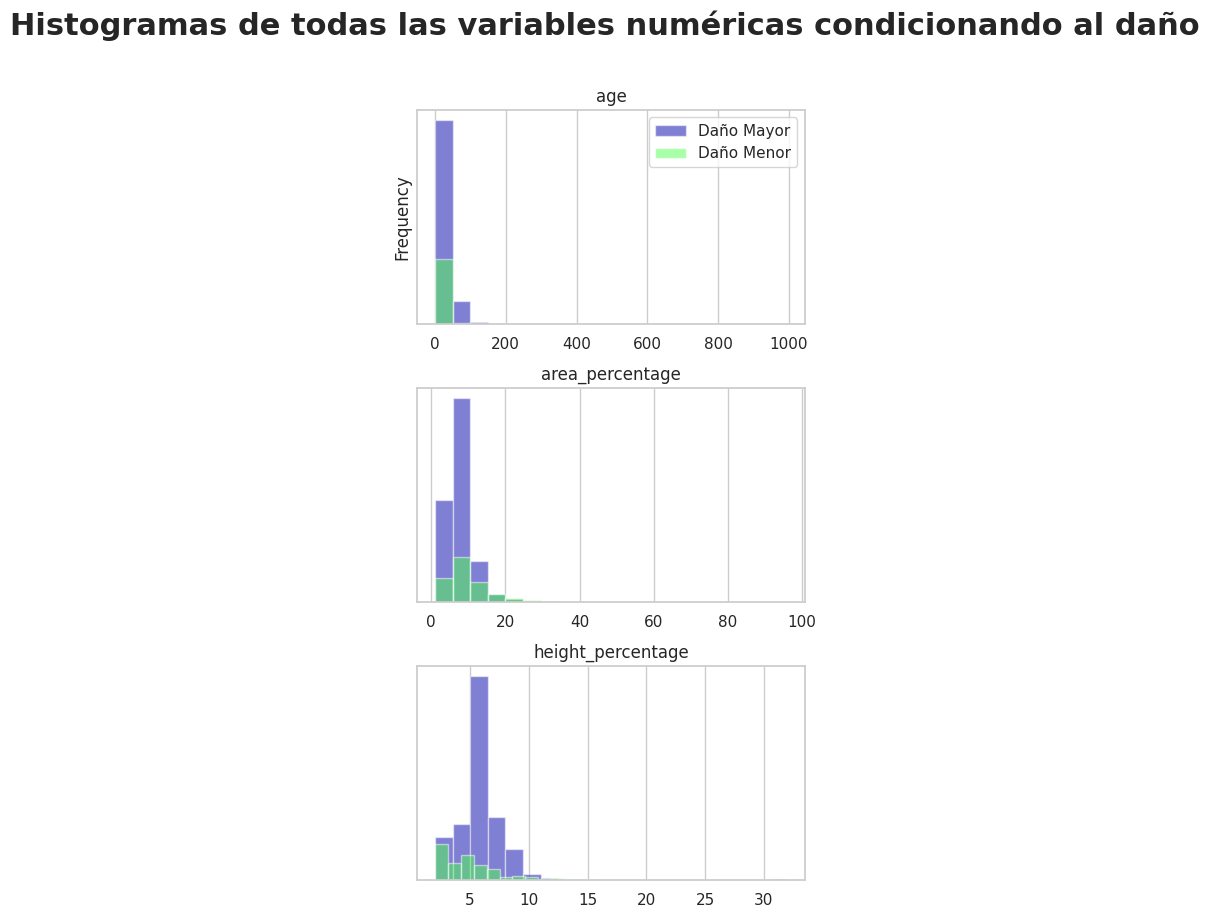

In [ ]:
fig, axes = plt.subplots(3, figsize=(5, 10))
fig.suptitle('Histogramas de todas las variables numéricas condicionando al daño', fontsize=22, weight='bold')
ax = axes.ravel()
for i in range(3):
  serious_damage.hist(column=serious_damage.columns[i], ax = ax[i], color=mglearn.cm3(0), alpha=.5, bins=20)
  low_damage.hist(column=low_damage.columns[i], ax = ax[i], color=mglearn.cm3(2), alpha=.5, bins=20)
  ax[i].set_title(numericas.columns[i])
  ax[i].set_yticks(())

ax[0].set_ylabel("Frequency")
ax[0].legend(["Daño Mayor", "Daño Menor"], loc="best")
#fig.tight_layout(rect=[0, 0, 4, 1.8])

In [ ]:
# plotting both distibutions on the same figure
#fig = sns.kdeplot(data['area_percentage'], shade=True, color="r")
#fig = sns.kdeplot(data['height_percentage'], shade=True, color="b")
#fig = sns.kdeplot(data['age'], shade=True, color="g")
#plt.show()

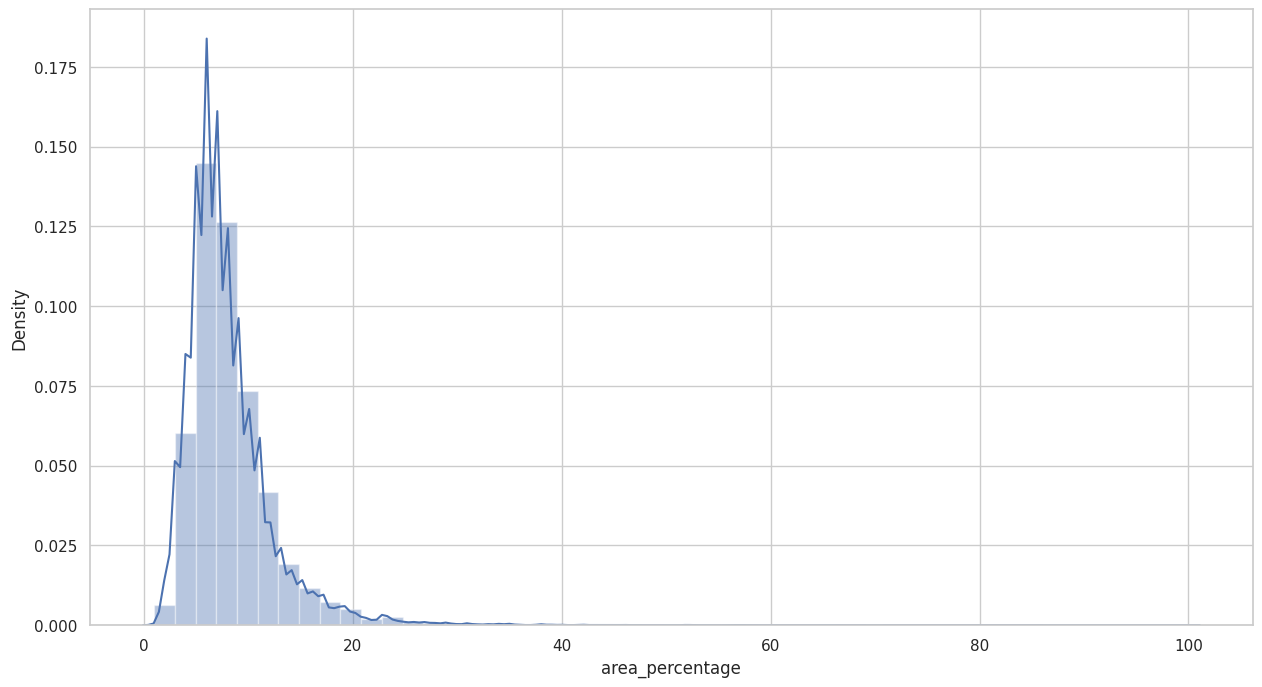

In [ ]:
sns.distplot(data['area_percentage'])

Análisis:

La primera impresión que nos generan los gráficos es sobre la variabilidad de los datos. Al tener el eje x extendido en los tres histogramas, nos preguntamos sobre el comportamiento de valores alejados a la gran mayoría de los valores. Esto se hace notar sobre todo para la variable edad. Por lo tanto calculamos la cantidad de edificios que tienen más de 200 años y la cantidad de edificios que tienen más de 900, ambos números arbitrarios. Llama entonces principalmente la atención que la cantidad 1390 no varía. A menos de una situación totalmente excepcional que haya sucedido en Katmandú, pareciera haber un error en la carga de datos. Volviendo al value_counts anterior, observamos que hay 1390 edificios con "995" años. Para los próximos análisis de la edad, removeremos estos datos, considerandolos como cargas fallidas. 

In [ ]:
data.loc[data['age'] > 200].shape[0]

1390

In [ ]:
data.loc[data['age'] > 900].shape[0]

1390

In [ ]:
data.loc[data['age'] == 995].shape[0]

1390

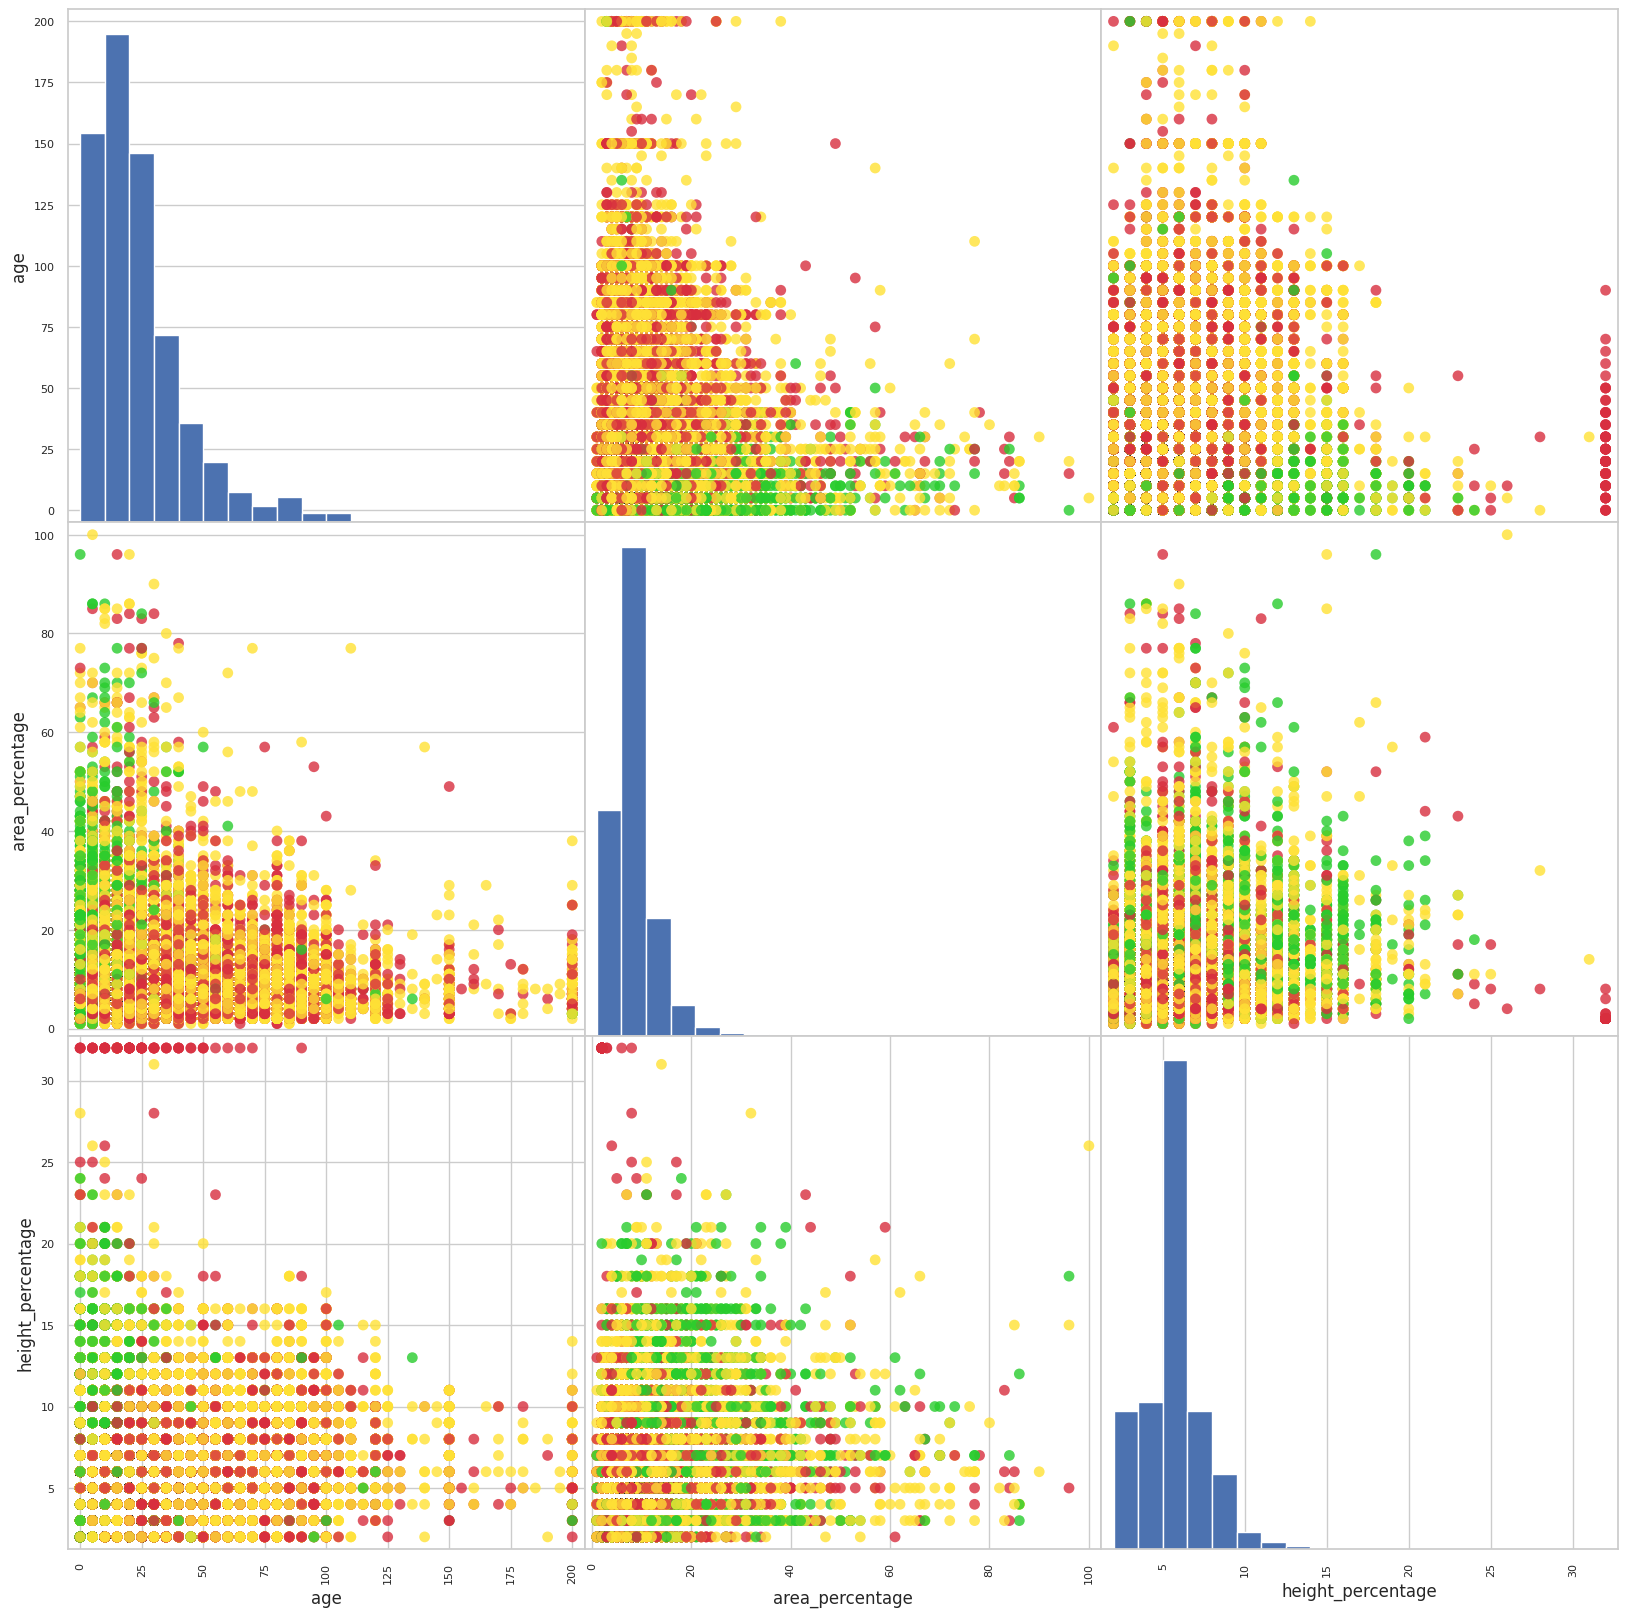

In [ ]:
# numericas es un DataFrame con las variables continuas
import matplotlib.colors
# Filtramos los outliers de age vistos anteriormente.
numericas = numericas.loc[numericas['age'] < 600]
grr = pd.plotting.scatter_matrix(numericas[['age', 'area_percentage', 'height_percentage']], c = numericas['damage_grade'], figsize=(20, 20), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = matplotlib.colors.ListedColormap(['#28CC2D', '#FFE135', '#D82E3F']))

Analizamos, luego, el mismo gráfico pero incluyendo solamente los extremos (daño mayor y menor)

Text(0.5, 0.98, 'Pairplot de edad, área y altura')

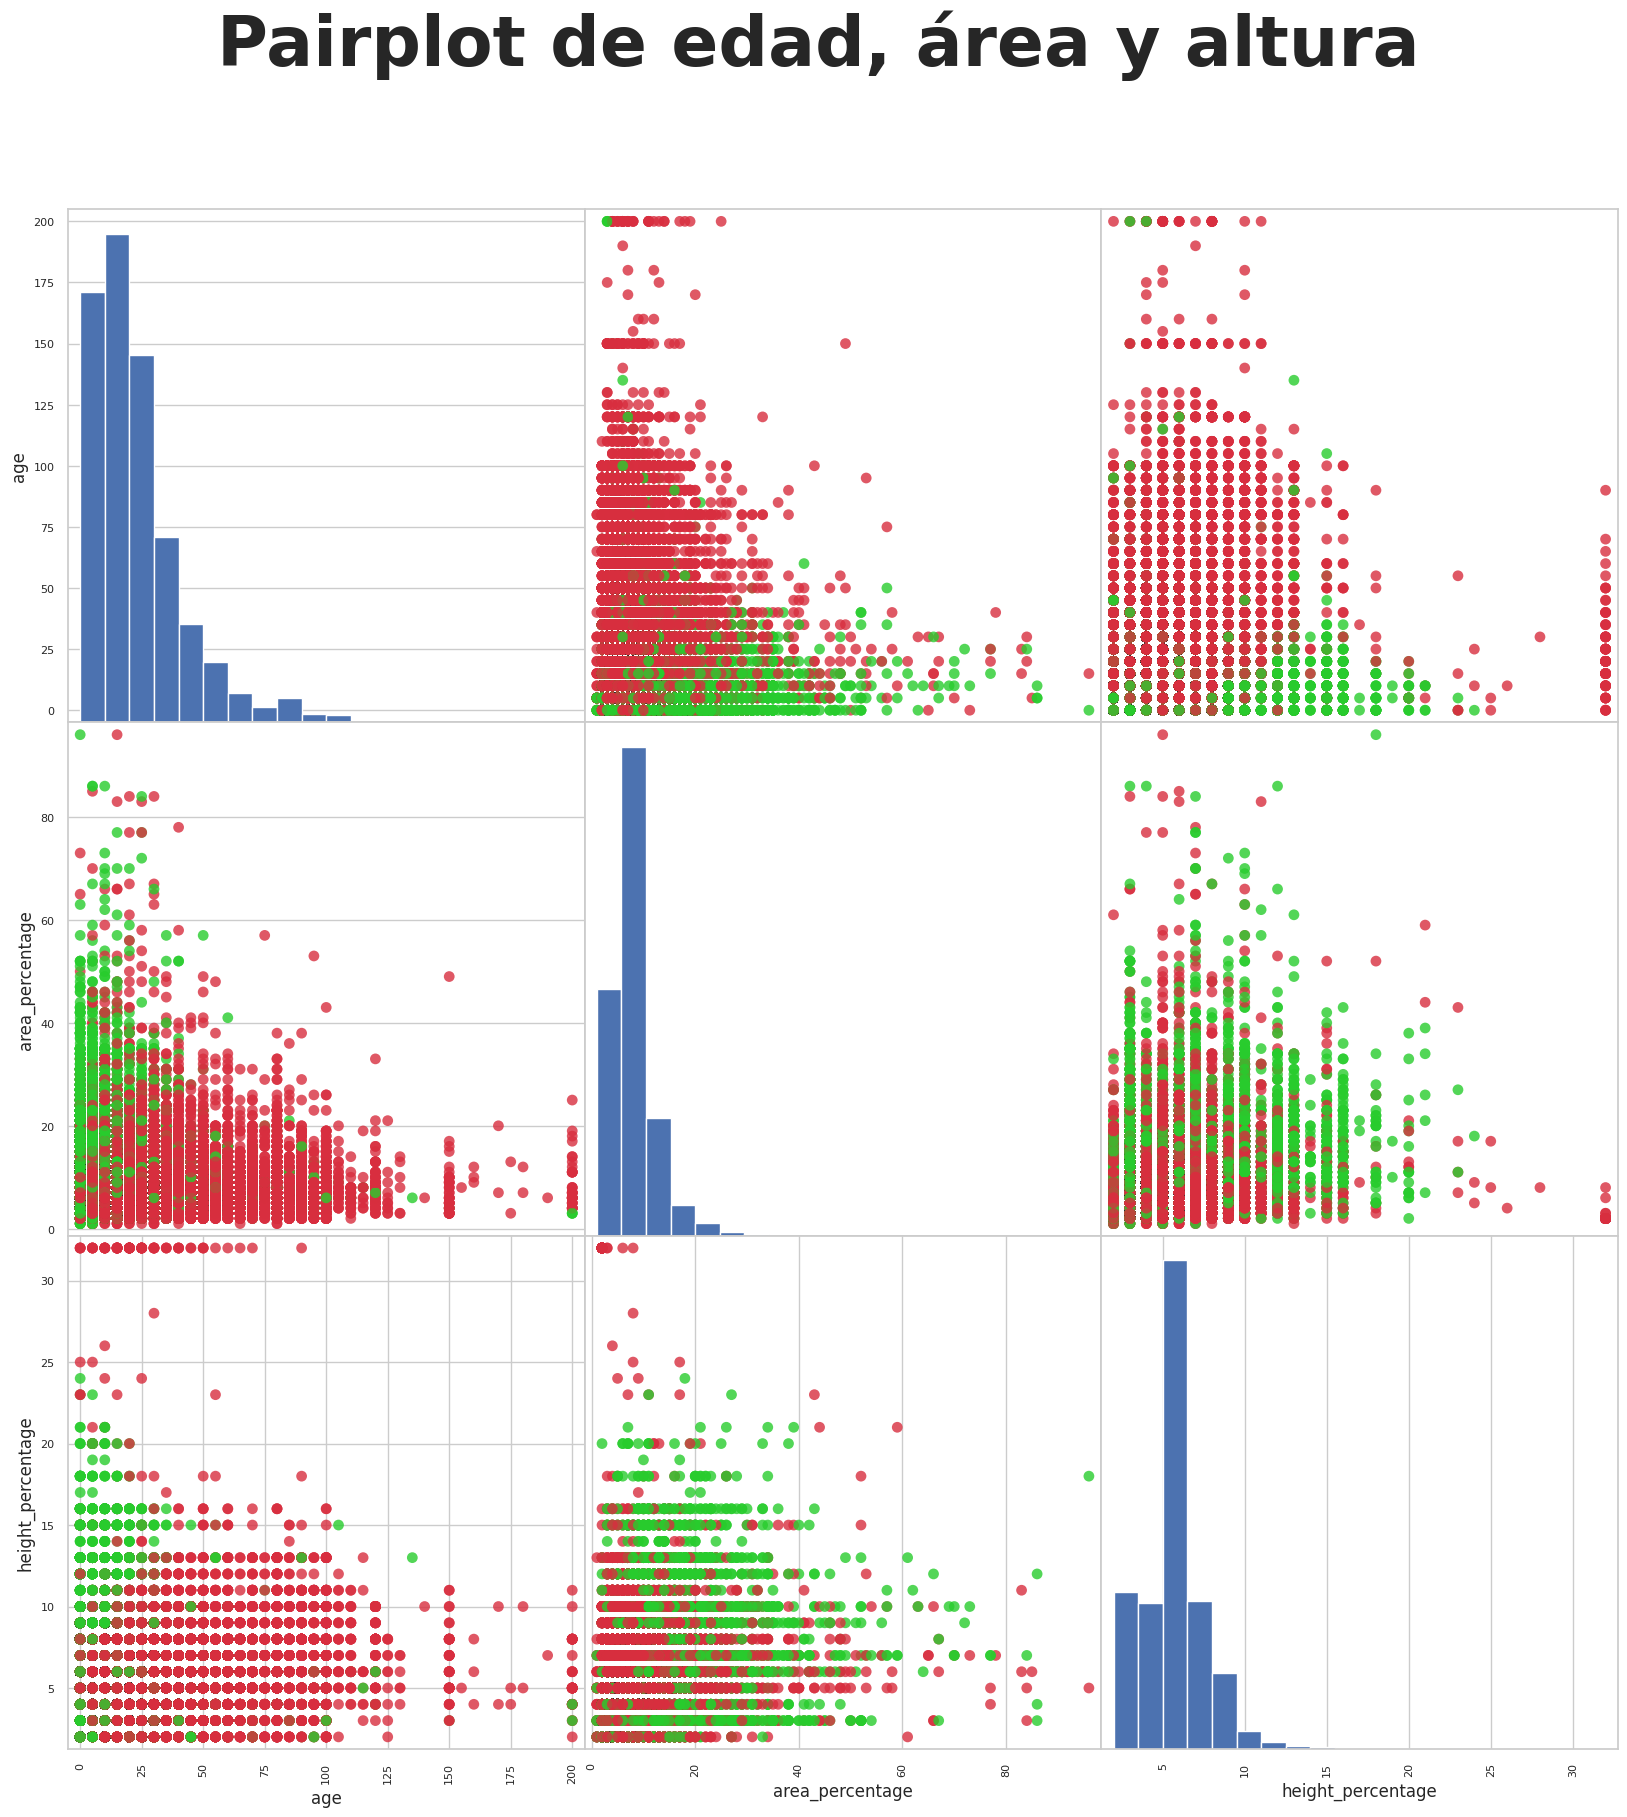

In [ ]:
numericas = numericas.loc[(numericas['damage_grade'] == 1) | (numericas['damage_grade'] == 3)]
grr = pd.plotting.scatter_matrix(numericas[['age', 'area_percentage', 'height_percentage']], c = numericas['damage_grade'], figsize=(20, 20), marker='o',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = matplotlib.colors.ListedColormap(['#28CC2D', '#FFE135', '#D82E3F']))

plt.suptitle('Pairplot de edad, área y altura',weight='bold',size=50)

# Visualización de variables categóricas

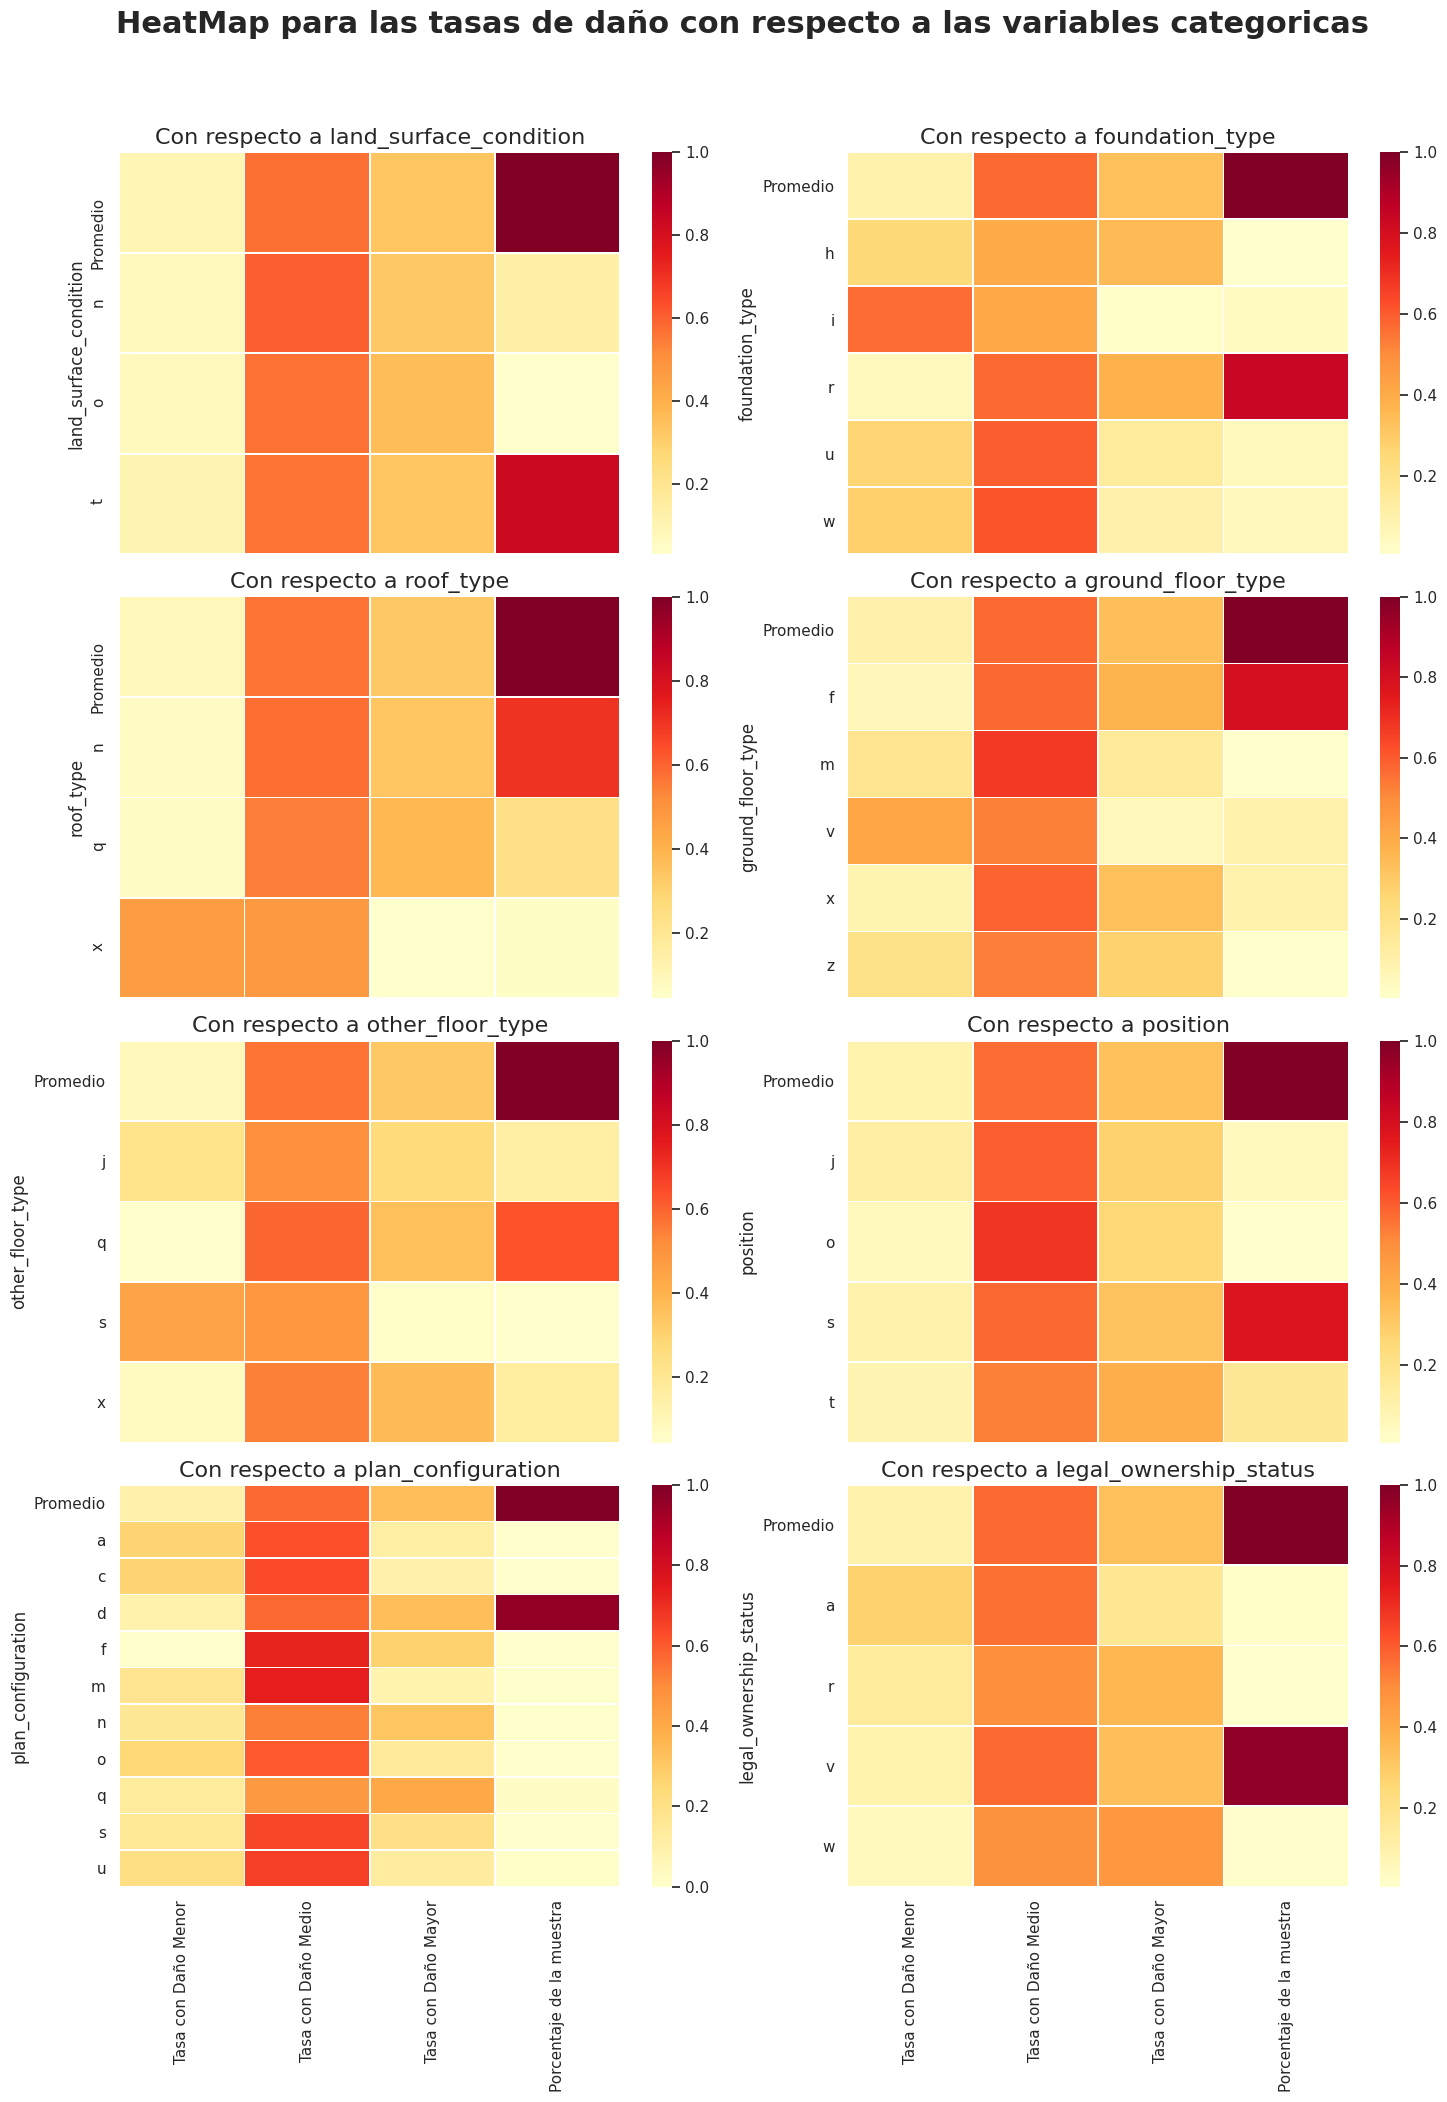

In [ ]:
pivots = []
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(15, 20))
fig.suptitle('HeatMap para las tasas de daño con respecto a las variables categoricas', fontsize=22, weight='bold', y = 1.05)
ax = axes.ravel()
j = 0
for i in range(1,39):
    if type(data[data.columns[i]][0]) == type(data['foundation_type'][0]):
        pivot = data.loc[:,[data.columns[i],'damage_grade', 'has_secondary_use_other']].pivot_table(index= data.columns[i], columns='damage_grade', aggfunc='count')
        pivot = pivot.fillna(0)
        pivot.columns = pivot.columns.droplevel(0)
        pivot.columns = ['Cantidad con Daño Menor', 'Cantidad con Daño Medio', 'Cantidad con Daño Mayor']
        pivot['Cantidad Total'] = pivot['Cantidad con Daño Menor'] + pivot['Cantidad con Daño Medio'] + pivot['Cantidad con Daño Mayor'] 
        df = pd.DataFrame([[pivot['Cantidad con Daño Menor'].sum(), pivot['Cantidad con Daño Medio'].sum(), pivot['Cantidad con Daño Mayor'].sum(), pivot['Cantidad Total'].sum()]],\
                          columns = ['Cantidad con Daño Menor', 'Cantidad con Daño Medio',	'Cantidad con Daño Mayor', 'Cantidad Total'], index=['Promedio'])
        df.index.names = [data.columns[i]]
        pivot = df.append(pivot)
        pivot['Cantidad con Daño Menor'] = pivot['Cantidad con Daño Menor'] / pivot['Cantidad Total']
        pivot['Cantidad con Daño Medio'] = pivot['Cantidad con Daño Medio'] / pivot['Cantidad Total']
        pivot['Cantidad con Daño Mayor'] = pivot['Cantidad con Daño Mayor'] / pivot['Cantidad Total']
        pivot['Cantidad Total'] = pivot['Cantidad Total'] / 260601
        pivot.columns = ['Tasa con Daño Menor', 'Tasa con Daño Medio',	'Tasa con Daño Mayor', 'Porcentaje de la muestra']
        if j == 6 or j == 7:
            sns.heatmap(pivot, linewidths=.5, cmap="YlOrRd", ax=ax[j])
        else:
            sns.heatmap(pivot, linewidths=.5, cmap="YlOrRd", ax=ax[j], xticklabels=False)
        ax[j].set_title('Con respecto a ' + data.columns[i], size= 16)
        j += 1
        pivots.append(pivot)
        #ax[i].set_yticks(())

fig.tight_layout()

## Tipo de cimientos usados en planta baja

Examinaremos la relación entre las variables categóricas que comprenden `ground_floor_type` y `other_floor_type`

In [ ]:
pd.crosstab(data['other_floor_type'], data['ground_floor_type']).T

other_floor_type       j       q      s      x
ground_floor_type                             
f                  25851  147169    664  35935
m                    137     198     50    123
v                   9321    2771  10148   2353
x                   4139   14909   1154   4675
z                    395     235     12    362

Podemos apreciar que f es la variable que más se repite en ground_floor_type con mucha diferencia por sobre el resto, al igual que en other_floor_type. Intentaremos analizar la interacción de estas dos

Se observa que la interacción entre f y q se produce en la mayor parte de las ocasiones

In [ ]:
pd.crosstab(index=data["ground_floor_type"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1)

damage_grade                         1  ...                    3
ground_floor_type                       ...                     
f                                 5.95  ...                36.86
m                                17.72  ...                14.76
v                                41.92  ...                 5.34
x                                 8.25  ...                33.32
z                                19.82  ...                27.19

[5 rows x 3 columns]

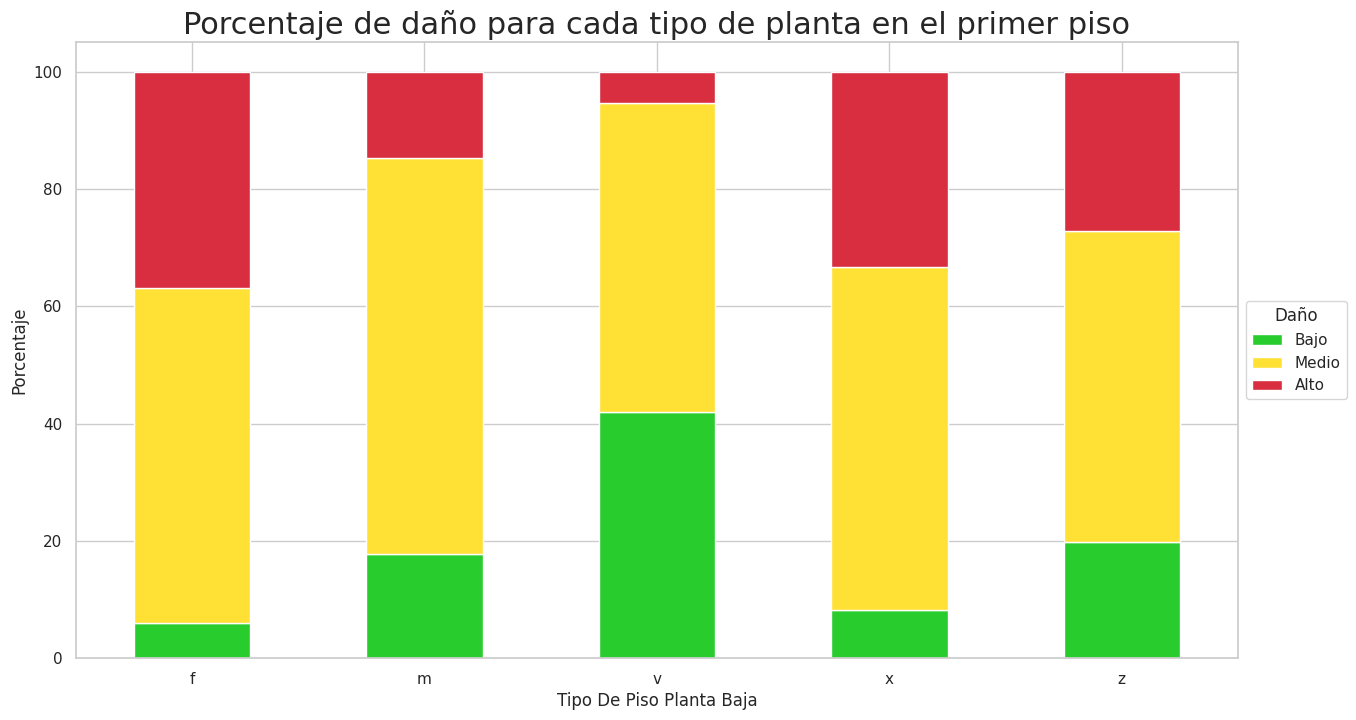

In [ ]:
plot = pd.crosstab(index=data["ground_floor_type"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para cada tipo de planta en el primer piso", size=22)
plot.set_xlabel("Tipo De Piso Planta Baja")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Text(0.5, 1.0, 'Cantidad de edificios según su daño, para cada tipo de planta en el primer piso')

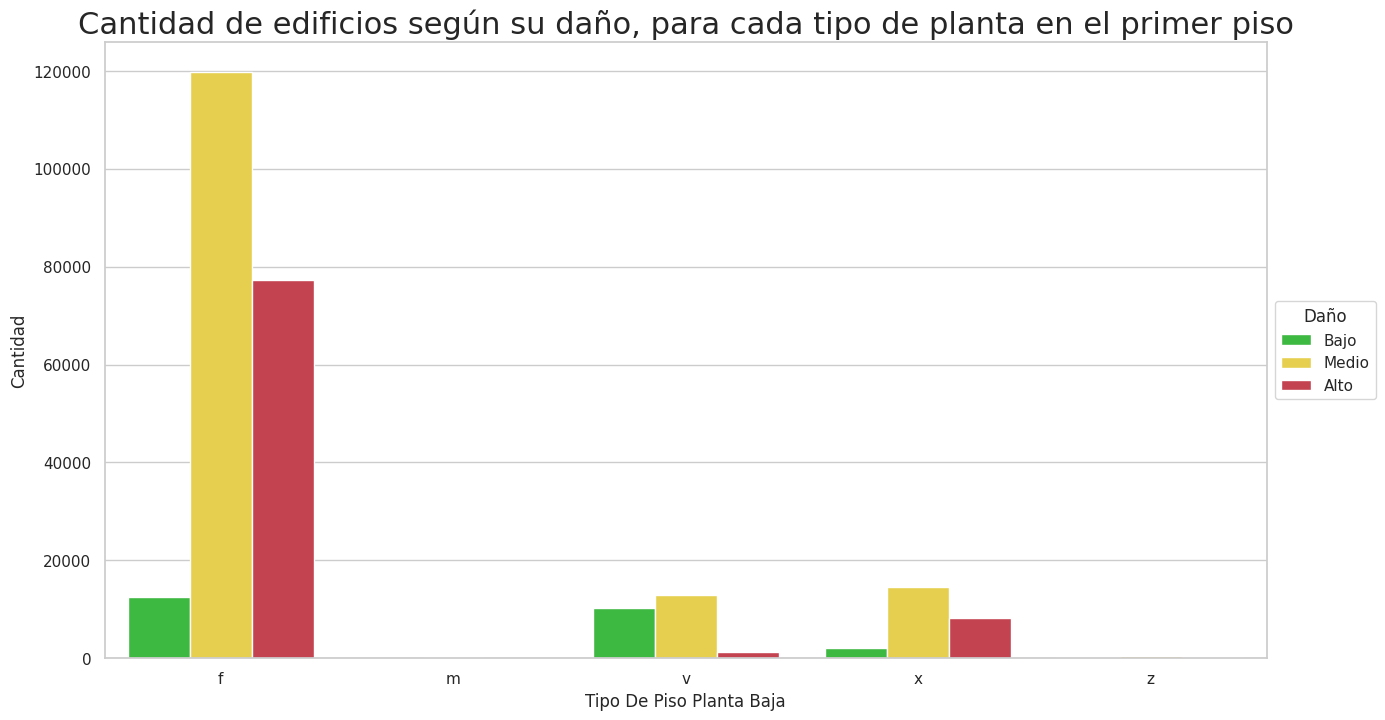

In [ ]:
g = sns.countplot(x='ground_floor_type', hue='damage_grade', data=data, palette=['#28CC2D', '#FFE135', '#D82E3F'])
g.set_ylabel("Cantidad")
g.set_xlabel("Tipo De Piso Planta Baja")
ax = plt.gca()

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])
ax.set_title("Cantidad de edificios según su daño, para cada tipo de planta en el primer piso", size=22)

Podemos sacar como conclusiones:

* f es un caso de fracaso, y es muy representativa.
* x y v son dos casos de éxito, y son representativas.
* m y z no son representativas.

In [ ]:
useful_data["ground_floor_type"] = data["ground_floor_type"]
useful_data["ground_floor_failure"] = data["ground_floor_type"] == 'f'
useful_data["ground_floor_success"] = (data["ground_floor_type"] == 'x') | (data["ground_floor_type"] == 'v')

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  ground_floor_failure  ground_floor_success
0       802906             3  ...                  True                 False

[1 rows x 8 columns]

## Tipo de cimientos usados en otras plantas

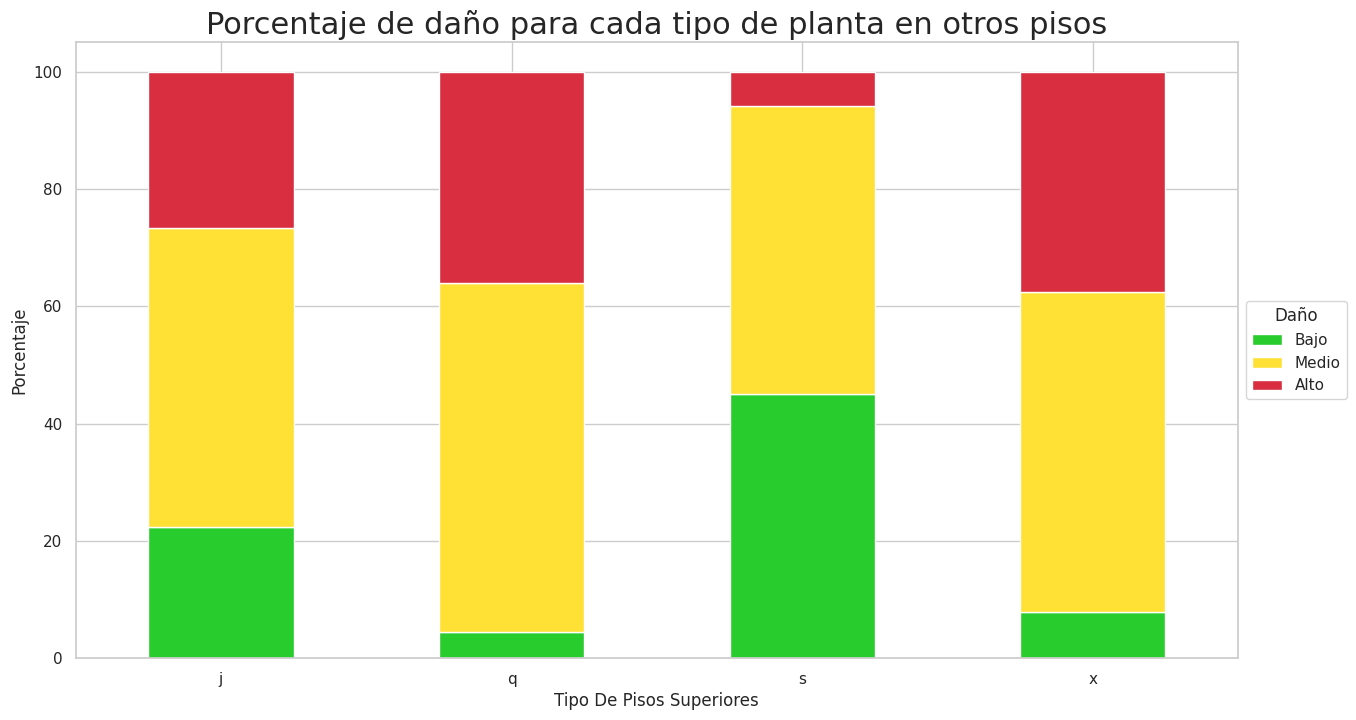

In [ ]:
plot = pd.crosstab(index=data["other_floor_type"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para cada tipo de planta en otros pisos", size=22)
plot.set_xlabel("Tipo De Pisos Superiores")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

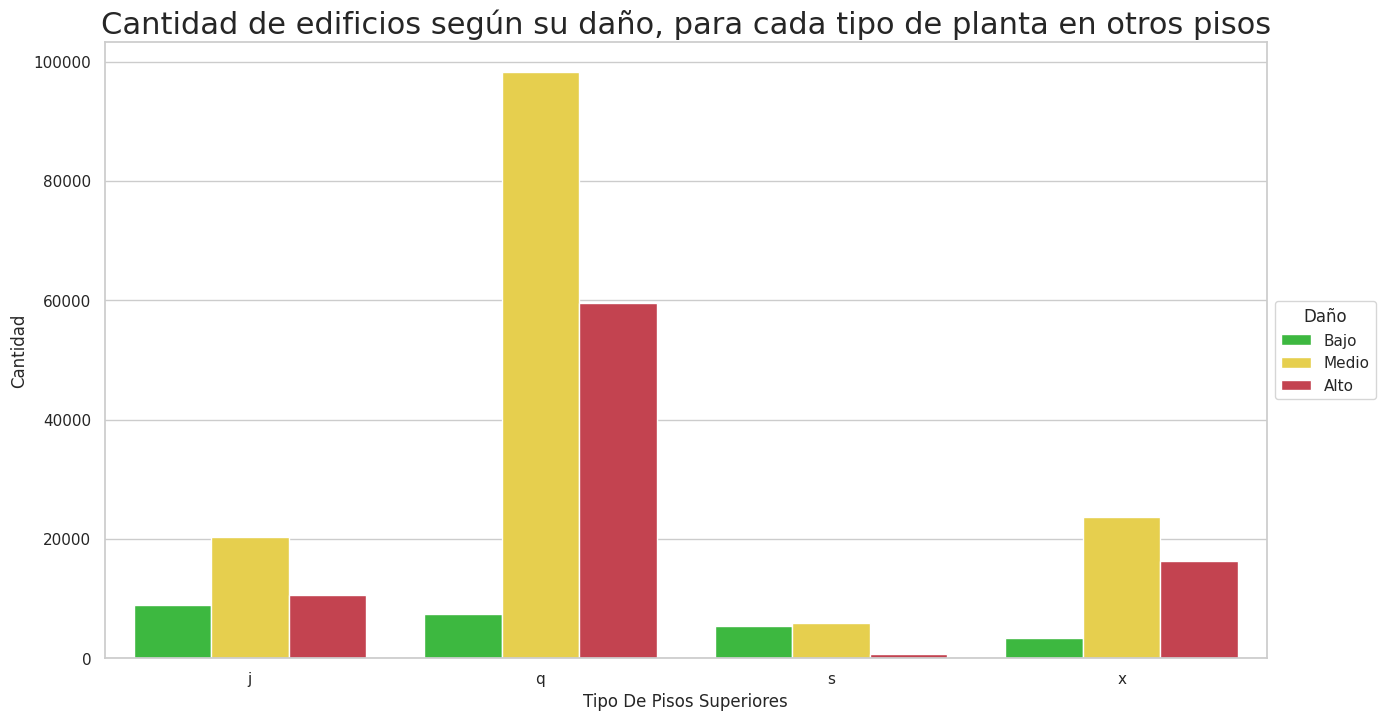

In [ ]:
g=sns.countplot(x='other_floor_type', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
g.set_ylabel("Cantidad")
g.set_xlabel("Tipo De Pisos Superiores")
ax = plt.gca()
ax.set_title("Cantidad de edificios según su daño, para cada tipo de planta en otros pisos", size=22)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Podemos concluir:

* Todas las variables son representativas.
* q y x son los casos de fracaso.
* s es el caso de éxito.
* De j no se puede decir nada

In [ ]:
useful_data["other_floor_type"] = data["other_floor_type"]
useful_data["other_floor_success"] = data["other_floor_type"] == 's'
useful_data["other_floor_failure"] = (data["other_floor_type"] == 'x') | (data["other_floor_type"] == 'q')

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  other_floor_success  other_floor_failure
0       802906             3  ...                False                 True

[1 rows x 11 columns]

## Orientación del edificio

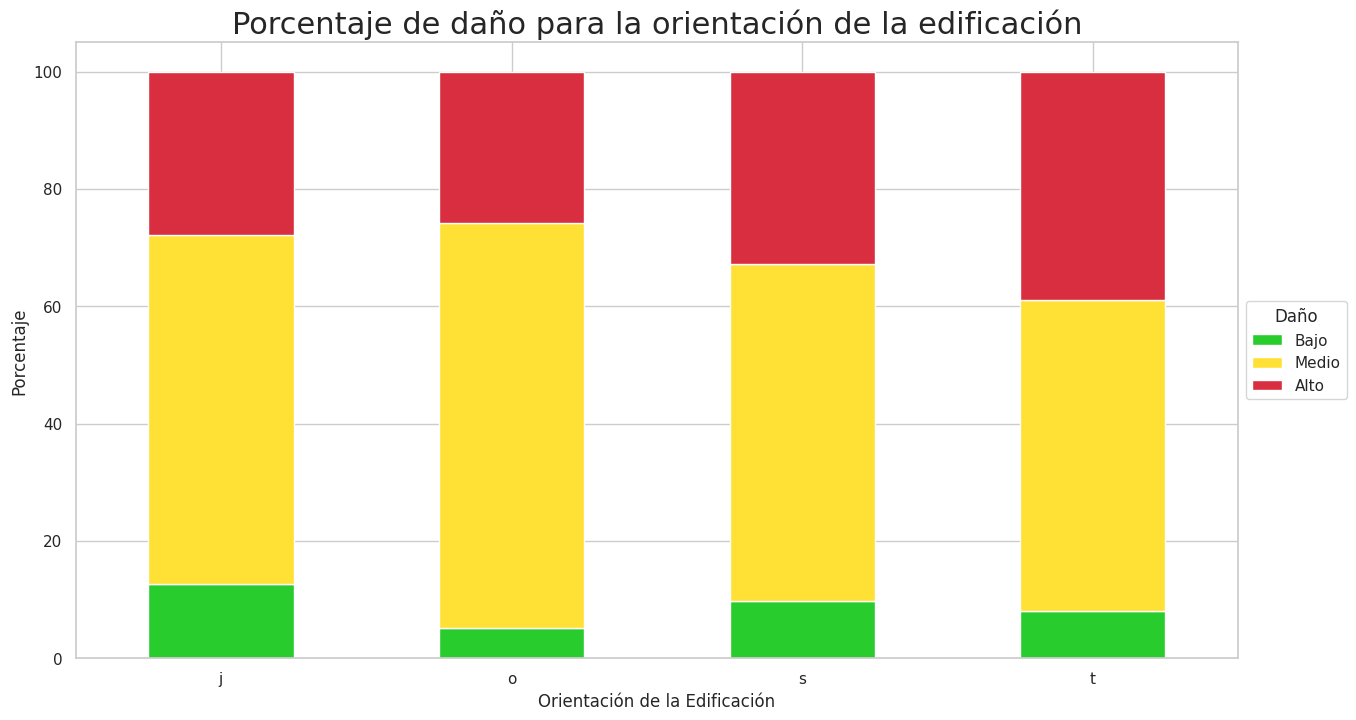

In [ ]:
plot = pd.crosstab(index=data["position"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para la orientación de la edificación", size=22)
plot.set_xlabel("Orientación de la Edificación")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

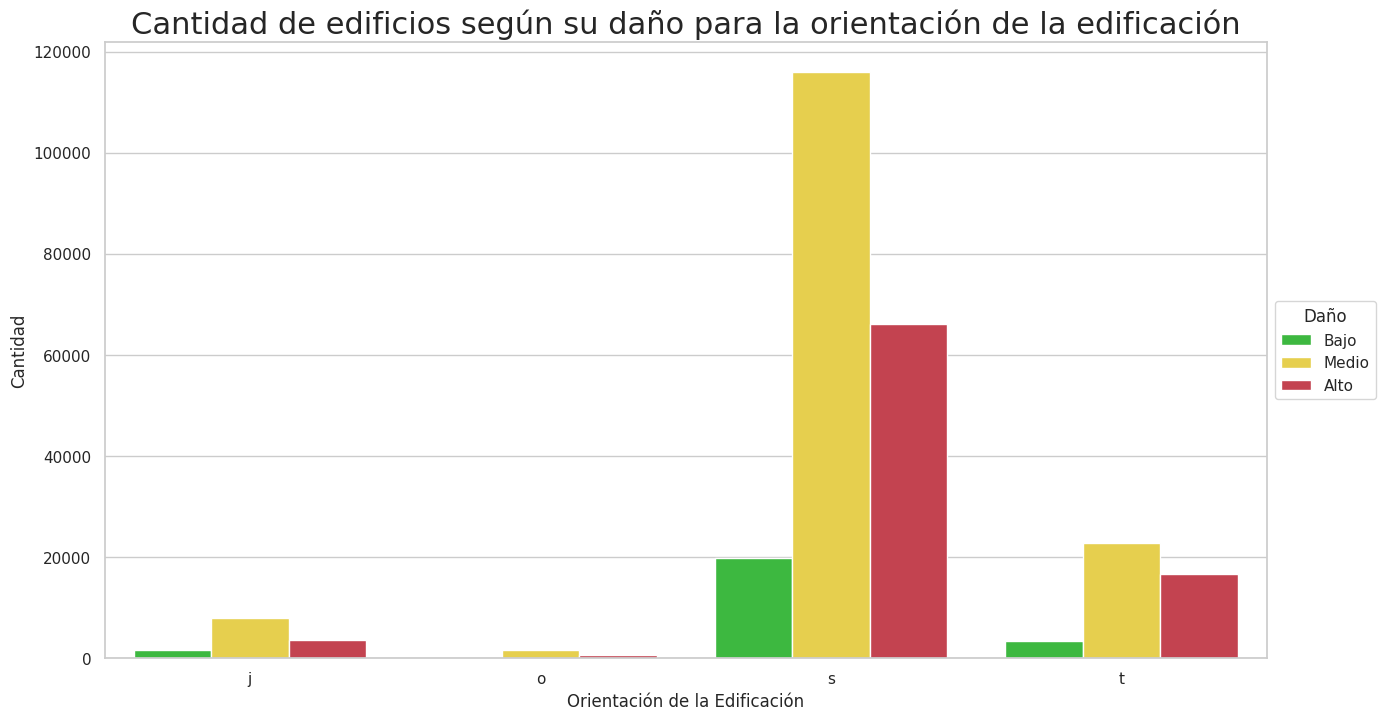

In [ ]:
g = sns.countplot(x='position', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
g.set_ylabel('Cantidad')
g.set_xlabel('Orientación de la Edificación')
ax = plt.gca()
ax.set_title("Cantidad de edificios según su daño para la orientación de la edificación", size=22)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Concluimos:

* La variables j y o no afectan significativamente al promedio general de daño.
* Las variables s y t afectan negativamente al promedio general, por lo tanto son caso de fracaso.
* No hay caso de éxito.

In [ ]:
useful_data["position"] = data["position"]
useful_data["position_failure"] = (data["position"] == 's') | (data["position"] == 't') 

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  position  position_failure
0       802906             3  ...         t              True

[1 rows x 13 columns]

## Formato de construcción de la edificación

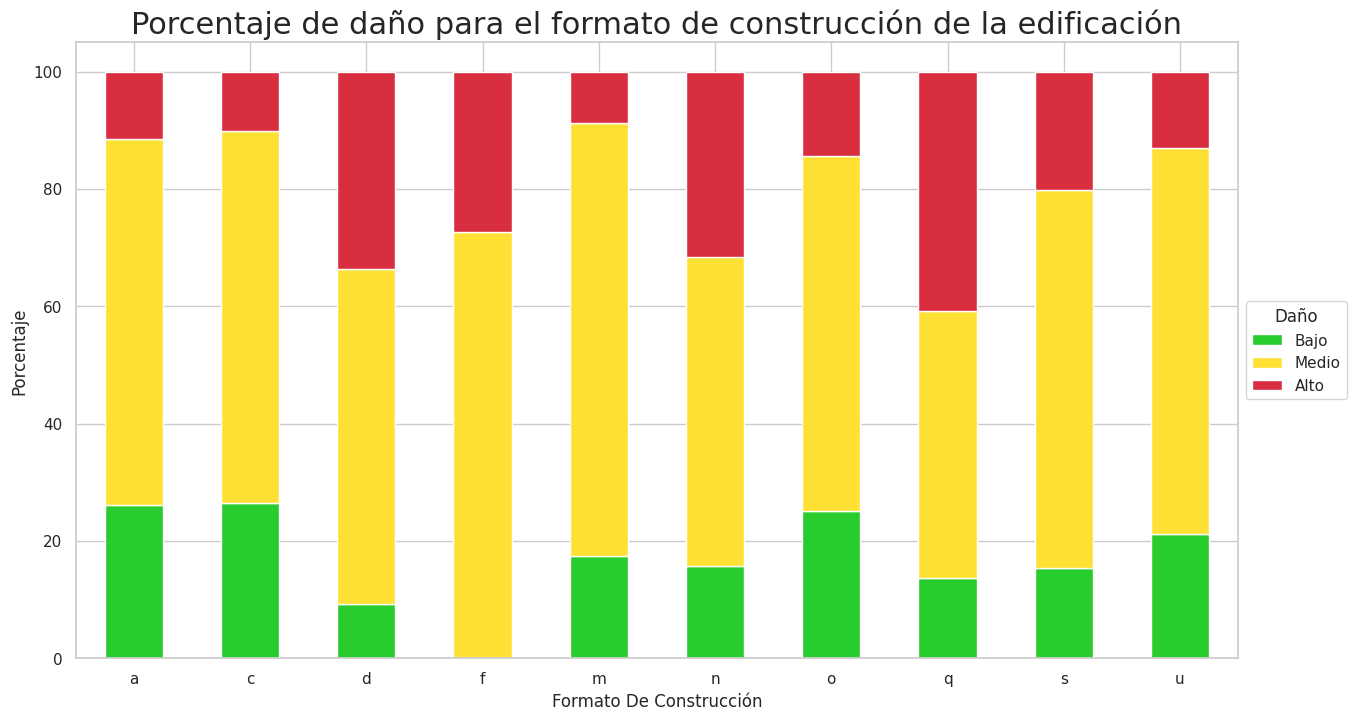

In [ ]:
plot = pd.crosstab(index=data["plan_configuration"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para el formato de construcción de la edificación", size=22)
plot.set_xlabel("Formato De Construcción")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

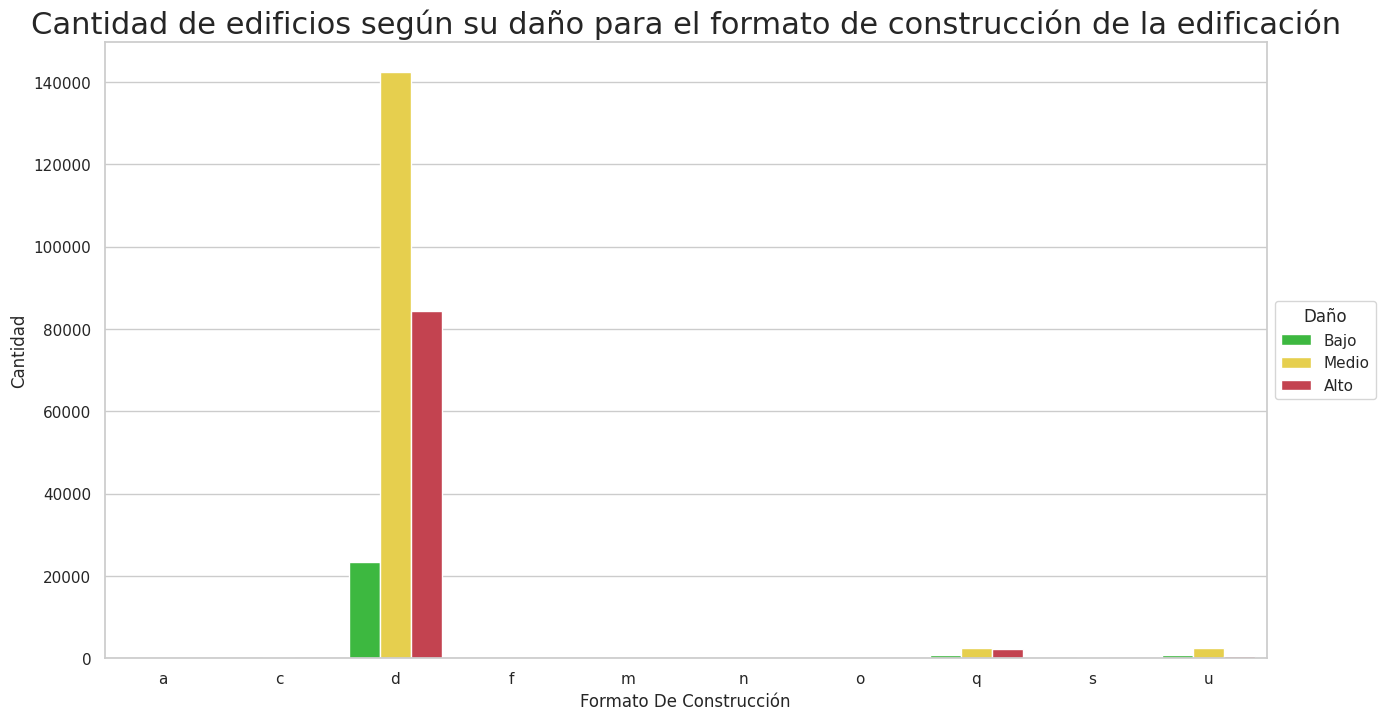

In [ ]:
g=sns.countplot(x='plan_configuration', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
g.set_ylabel('Cantidad')
g.set_xlabel('Formato De Construcción')
ax = plt.gca()
ax.set_title("Cantidad de edificios según su daño para el formato de construcción de la edificación", size=22)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Podemos concluir:

* d es la única representativa y es un caso de fracaso claro.

In [ ]:
useful_data["plan_configuration"] = data["plan_configuration"]
useful_data["plan_configuration_failure"] = data["plan_configuration"] == 'd'

## Tipo de techo usado en la construcción de la edificación

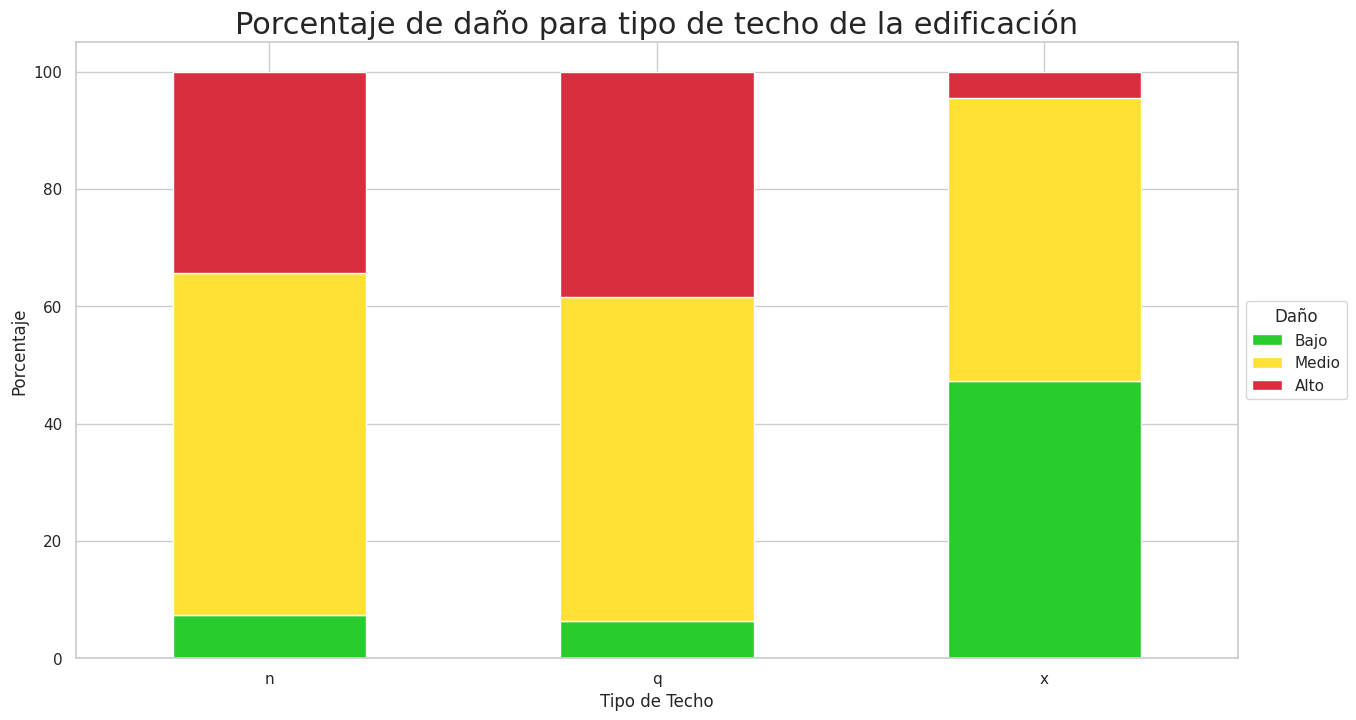

In [ ]:
plot = pd.crosstab(index=data["roof_type"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para tipo de techo de la edificación", size=22)
plot.set_xlabel("Tipo de Techo")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

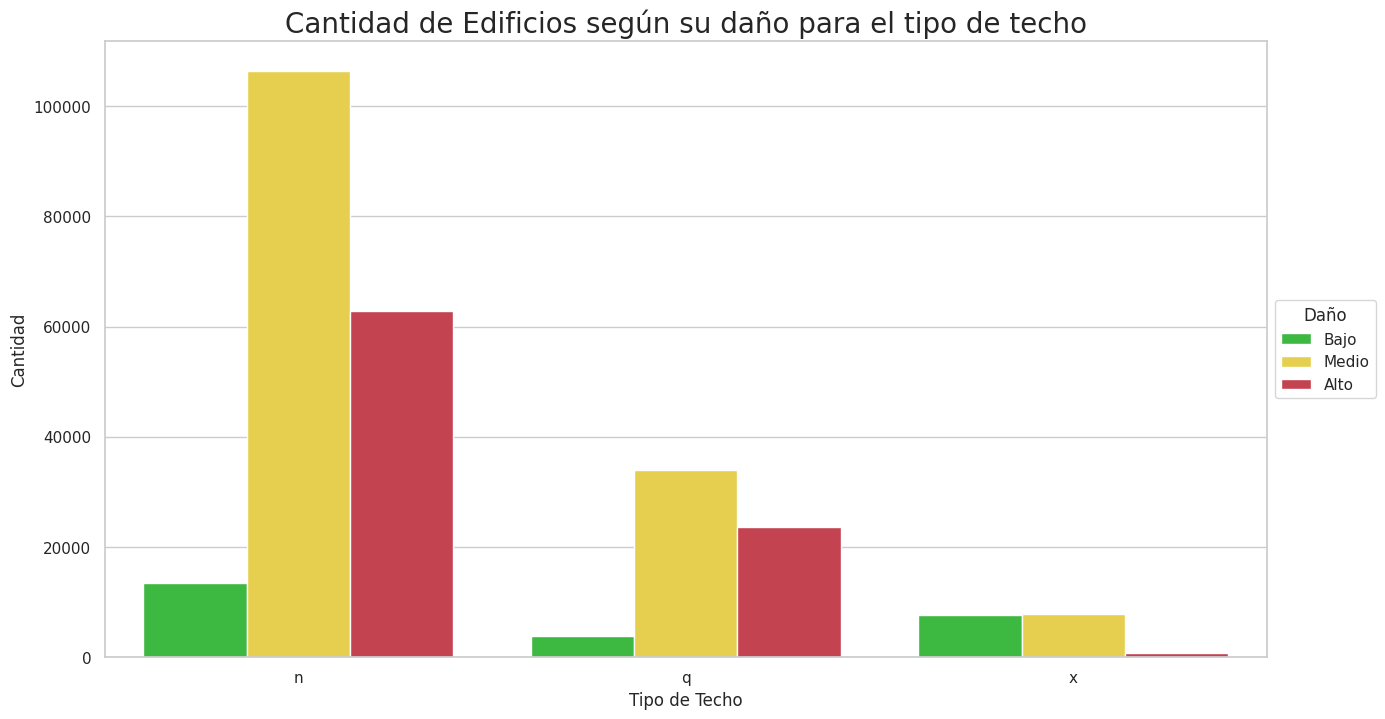

In [ ]:
sns.countplot(x='roof_type', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.set_title("Cantidad de Edificios según su daño para el tipo de techo",size=20)
ax.set_xlabel("Tipo de Techo")
ax.set_ylabel("Cantidad")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Concluimos:

* Todas las variables son representativas.
* El caso de éxito es x.
* Los casos de fracaso son n y q.

In [ ]:
useful_data["roof_type"] = data["roof_type"]
useful_data["roof_type_success"] = data["roof_type"] == 'x'
useful_data["roof_type_failure"] = (data["roof_type"] == 'n') | (data["roof_type"] == 'q')

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  roof_type_success  roof_type_failure
0       802906             3  ...              False               True

[1 rows x 18 columns]

## Estado legal de la tierra

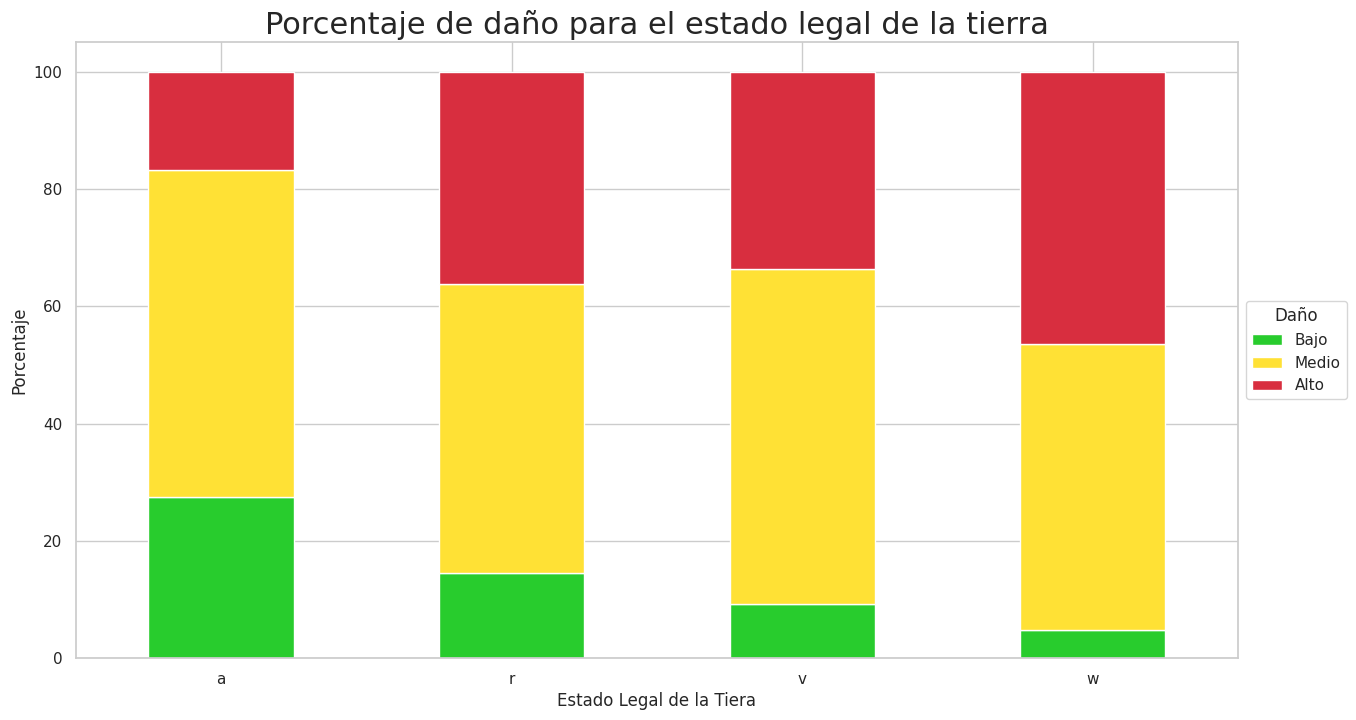

In [ ]:
plot = pd.crosstab(index=data["legal_ownership_status"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para el estado legal de la tierra", size=22)
plot.set_xlabel("Estado Legal de la Tiera")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

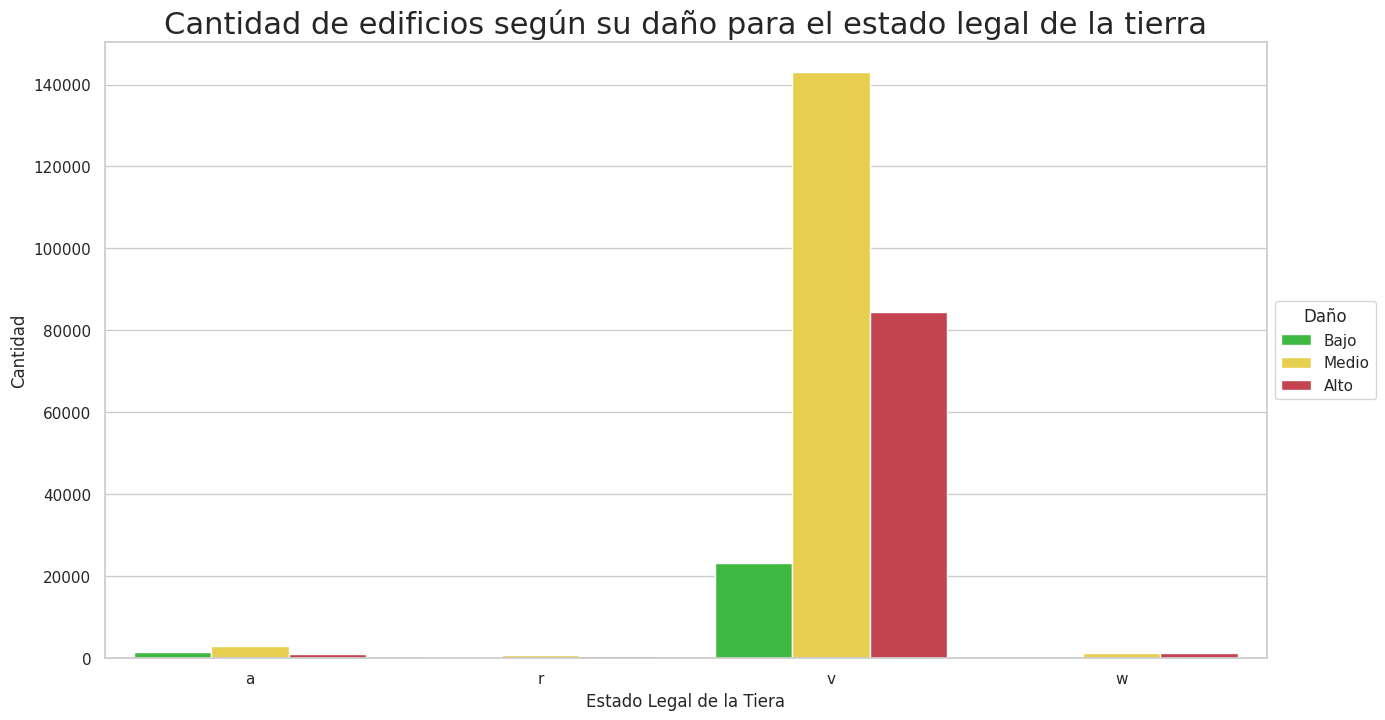

In [ ]:
sns.countplot(x='legal_ownership_status', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.set_xlabel("Estado Legal de la Tiera")
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de edificios según su daño para el estado legal de la tierra", size=22)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Podemos observar que la única variable representativa es v y no modifica el promedio general de daño.

Concluimos:

* No hay variable representativa que modifique el promedio general de daño.
* A priori, no tendremos en cuenta esta columna.

## Tipo de cimientos usados cuando se construyó la edificación

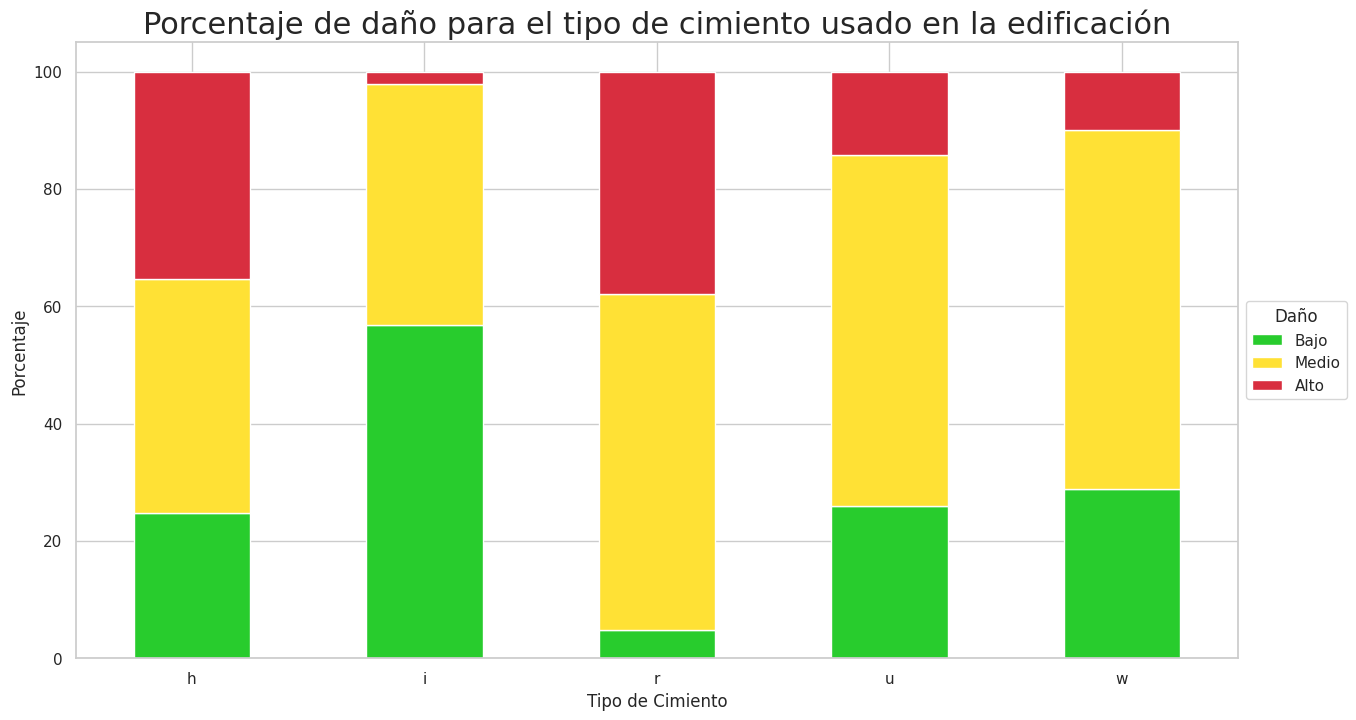

In [ ]:
plot = pd.crosstab(index=data["foundation_type"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para el tipo de cimiento usado en la edificación", size=22)
plot.set_xlabel("Tipo de Cimiento")
plot.set_ylabel("Porcentaje")


plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Text(0.5, 1.0, 'Cantidad de edificios según su daño para el tipo de cimiento usado en la edificación')

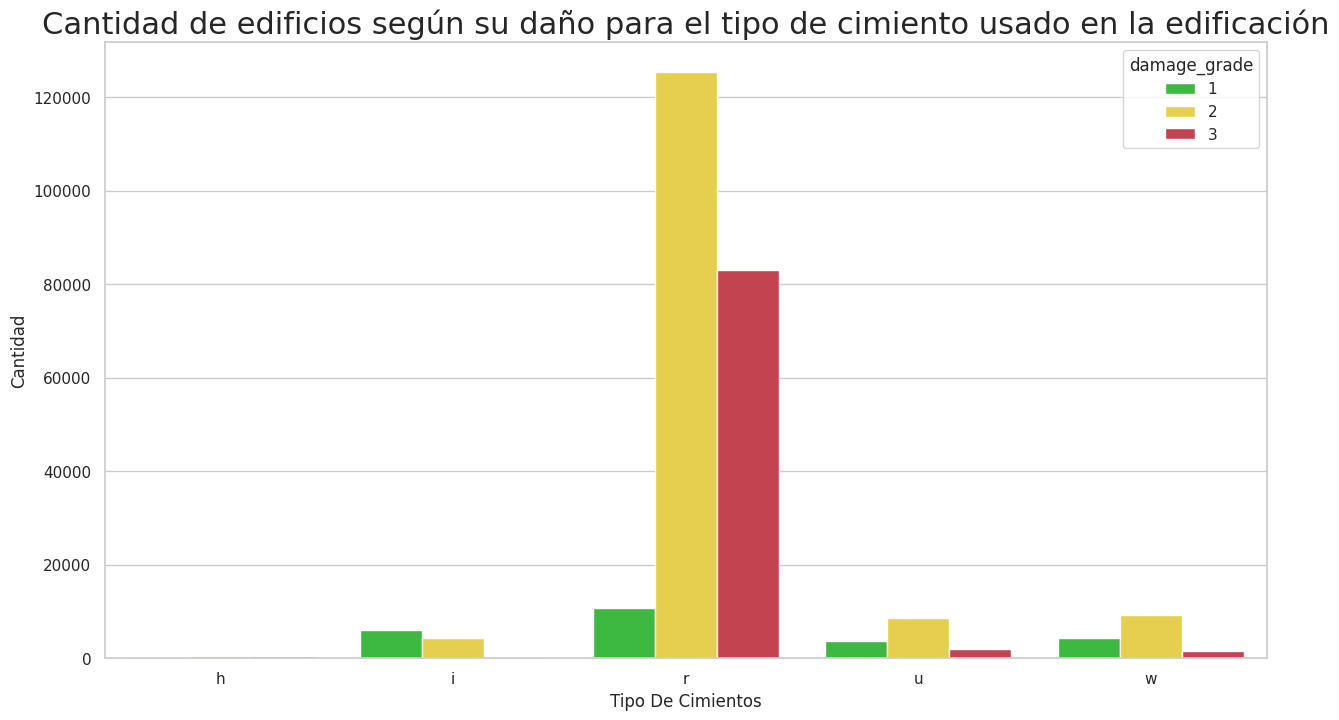

In [ ]:
sns.countplot(x='foundation_type', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.set_xlabel("Tipo De Cimientos")
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de edificios según su daño para el tipo de cimiento usado en la edificación", size=22)

Concluimos:

* h no es una variable representativa.
* r es un caso de fracaso.
* i, u y w son casos de éxito. 

In [ ]:
useful_data["foundation_type"] = data["foundation_type"]
useful_data["foundation_type_failure"] = data["foundation_type"] == 'r'
useful_data["foundation_type_success"] = (data["foundation_type"] == 'i') | (data["foundation_type"] == 'u') | (data["foundation_type"] == 'w')

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  foundation_type_failure  foundation_type_success
0       802906             3  ...                     True                    False

[1 rows x 21 columns]

## Condición de la tierra de la edificación en su construcción

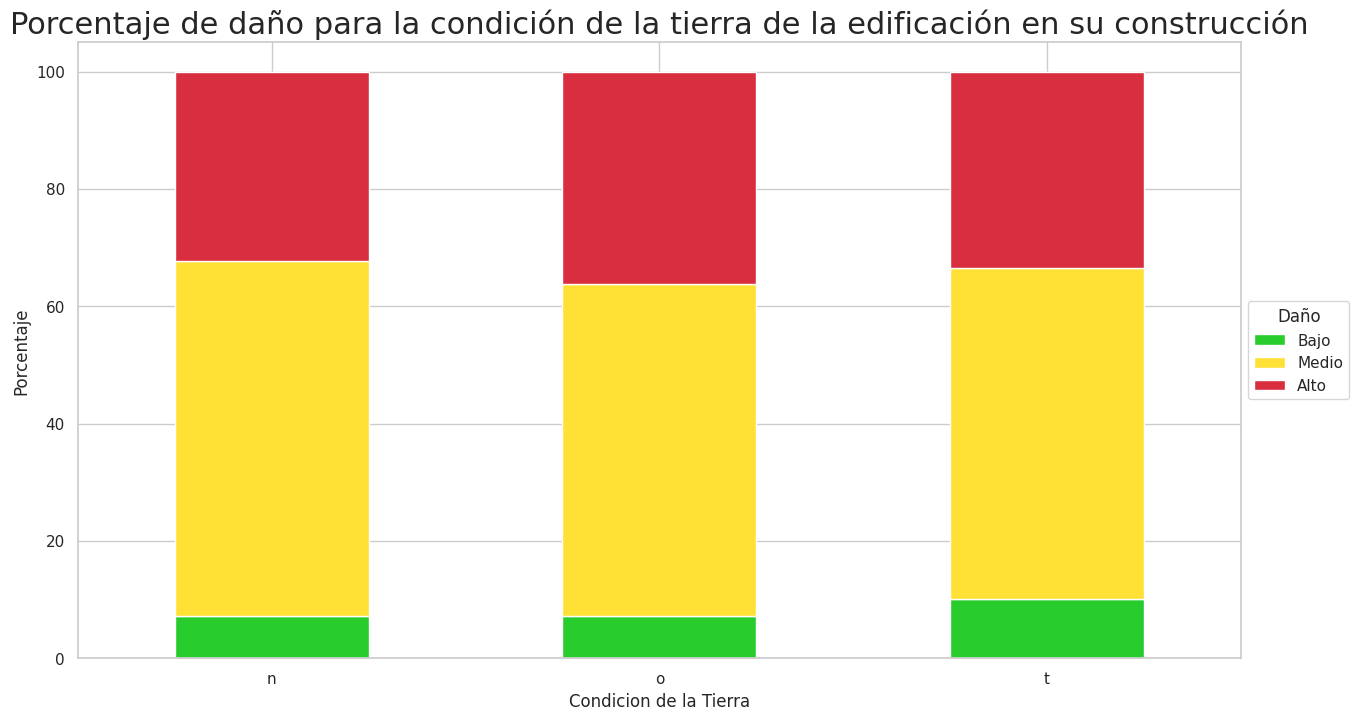

In [ ]:
plot = pd.crosstab(index=data["land_surface_condition"],
            columns=data["damage_grade"]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'],rot=0)
plot.set_title("Porcentaje de daño para la condición de la tierra de la edificación en su construcción", size=22)
plot.set_xlabel("Condicion de la Tierra")
plot.set_ylabel("Porcentaje")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

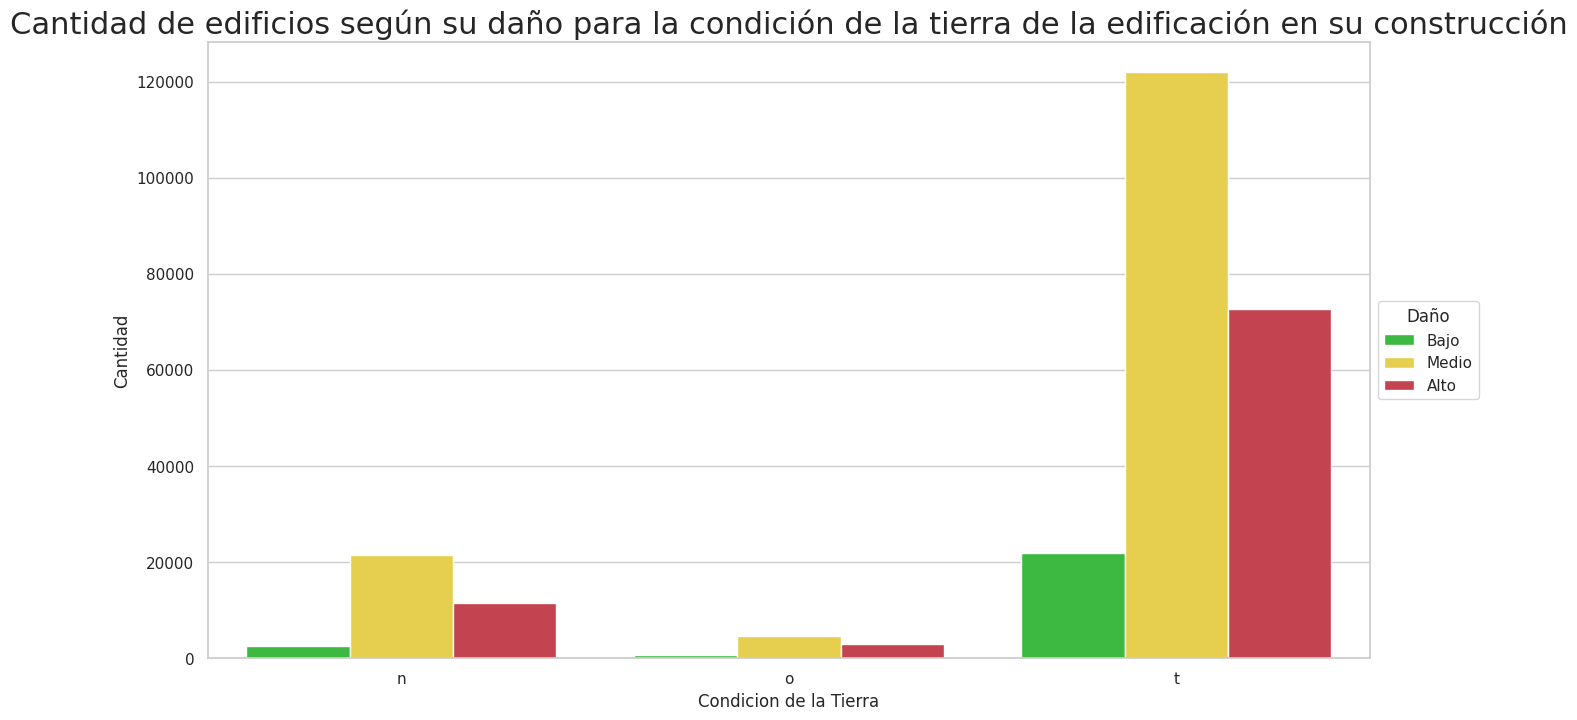

In [ ]:
sns.countplot(x='land_surface_condition', hue='damage_grade', data=data, palette= ['#28CC2D', '#FFE135', '#D82E3F'])
ax = plt.gca()
ax.set_xlabel("Condicion de la Tierra")
ax.set_ylabel("Cantidad")
ax.set_title("Cantidad de edificios según su daño para la condición de la tierra de la edificación en su construcción", size=22)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Concluimos:

* Todas las variables son representativas, pero ninguna modifica el promedio general del daño.
* A priori, no la incluimos entre las columnas más importantes.

## Ubicación según el geo_level

In [ ]:
def calcular_prob(df):
  df = (df.groupby('damage_grade').size()).to_frame()
  df.columns = ['Frecuencia']
  df['Frecuencia'] = df['Frecuencia'] / df['Frecuencia'].sum() 
  return list(df['Frecuencia'])

In [ ]:
data_general = data
data_general = calcular_prob(data)
category_names = ['Daño Bajo', 'Daño Medio','Daño Alto']
results = {
    'Promedio': data_general
}

In [ ]:
data.groupby('geo_level_1_id')['building_id'].count().mean


<bound method Series.mean of geo_level_1_id
0      4011
1      2701
2       931
3      7540
4     14568
5      2690
6     24381
7     18994
8     19080
9      3958
10    22079
11     8220
12     3194
13     9608
14     1714
15     2320
16     4332
17    21813
18     3189
19      372
20    17216
21    14889
22     6252
23     1121
24     1310
25     5624
26    22615
27    12532
28      265
29      396
30     2686
Name: building_id, dtype: int64>

In [ ]:
for i in range (0,11):
    df = data.loc[data['geo_level_1_id'] == i]
    lista_probas = calcular_prob(df)
    results['Region ' + str(i)] = lista_probas

In [ ]:
df = data.loc[data['geo_level_1_id'] == 28]
df = (df.groupby('damage_grade').size()).to_frame()
df

0
damage_grade     
2             157
3             108

In [ ]:
def survey(results, category_names):
    """
    función basada en TheMatplotlib ...
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.85, 0.15, data.shape[1]))

    fig, ax = plt.subplots(figsize=(30, 15))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
  #      ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

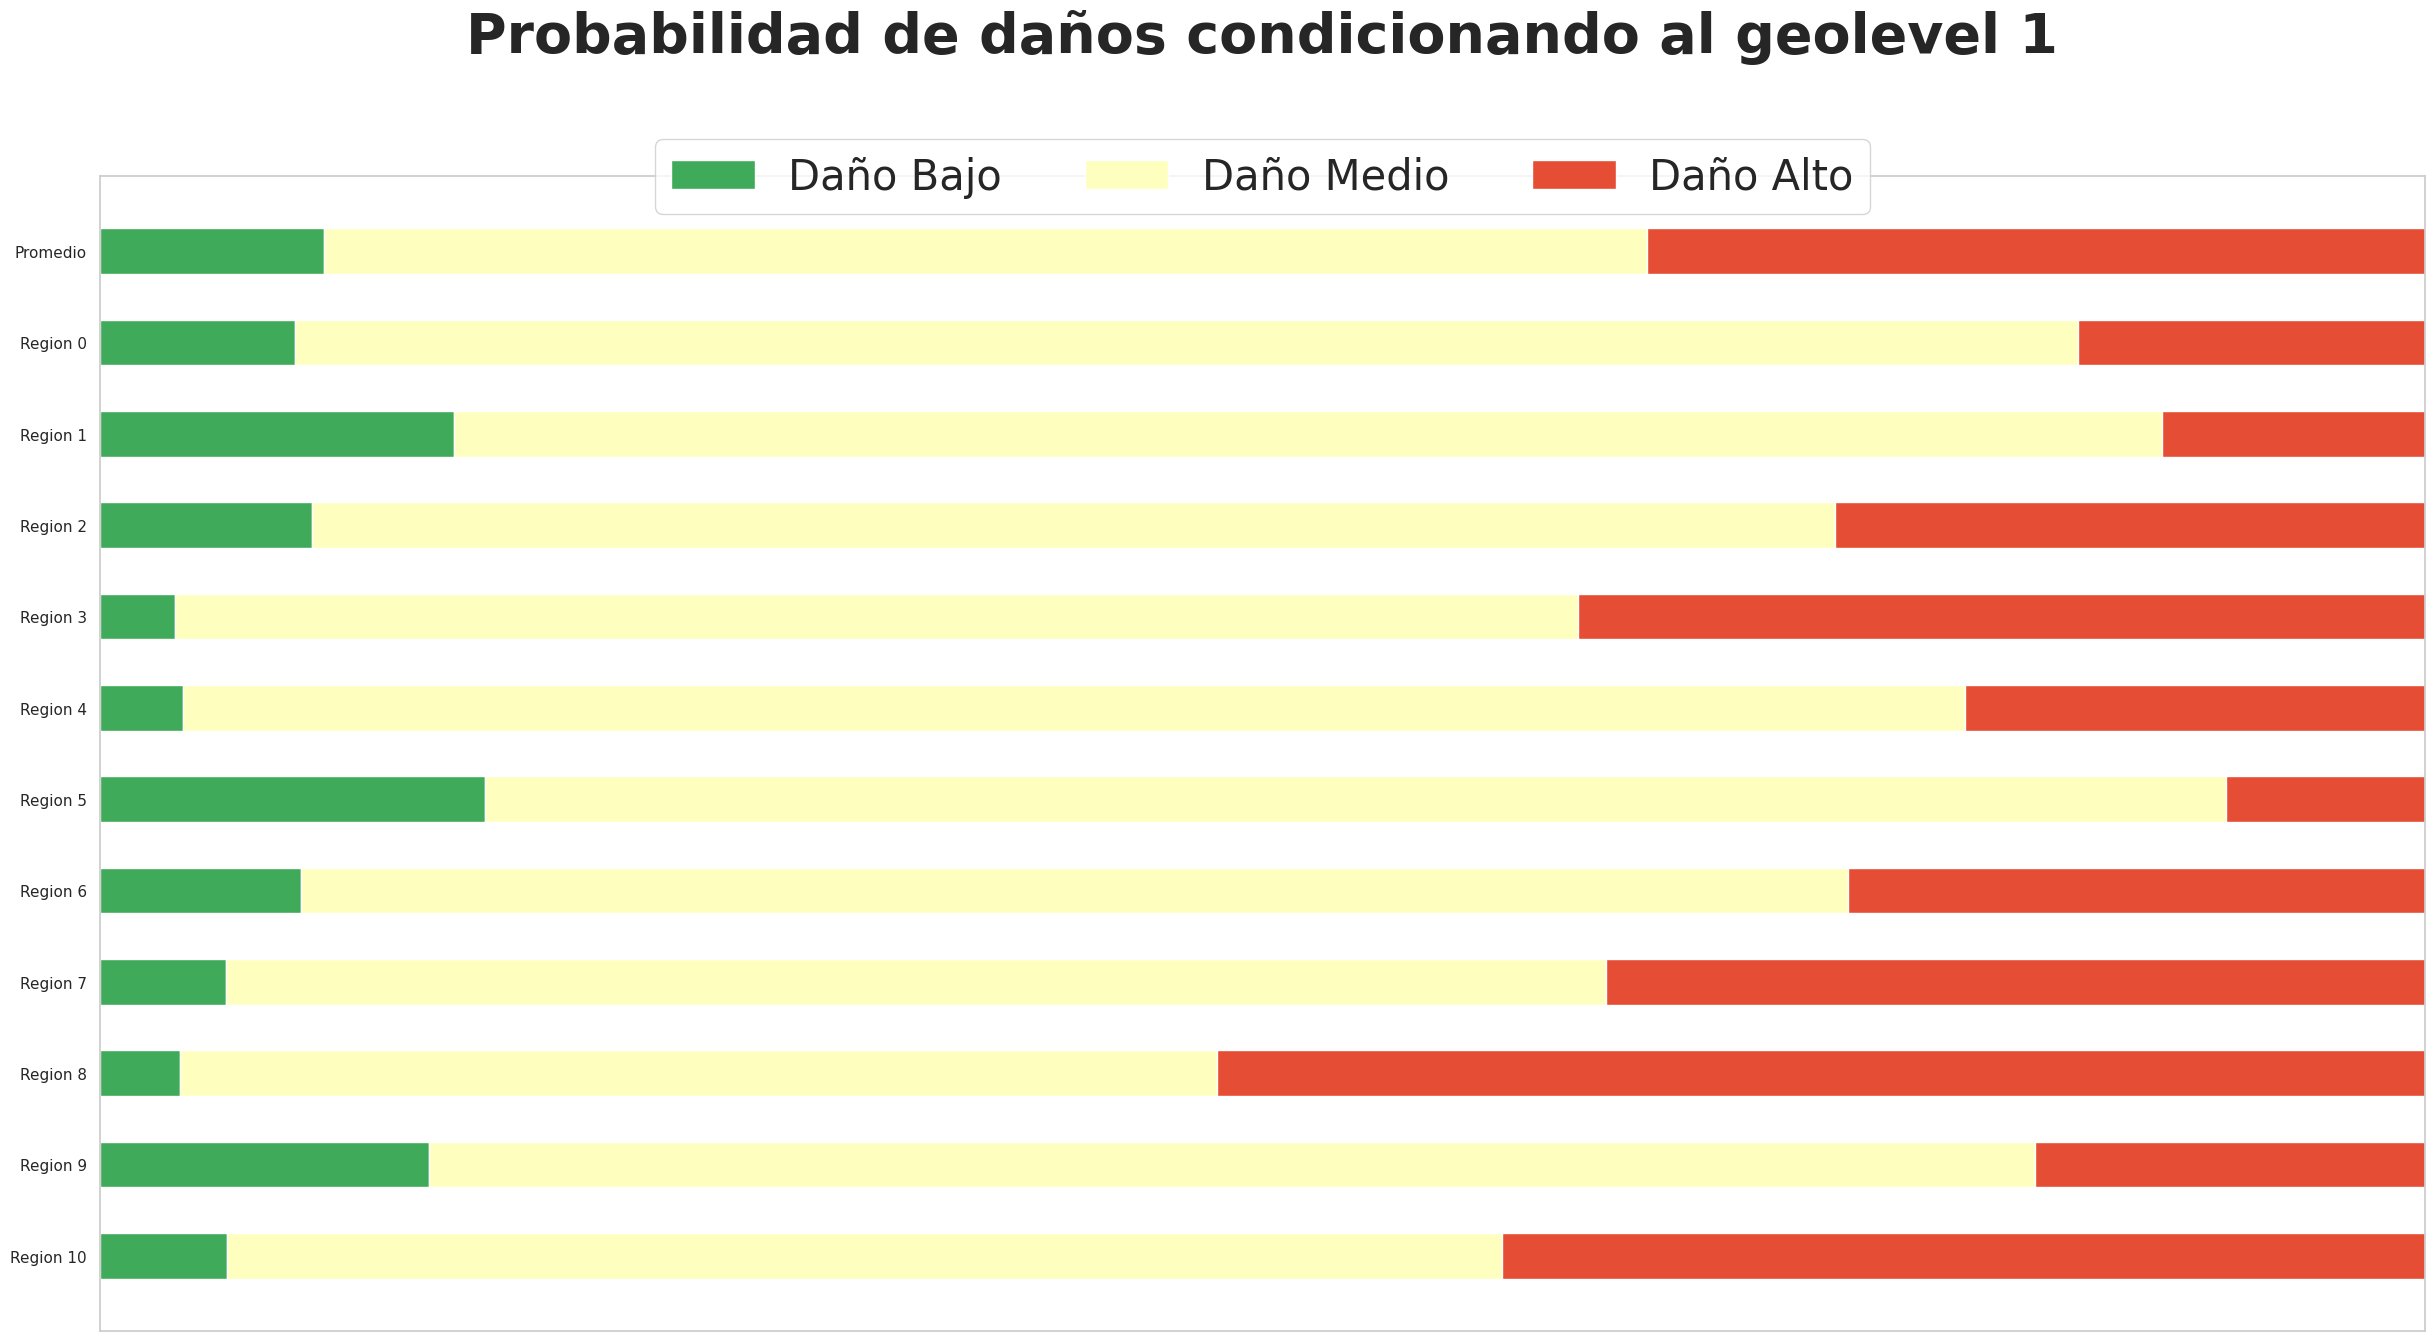

In [ ]:
fig, ax = survey(results, category_names)
ax.set_title("Probabilidad de daños condicionando al geolevel 1", weight= 'bold', y=1.1,fontsize=40)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.05),prop={'size':30},ncol=3)

plt.rc('xtick', labelsize=50) 

In [ ]:
results={}
for i in range (11,21):
    df = data.loc[data['geo_level_1_id'] == i]
    lista_probas = calcular_prob(df)
    results['Region ' + str(i)] = lista_probas

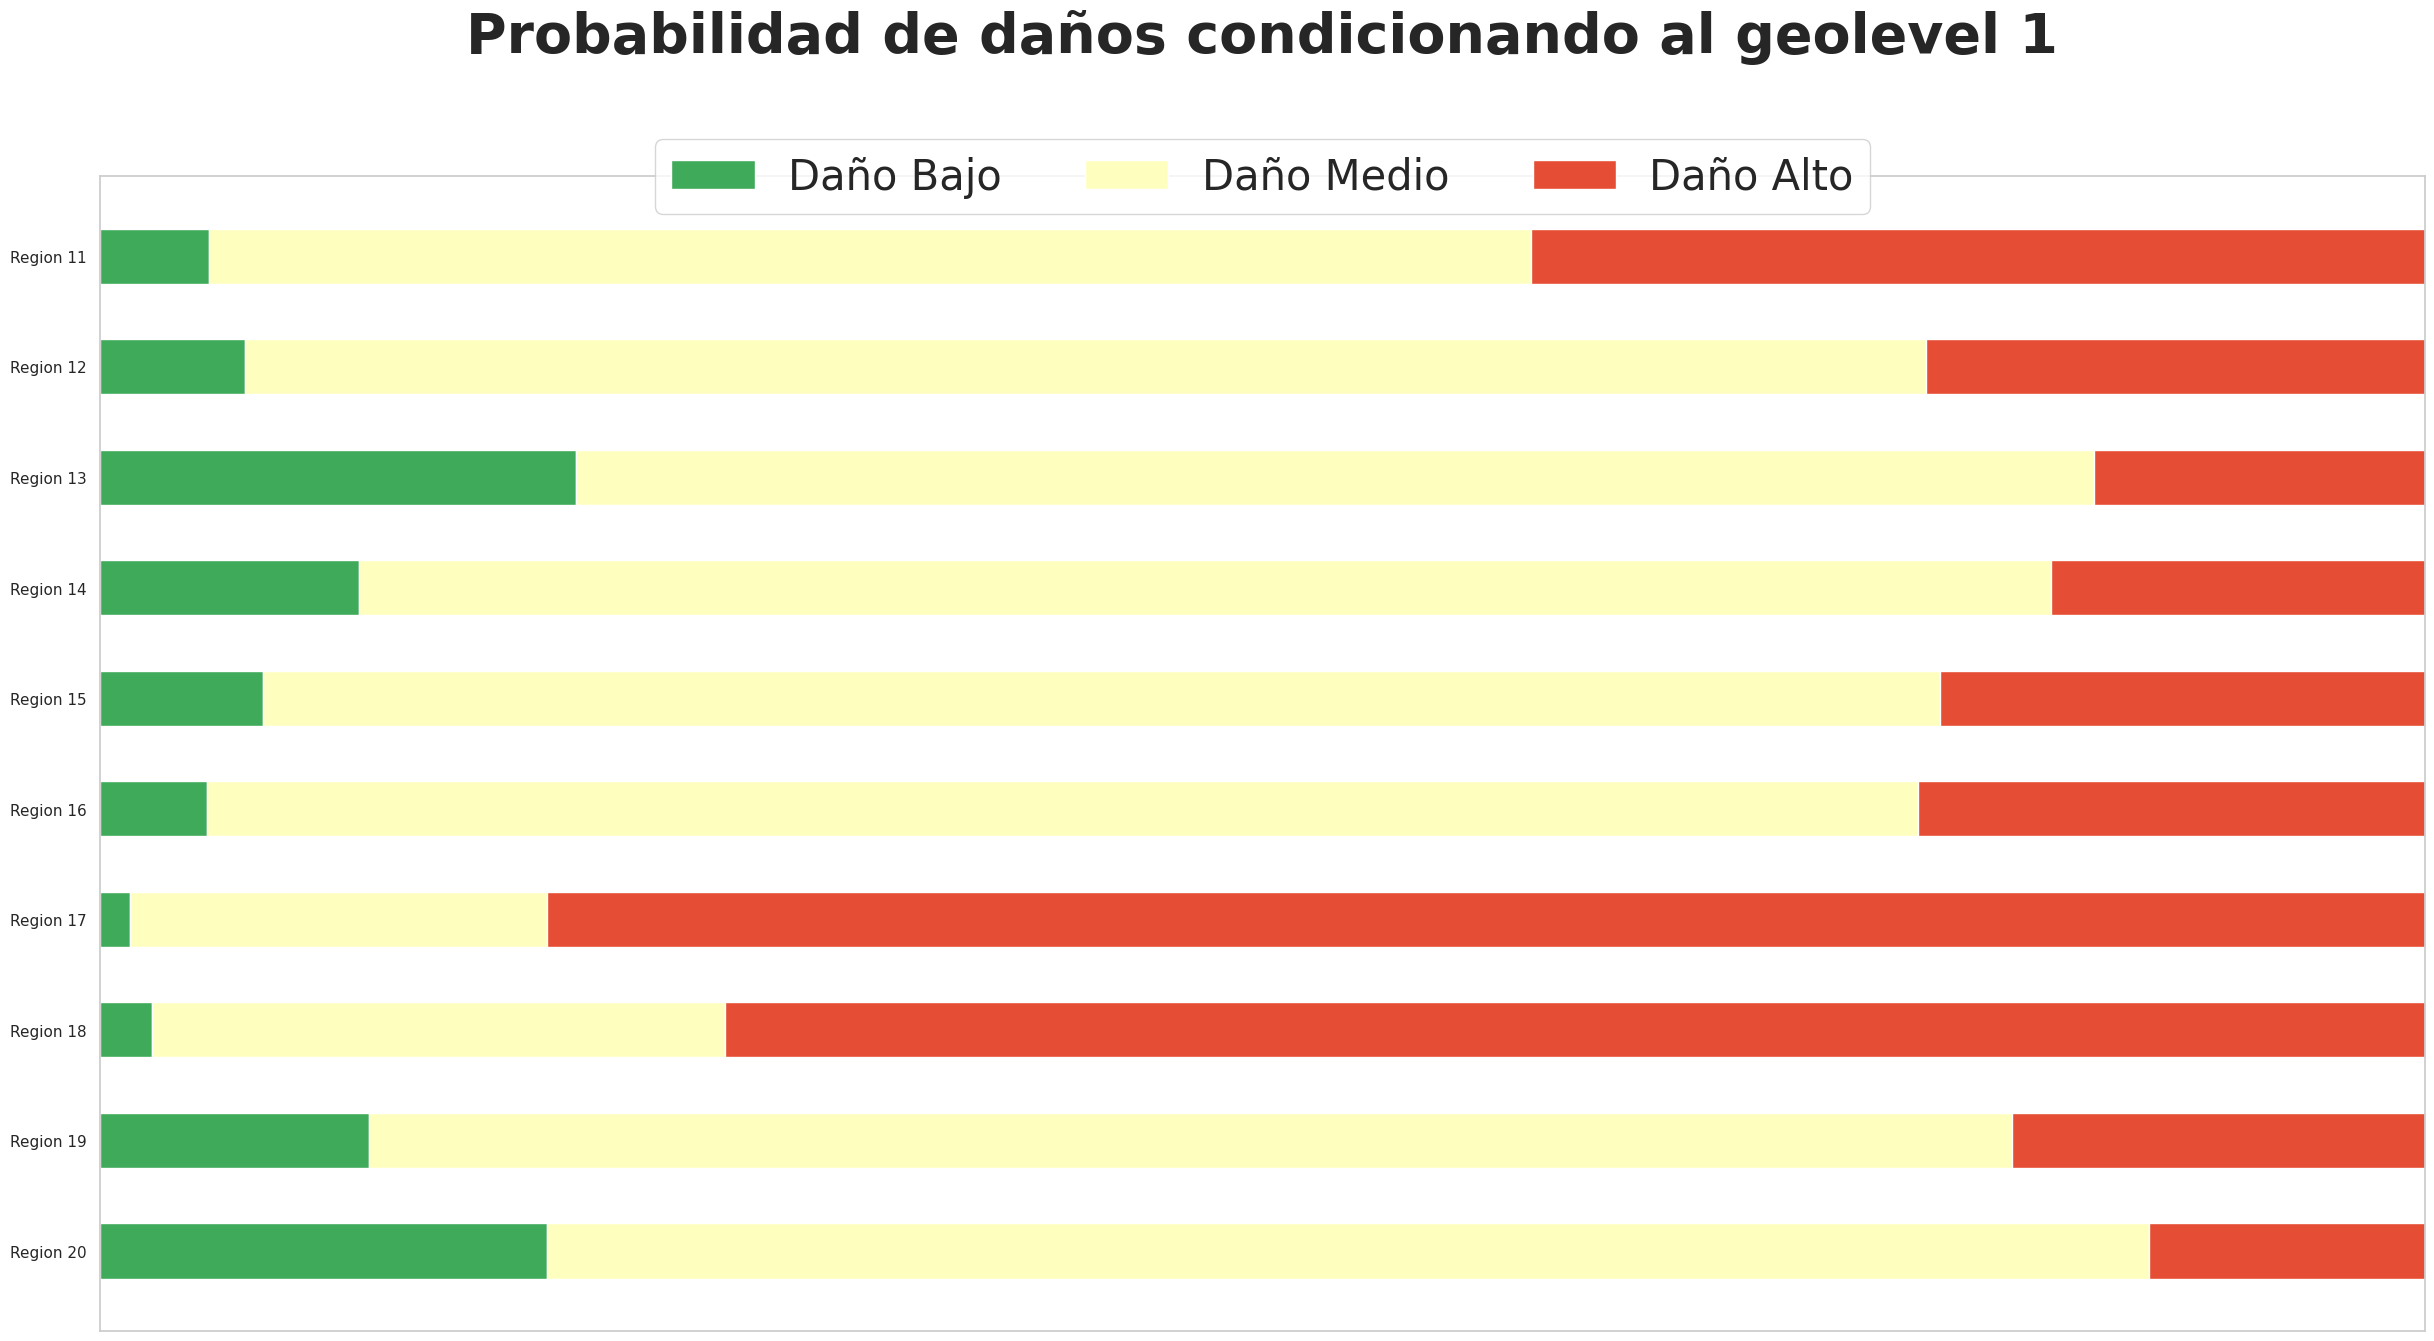

In [ ]:
fig, ax = survey(results, category_names)
ax.set_title("Probabilidad de daños condicionando al geolevel 1", weight= 'bold', y=1.1,fontsize=40)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.05),prop={'size':30},ncol=3)

plt.rc('xtick', labelsize=50) 

In [ ]:
results={}
for i in range (21,31):
    df = data.loc[data['geo_level_1_id'] == i]
    lista_probas = calcular_prob(df)
    results['Region ' + str(i)] = lista_probas

In [ ]:
results['Region 28'] = [0, 0.4075471698113208, 0.5924528301886792]

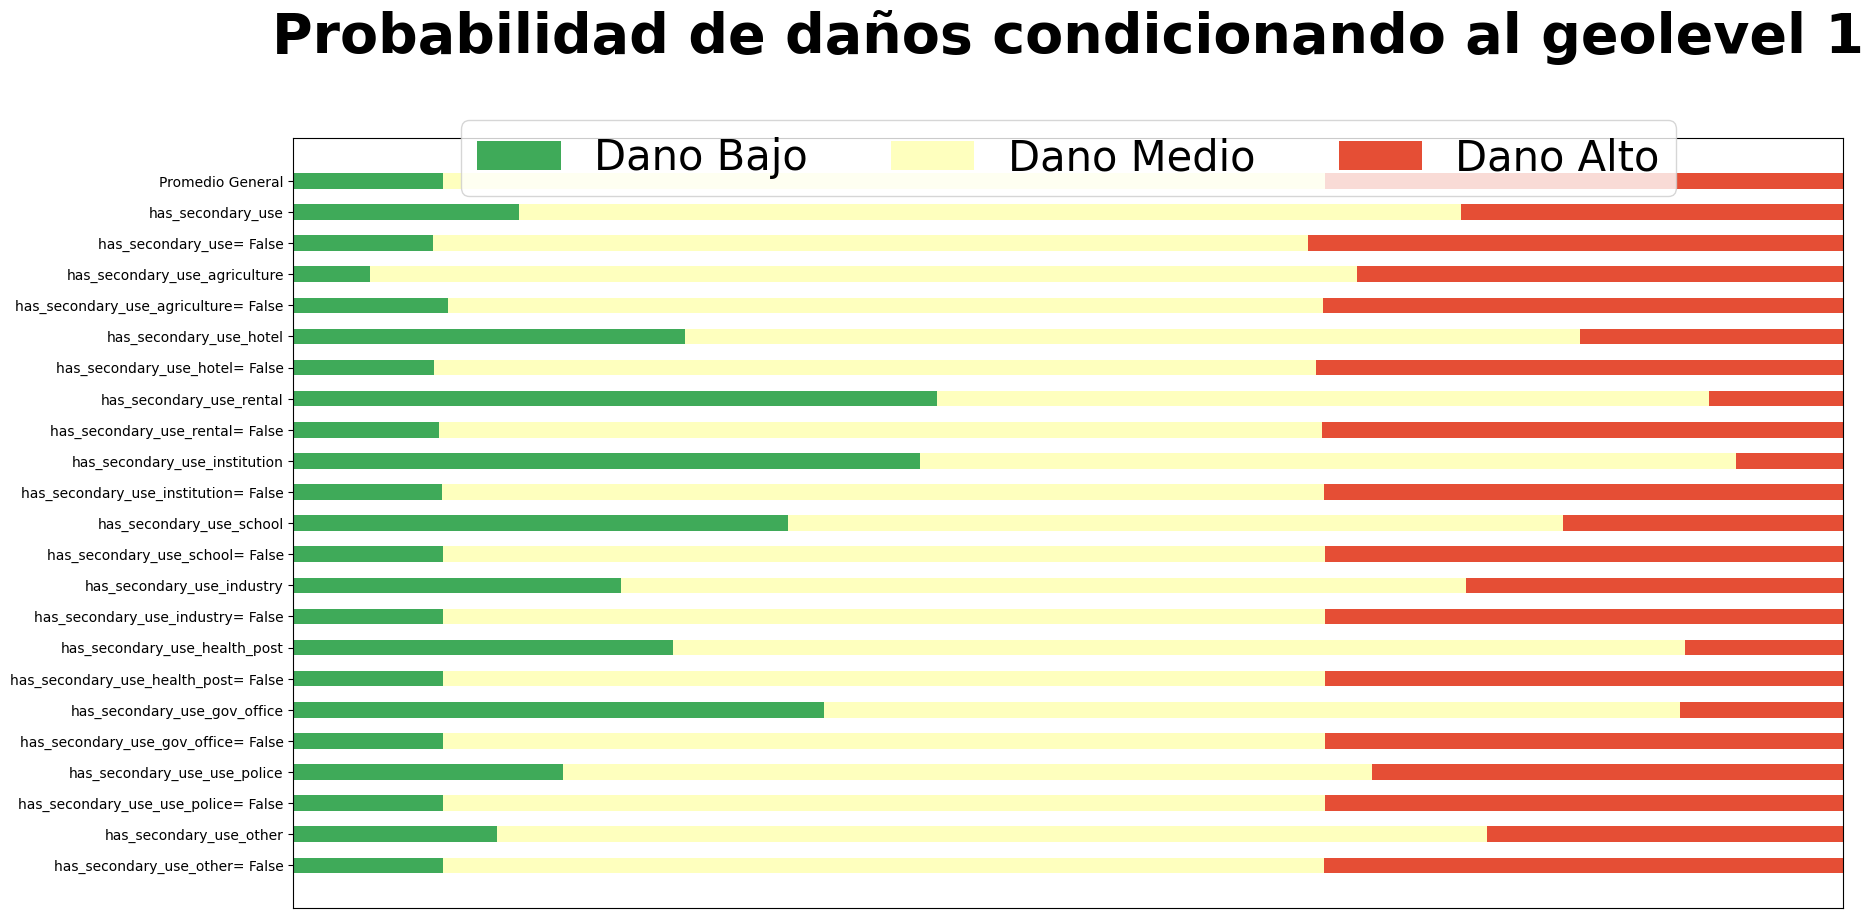

In [ ]:
fig, ax = survey(results, category_names)
ax.set_title("Probabilidad de daños condicionando al geolevel 1", weight= 'bold', y=1.1,fontsize=40)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.05),prop={'size':30},ncol=3)

plt.rc('xtick', labelsize=50) 

# Análisis de las variables binarias

In [ ]:
def calcular_prob(df):
  df = (df.groupby('damage_grade').size()).to_frame()
  df.columns = ['Frecuencia']
  df['Frecuencia'] = df['Frecuencia'] / df['Frecuencia'].sum() 
  return list(df['Frecuencia'])

In [ ]:
data_general = data
data_general = calcular_prob(data)
category_names = ['Dano Bajo', 'Dano Medio','Dano Alto']
results = {
    'Promedio General': data_general
}
#,
    #'Con Adobe Mud': condicionado_adobe_mud,
    #'Sin Adobe Mud': condicionado_sin_adobe_mud,
   # 'Con Mud & Stone': condicionado_has_superstructure_mud_mortar_stone,
  #  'Sin Mud & Stone': condicionado_has_superstructure_mud_mortar_stone_no,
    
#}
for i in range (1,26):
  if type(data[data.columns[i]][0]) == type(data['has_superstructure_adobe_mud'][0]):
    df = data.loc[data[data.columns[i]] == True]
    lista_probas = calcular_prob(df)
    df2 = data.loc[data[data.columns[i]] == False]
    lista_probas2 = calcular_prob(df2)
    results[data.columns[i]] = lista_probas
    results[data.columns[i] + "= False"] = lista_probas2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.axes.Axes.barh
matplotlib.pyplot.barh
matplotlib.axes.Axes.text
matplotlib.pyplot.text
matplotlib.axes.Axes.legend
matplotlib.pyplot.legend

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.85, 0.15, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 10))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
  #      ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax



## Familia de Materiales

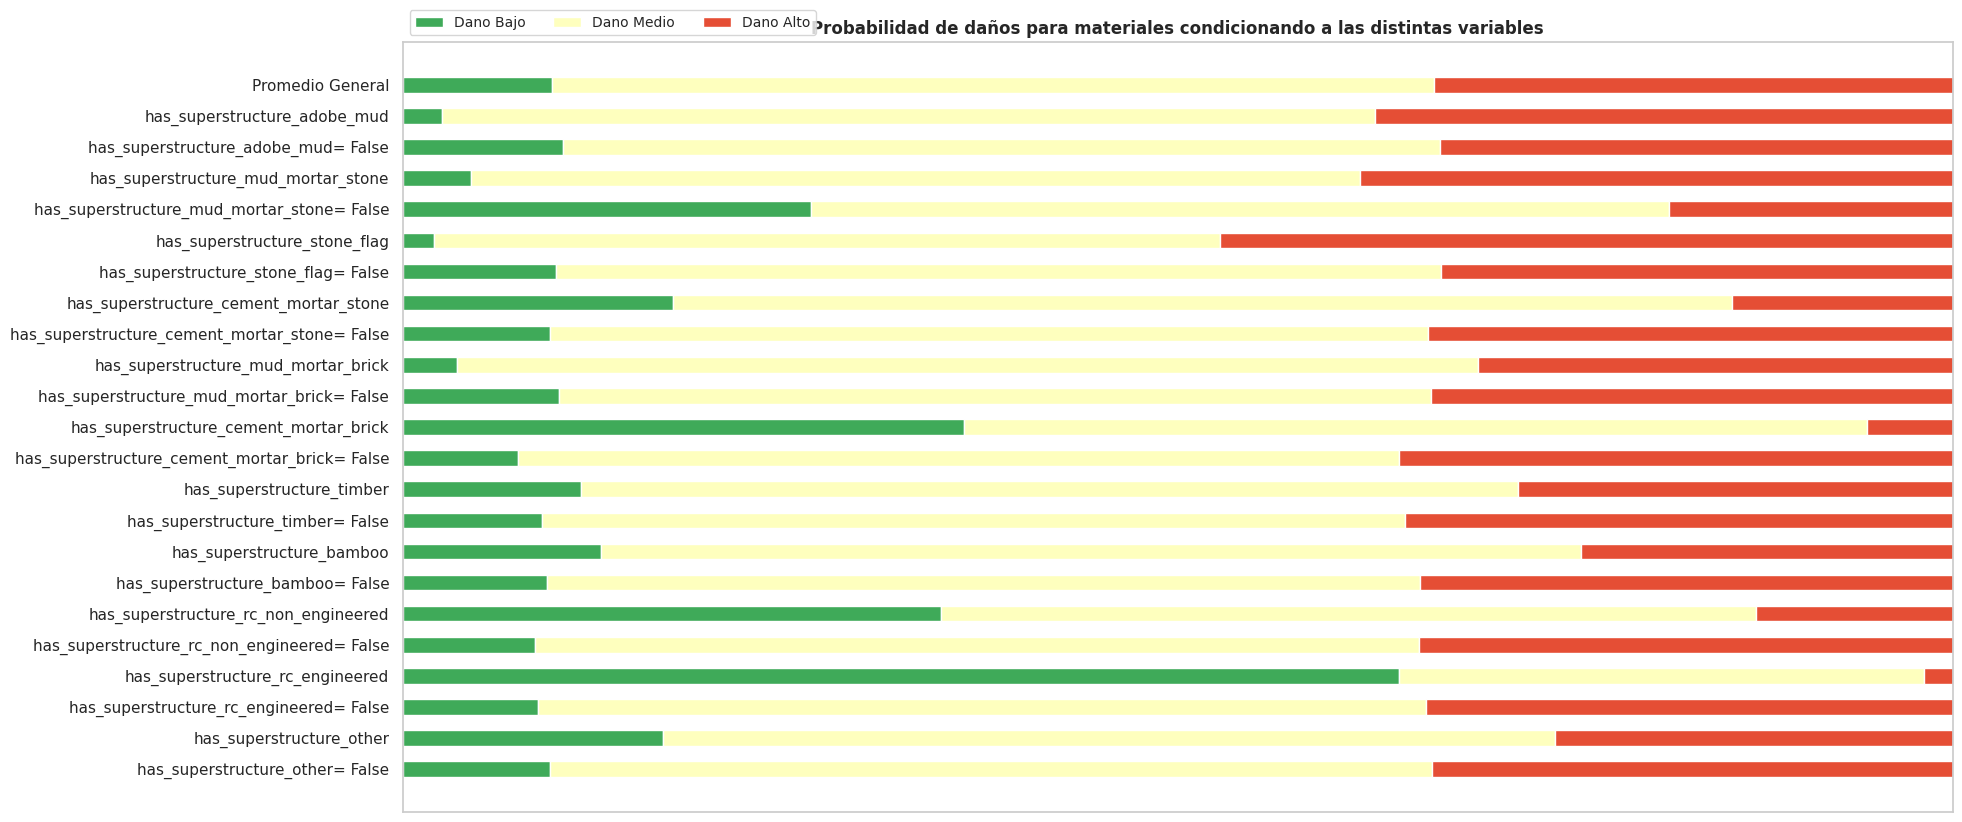

In [ ]:
fig, ax = survey(results, category_names)
ax.set_title("Probabilidad de daños para materiales condicionando a las distintas variables", weight= 'bold')
plt.show()

In [ ]:
categorias_construccion = ['damage_grade', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']
data_nuevo=data
construccion = data.loc[:, categorias_construccion]
construccion[categorias_construccion] = construccion[categorias_construccion].astype(int) ##Transformo bool a int

In [ ]:
tabla_por_uso = construccion.groupby(['damage_grade']).sum().T

In [ ]:
total_casos = []
for i in range(len(tabla_por_uso)):
  total_casos.append(tabla_por_uso.iloc[i].sum())

tabla_por_uso['Total'] = total_casos

In [ ]:
nuevas_col = ['Porcentaje daño 1', 'Porcentaje daño 2', 'Porcentaje daño 3', 'Daño medio']
tabla_por_uso[nuevas_col] = 0
daño_medio = 0;

tabla_por_uso['Porcentaje daño 1']=tabla_por_uso[1]/tabla_por_uso['Total']*100
tabla_por_uso['Porcentaje daño 2']=tabla_por_uso[2]/tabla_por_uso['Total']*100
tabla_por_uso['Porcentaje daño 3']=tabla_por_uso[3]/tabla_por_uso['Total']*100
tabla_por_uso['Daño medio']=(tabla_por_uso[1]+tabla_por_uso[2]*2+tabla_por_uso[3]*3)/tabla_por_uso['Total']

In [ ]:
tabla_por_uso = tabla_por_uso.sort_values(by='Daño medio', ascending=True)
col_rename = {1:'Daño medio 1',2:"Daño medio 2",3:"Daño medio 3"}
tabla_por_uso = tabla_por_uso.rename(columns=col_rename)
tabla_por_uso

damage_grade                            Daño medio 1  ...           Daño medio
has_superstructure_rc_engineered                2656  ...                 1.38
has_superstructure_cement_mortar_brick          7105  ...                 1.69
has_superstructure_rc_non_engineered            3857  ...                 1.78
has_superstructure_cement_mortar_stone           829  ...                 1.97
has_superstructure_other                         656  ...                 2.09
has_superstructure_bamboo                       2839  ...                 2.11
has_superstructure_timber                       7642  ...                 2.17
has_superstructure_mud_mortar_brick              623  ...                 2.27
has_superstructure_mud_mortar_stone             8760  ...                 2.34
has_superstructure_adobe_mud                     594  ...                 2.35
has_superstructure_stone_flag                    182  ...                 2.45

[11 rows x 8 columns]

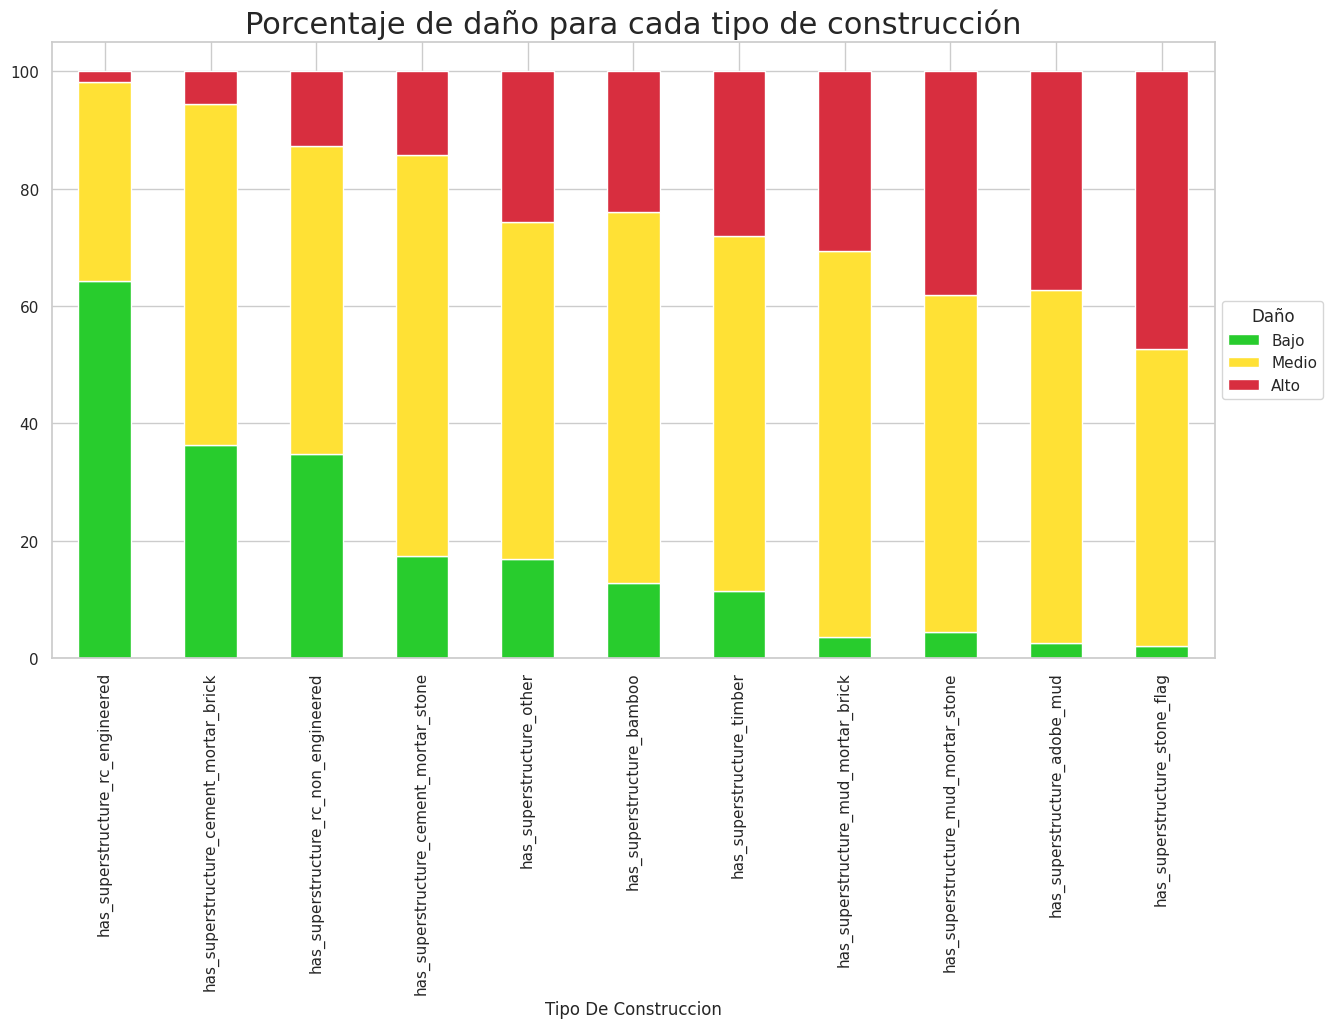

In [ ]:
plot = tabla_por_uso[["Porcentaje daño 1", "Porcentaje daño 2", "Porcentaje daño 3"]].plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'])
plot.set_title("Porcentaje de daño para cada tipo de construcción", size=22)
plot.set_xlabel('Tipo De Construccion')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

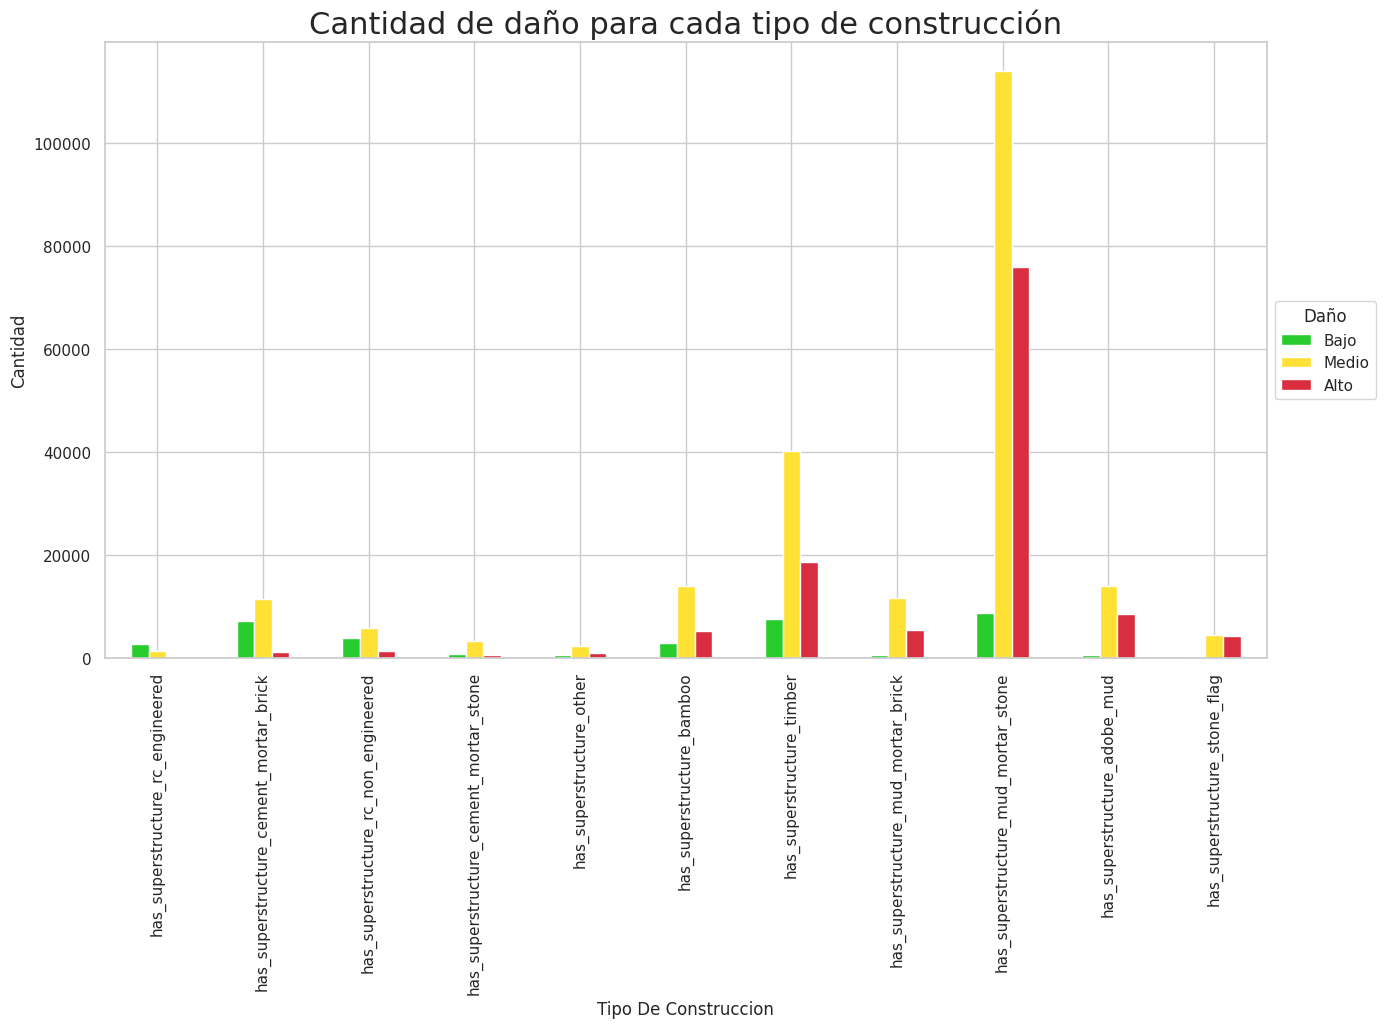

In [ ]:
plot = tabla_por_uso[["Daño medio 1", "Daño medio 2", "Daño medio 3"]].plot(kind='bar', color=['#28CC2D', '#FFE135', '#D82E3F'])
plot.set_title("Cantidad de daño para cada tipo de construcción", size=22)
plot.set_xlabel('Tipo De Construccion')
plot.set_ylabel("Cantidad")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Concluimos:

* Todas las variables son representativas todas
* Los casos de fracaso son: `has_superstructure_timber`, `has_superstructure_mud_mortar_brick`, `has_superstructure_adobe_mud`, `has_superstructure_stone_flag`
* Los casos de éxito son: `has_superstructure_rc_engineered`, `has_superstructure_cement_mortar_brick`, `has_superstructure_rc_non_engineered`

Incialmente, vamos a reducir las columnas en una sola para cada caso, y luego con más análisis veremos si hace falta agregar más.

In [ ]:
useful_data["has_superstructure_success"] = data["has_superstructure_rc_engineered"]\
                                        | data["has_superstructure_cement_mortar_brick"]\
                                        | data["has_superstructure_rc_non_engineered"]


useful_data["has_superstructure_failure"] = data["has_superstructure_timber"]\
                                        | data["has_superstructure_mud_mortar_brick"]\
                                        | data["has_superstructure_adobe_mud"]\
                                        | data["has_superstructure_rc_non_engineered"]

In [ ]:
useful_data.head(1)

building_id  ...  has_superstructure_failure
0       802906  ...                        True

[1 rows x 23 columns]

## Familia de Uso Secundario 

In [ ]:
data_general = data
data_general = calcular_prob(data)
category_names = ['Dano Bajo', 'Dano Medio','Dano Alto']
results = {
    'Promedio General': data_general
}
#,
    #'Con Adobe Mud': condicionado_adobe_mud,
    #'Sin Adobe Mud': condicionado_sin_adobe_mud,
   # 'Con Mud & Stone': condicionado_has_superstructure_mud_mortar_stone,
  #  'Sin Mud & Stone': condicionado_has_superstructure_mud_mortar_stone_no,
    
#}
for i in range (27,39):
  if type(data[data.columns[i]][0]) == type(data['has_superstructure_adobe_mud'][0]):
    df = data.loc[data[data.columns[i]] == True]
    lista_probas = calcular_prob(df)
    df2 = data.loc[data[data.columns[i]] == False]
    lista_probas2 = calcular_prob(df2)
    results[data.columns[i]] = lista_probas
    results[data.columns[i] + "= False"] = lista_probas2


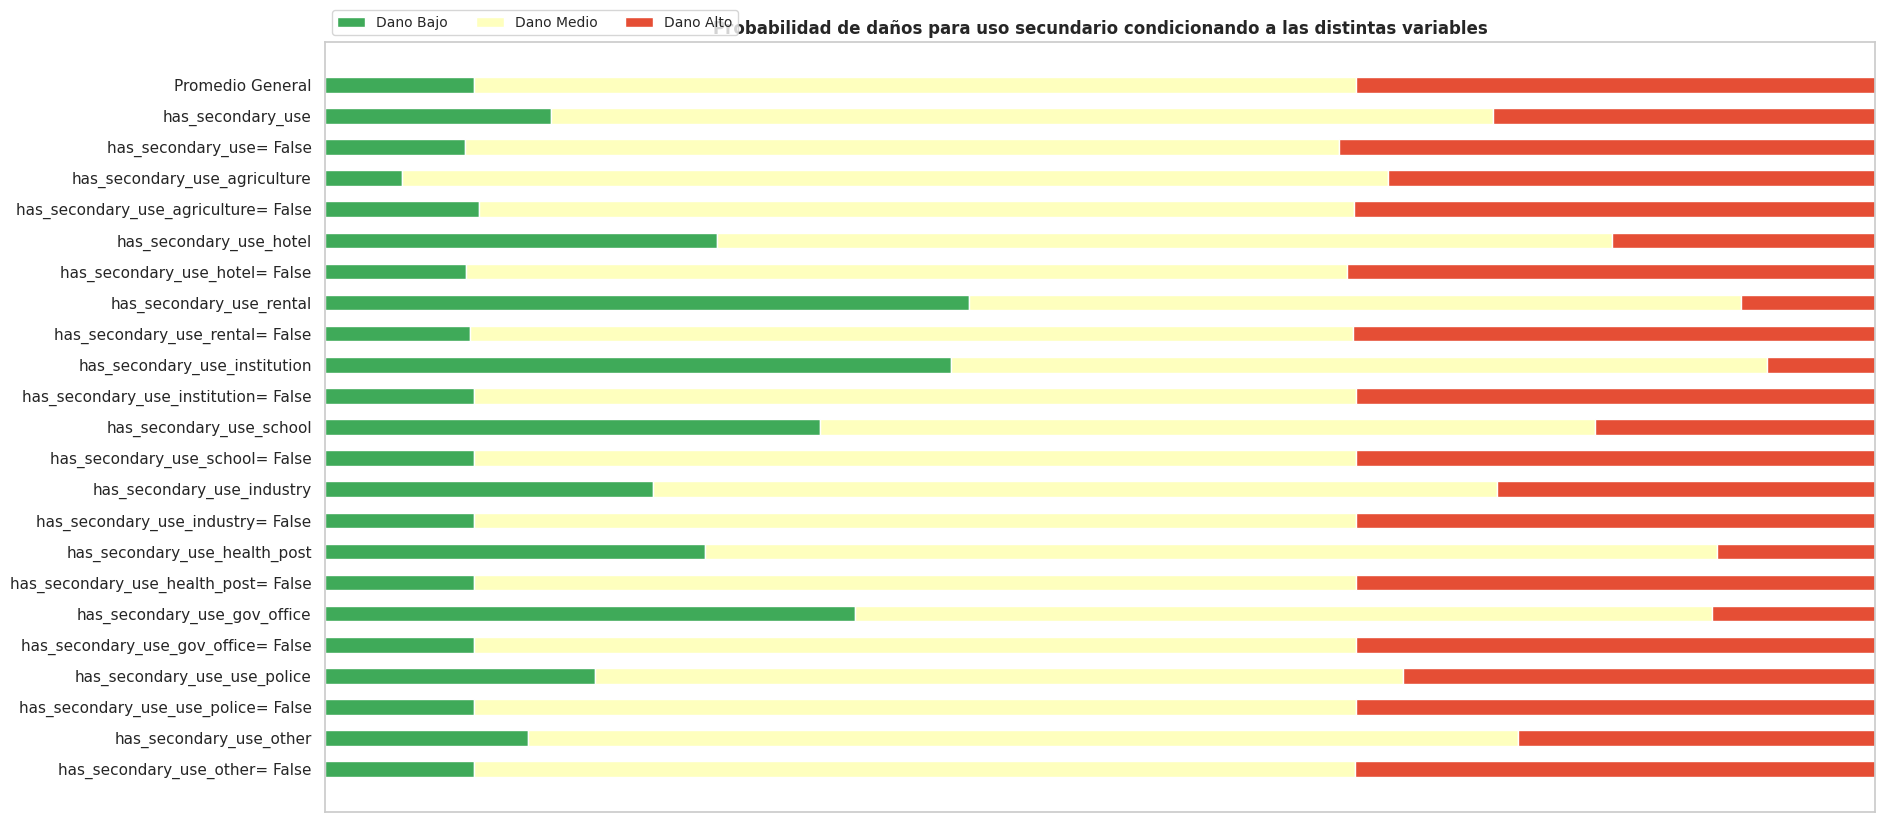

In [ ]:
fig, ax = survey(results, category_names)
ax.set_title("Probabilidad de daños para uso secundario condicionando a las distintas variables", weight= 'bold')
plt.show()

In [ ]:
data['has_secondary_use'].value_counts()

False    231445
True      29156
Name: has_secondary_use, dtype: Int64

In [ ]:
con_uso_secundario = data[data['has_secondary_use'] == True]
sin_uso_secundario = data[data['has_secondary_use'] == False]

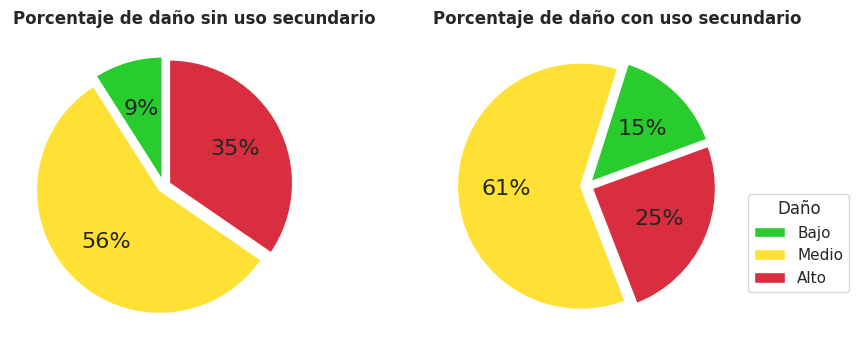

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

names = ['', '', '']

damage_df = sin_uso_secundario.groupby(['damage_grade'])['building_id'].count()
explode = (0.05, 0.05, 0.05)
g1 = damage_df.plot.pie(y='Daño', figsize= (10, 4), fontsize=16 ,autopct='%1.0f%%',labels=names, colors = ['#28CC2D', '#FFE135', '#D82E3F'], explode=explode, ax=axes[0], startangle=90)
g1.set_title('Porcentaje de daño sin uso secundario', size=12, y =1, x=0.6, weight='bold')
g1.set_ylabel("")

damage_df2 = con_uso_secundario.groupby(['damage_grade'])['building_id'].count()
explode = (0.05, 0.05, 0.05)
g2 = damage_df2.plot.pie(y='', figsize= (10, 4), fontsize=16 ,autopct='%1.0f%%',labels=names, colors = ['#28CC2D', '#FFE135', '#D82E3F'], explode=explode, ax=axes[1], startangle=20)
g2.set_title('Porcentaje de daño con uso secundario', size=12, y =1, x=0.6, weight='bold')

plt.legend(loc='best', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

A partir de los graficos podemos observar que en las edificaciones que tienen algun tipo de uso secundario el porcentaje de daño mayor es 10% menor que en las que no tiene uso secundario.

In [ ]:
categorias_uso_secundario = ['damage_grade', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']
data_nuevo=data
con_uso_secundario = data.loc[:, categorias_uso_secundario]
con_uso_secundario[categorias_uso_secundario] = con_uso_secundario[categorias_uso_secundario].astype(int) ##Transformo bool a inr
col_rename = {'has_secondary_use_agriculture':'agriculture','has_secondary_use_hotel':'hotel', 'has_secondary_use_rental':'rental', 'has_secondary_use_institution':'institution' , 'has_secondary_use_school':'school', 'has_secondary_use_industry':'industry', 'has_secondary_use_health_post':'health_post', 'has_secondary_use_gov_office':'gov_office', 'has_secondary_use_use_police':'use_police','damage_grade':'use', 'has_secondary_use_other': 'other'}
con_uso_secundario = con_uso_secundario.rename(columns=col_rename)

In [ ]:
indice = ['agriculture', 'hotel', 'rental', 'institution', 'school', 'industry', 'health_post', 'gov_office', 'use_police', 'other']
tabla_por_uso = con_uso_secundario.groupby(['use']).sum().T

In [ ]:
total_casos = []
for i in range(len(tabla_por_uso)):
  total_casos.append(tabla_por_uso.iloc[i].sum())

tabla_por_uso['Total'] = total_casos

In [ ]:
nuevas_col = ['Porcentaje daño 1', 'Porcentaje daño 2', 'Porcentaje daño 3', 'Daño medio']
tabla_por_uso[nuevas_col] = 0
daño_medio = 0;

tabla_por_uso['Porcentaje daño 1']=tabla_por_uso[1]/tabla_por_uso['Total']*100
tabla_por_uso['Porcentaje daño 2']=tabla_por_uso[2]/tabla_por_uso['Total']*100
tabla_por_uso['Porcentaje daño 3']=tabla_por_uso[3]/tabla_por_uso['Total']*100
tabla_por_uso['Daño medio']=(tabla_por_uso[1]+tabla_por_uso[2]*2+tabla_por_uso[3]*3)/tabla_por_uso['Total']

In [ ]:
tabla_por_uso = tabla_por_uso.sort_values(by='Daño medio', ascending=True)
col_rename = {1:'Daño medio 1',2:"Daño medio 2",3:"Daño medio 3"}
tabla_por_uso = tabla_por_uso.rename(columns=col_rename)
tabla_por_uso

use          Daño medio 1  ...           Daño medio
institution            99  ...                 1.67
rental                877  ...                 1.67
gov_office             13  ...                 1.76
health_post            12  ...                 1.86
school                 30  ...                 1.86
hotel                2216  ...                 1.92
industry               59  ...                 2.03
other                 175  ...                 2.10
use_police              4  ...                 2.13
agriculture           829  ...                 2.26

[10 rows x 8 columns]

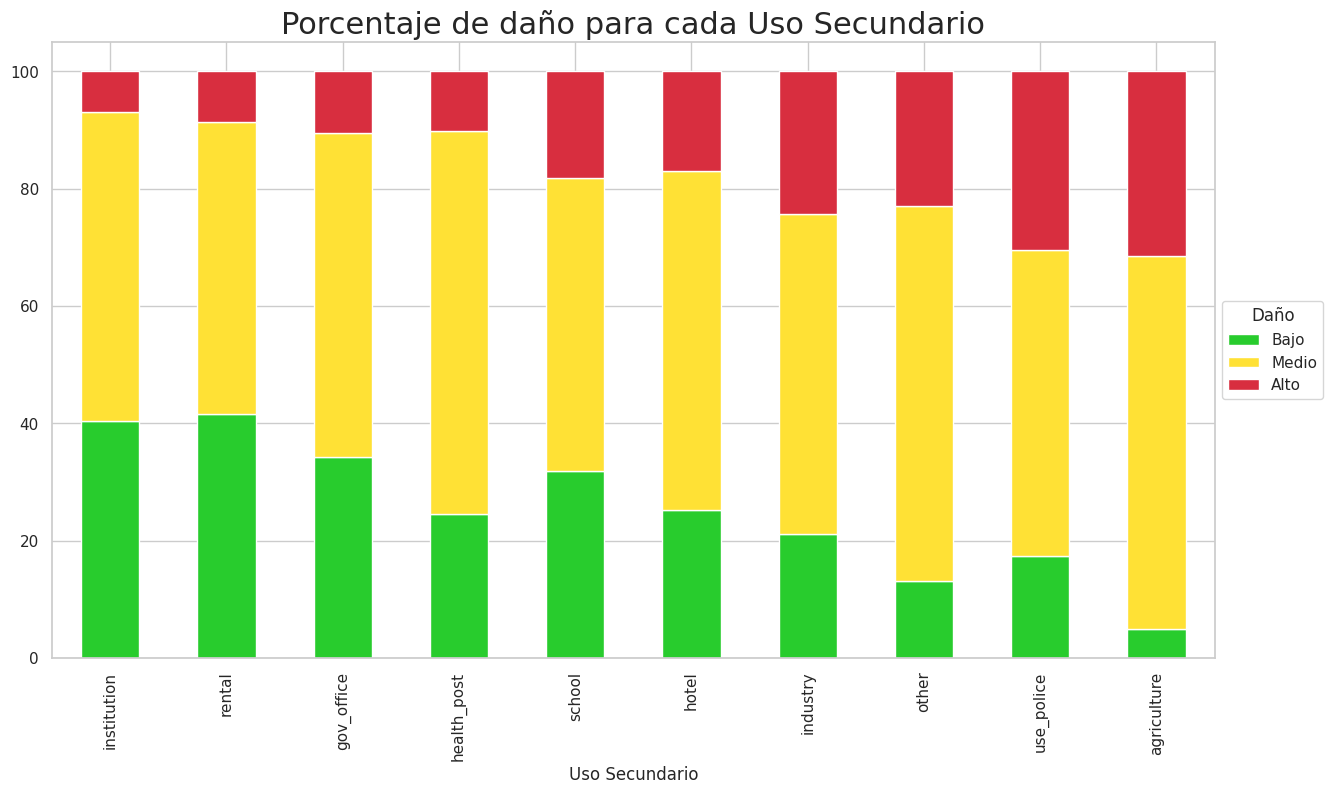

In [ ]:
plot = tabla_por_uso[["Porcentaje daño 1", "Porcentaje daño 2", "Porcentaje daño 3"]].plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135', '#D82E3F'])
plot.set_title("Porcentaje de daño para cada Uso Secundario", size=22)
plot.set_xlabel("Uso Secundario")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

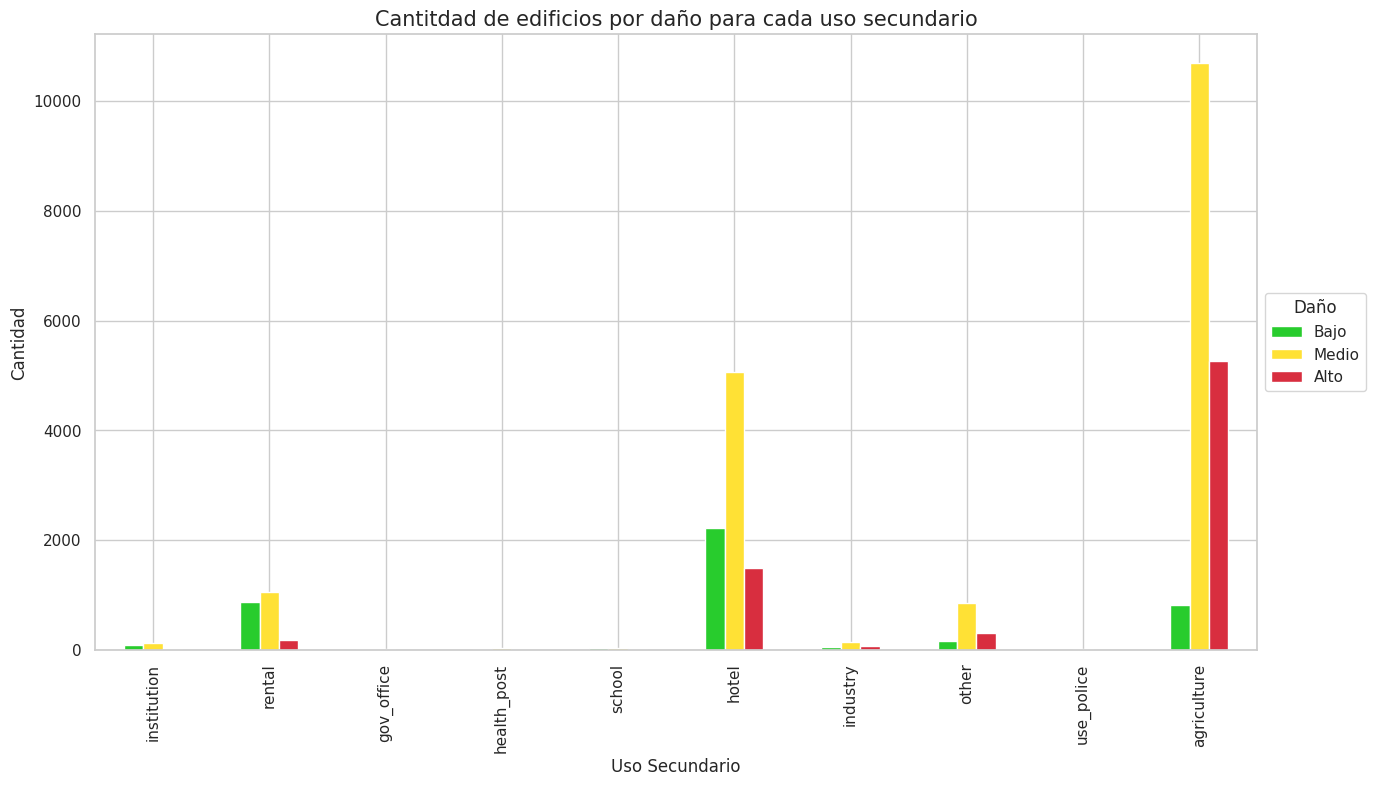

In [ ]:

plot = tabla_por_uso[["Daño medio 1", "Daño medio 2", "Daño medio 3"]].plot(kind='bar', color=['#28CC2D', '#FFE135', '#D82E3F'])
plot.set_title("Cantitdad de edificios por daño para cada uso secundario", size=15)
plot.set_xlabel("Uso Secundario")
plot.set_ylabel("Cantidad")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),title="Daño",labels=["Bajo", "Medio", "Alto"])

Concluimos:

* Las variables relativas son: `has_secondary_use_agriculture`, `has_secondary_use_hotel`, `has_secondary_use_rental`, `has_secondary_use_other`
* Los casos de fracaso son: `has_secondary_use_agriculture`
* Los casos de éxito son: `has_secondary_use_hotel`, `has_secondary_use_rental`

In [ ]:
useful_data["has_secondary_use_success"] = data["has_secondary_use_hotel"] | data["has_secondary_use_rental"]
useful_data["hash_secondary_use_failure"] = data["has_secondary_use_agriculture"]

In [ ]:
useful_data.head(1)

building_id  ...  hash_secondary_use_failure
0       802906  ...                       False

[1 rows x 25 columns]

# Análisis de preguntas planteadas

## Diferencias entre los casos de éxitos y fracaso según su ubicación

In [ ]:
region_17 = data.loc[(data['geo_level_1_id'] == 17)]
region_17.head()

building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
10         7962              17  ...                    False             3
11       452227              17  ...                    False             2
13       287845              17  ...                    False             3
37       252816              17  ...                    False             3
42       833827              17  ...                    False             3

[5 rows x 40 columns]

In [ ]:
region_26 = data.loc[(data['geo_level_1_id'] == 26)]
region_26

building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
9            989500              26  ...                    False             1
18           354011              26  ...                    False             2
47           362494              26  ...                    False             2
49           402996              26  ...                    False             1
64           415067              26  ...                    False             2
...             ...             ...  ...                      ...           ...
260520       353176              26  ...                    False             1
260535       457938              26  ...                    False             2
260554       938294              26  ...                    False             2
260559       235800              26  ...                    False             3
260599       151409              26  ...                    False             2

[22615 rows x 40 columns]

In [ ]:
max = 0
key_max = 0

for region in results.keys():
  aux = results.get(region)[1]
  if aux > max and region != 'Region 29':     #Sacamos la 29 por tener pocos datos
    max = aux
    key_max = region

print(key_max)

has_secondary_use_health_post


In [ ]:
region_30 = data.loc[(data['geo_level_1_id'] == 30)]
region_30

building_id  geo_level_1_id  ...  has_secondary_use_other  damage_grade
57           552720              30  ...                    False             2
168          445215              30  ...                    False             3
171          304846              30  ...                    False             2
183          358013              30  ...                    False             1
191          959512              30  ...                    False             2
...             ...             ...  ...                      ...           ...
260382       272881              30  ...                    False             2
260481       602638              30  ...                    False             2
260556       233884              30  ...                    False             2
260570       173320              30  ...                    False             2
260584       317439              30  ...                    False             3

[2686 rows x 40 columns]

Busco cantidad de pisos promedio, edad promedio, area promedio y cantidad de edificios que tienen uso secundario

In [ ]:
labels = ['has_secondary_use', 'has_superstructure_mud_mortar_stone', 'has_superstructure_mud_mortar_brick',\
          'has_superstructure_rc_engineered', 'has_superstructure_adobe_mud', 'has_superstructure_stone_flag',\
          'has_superstructure_cement_mortar_stone', 'has_superstructure_timber', 'has_superstructure_cement_mortar_brick', \
          'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_other','has_secondary_use_agriculture',\
          'ground_floor_type == x', 'ground_floor_type == v', 'ground_floor_type == f', 'plan_configuration == d', 'foundation_type == w']

valores_reg_17 = [region_17['has_secondary_use'].mean(),
                  region_17['has_superstructure_mud_mortar_stone'].mean(),
                  region_17['has_superstructure_mud_mortar_brick'].mean(),
                  region_17['has_superstructure_rc_engineered'].mean(), 
                  region_17['has_superstructure_adobe_mud'].mean(), 
                  region_17['has_superstructure_stone_flag'].mean(), 
                  region_17['has_superstructure_cement_mortar_stone'].mean(), 
                  region_17['has_superstructure_timber'].mean(), 
                  region_17['has_superstructure_cement_mortar_brick'].mean(), 
                  region_17['has_superstructure_bamboo'].mean(), 
                  region_17['has_superstructure_rc_non_engineered'].mean(), 
                  region_17['has_superstructure_other'].mean(), 
                  region_17['has_secondary_use_agriculture'].mean(), 
                  region_17[region_17['ground_floor_type'] == 'x']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'v']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'f']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['plan_configuration'] == 'd']['plan_configuration'].count() / region_17['plan_configuration'].count(), 
                  region_17[region_17['foundation_type'] == 'w']['foundation_type'].count() / region_17['foundation_type'].count()]

valores_reg_26 = [region_26['has_secondary_use'].mean(),
                  region_26['has_superstructure_mud_mortar_stone'].mean(),
                  region_26['has_superstructure_mud_mortar_brick'].mean(),
                  region_26['has_superstructure_rc_engineered'].mean(), 
                  region_26['has_superstructure_adobe_mud'].mean(), 
                  region_26['has_superstructure_stone_flag'].mean(), 
                  region_26['has_superstructure_cement_mortar_stone'].mean(), 
                  region_26['has_superstructure_timber'].mean(), 
                  region_26['has_superstructure_cement_mortar_brick'].mean(), 
                  region_26['has_superstructure_bamboo'].mean(), 
                  region_26['has_superstructure_rc_non_engineered'].mean(), 
                  region_26['has_superstructure_other'].mean(), 
                  region_26['has_secondary_use_agriculture'].mean(),
                  region_26[region_26['ground_floor_type'] == 'x']['ground_floor_type'].count() / region_26['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'v']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'f']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['plan_configuration'] == 'd']['plan_configuration'].count() / region_17['plan_configuration'].count(), 
                  region_17[region_17['foundation_type'] == 'w']['foundation_type'].count() / region_17['foundation_type'].count()]

valores_reg_30 = [region_30['has_secondary_use'].mean(),
                  region_30['has_superstructure_mud_mortar_stone'].mean(),
                  region_30['has_superstructure_mud_mortar_brick'].mean(),
                  region_30['has_superstructure_rc_engineered'].mean(), 
                  region_30['has_superstructure_adobe_mud'].mean(), 
                  region_30['has_superstructure_stone_flag'].mean(), 
                  region_30['has_superstructure_cement_mortar_stone'].mean(), 
                  region_30['has_superstructure_timber'].mean(), 
                  region_30['has_superstructure_cement_mortar_brick'].mean(), 
                  region_30['has_superstructure_bamboo'].mean(), 
                  region_30['has_superstructure_rc_non_engineered'].mean(), 
                  region_30['has_superstructure_other'].mean(), 
                  region_30['has_secondary_use_agriculture'].mean(),
                  region_30[region_30['ground_floor_type'] == 'x']['ground_floor_type'].count() / region_30['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'v']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['ground_floor_type'] == 'f']['ground_floor_type'].count() / region_17['ground_floor_type'].count(), 
                  region_17[region_17['plan_configuration'] == 'd']['plan_configuration'].count() / region_17['plan_configuration'].count(), 
                  region_17[region_17['foundation_type'] == 'w']['foundation_type'].count() / region_17['foundation_type'].count()]

In [ ]:
data_regiones = pd.DataFrame({'labels':labels, 'data_reg_17':valores_reg_17, 'data_reg_26': valores_reg_26, 'data_reg_30': valores_reg_30})
data_regiones = data_regiones.sort_values(by='data_reg_17')
data_regiones

labels  ...          data_reg_30
11                has_superstructure_other  ...                 0.01
17                    foundation_type == w  ...                 0.00
3         has_superstructure_rc_engineered  ...                 0.01
2      has_superstructure_mud_mortar_brick  ...                 0.00
6   has_superstructure_cement_mortar_stone  ...                 0.02
10    has_superstructure_rc_non_engineered  ...                 0.03
4             has_superstructure_adobe_mud  ...                 0.02
8   has_superstructure_cement_mortar_brick  ...                 0.06
9                has_superstructure_bamboo  ...                 0.03
14                  ground_floor_type == v  ...                 0.05
5            has_superstructure_stone_flag  ...                 0.00
12           has_secondary_use_agriculture  ...                 0.26
13                  ground_floor_type == x  ...                 0.10
0                        has_secondary_use  ...                 0.30
7                has_superstructure_timber  ...                 0.16
15                  ground_floor_type == f  ...                 0.86
1      has_superstructure_mud_mortar_stone  ...                 0.90
16                 plan_configuration == d  ...                 0.96

[18 rows x 4 columns]

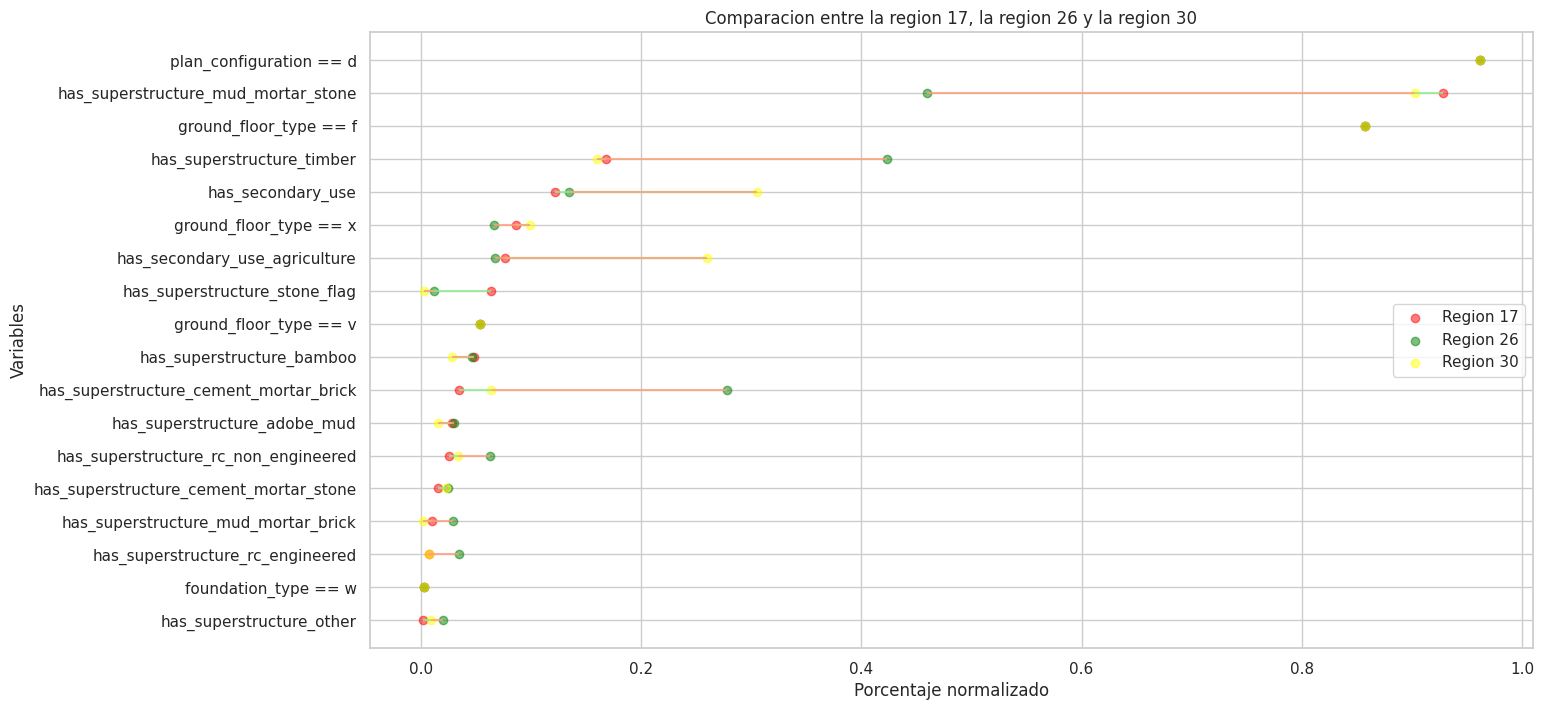

In [ ]:
my_range=range(1,len(data_regiones.index)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=data_regiones['data_reg_17'] ,xmax=data_regiones['data_reg_30'], color='lightgreen', alpha=0.8)
plt.hlines(y=my_range, xmin=data_regiones['data_reg_30'] ,xmax=data_regiones['data_reg_26'], color='lightsalmon', alpha=0.8)

plt.scatter(data_regiones['data_reg_17'], my_range, color='red', alpha=0.5, label='Region 17')
plt.scatter(data_regiones['data_reg_26'], my_range, color='green', alpha=0.5 , label='Region 26')
plt.scatter(data_regiones['data_reg_30'], my_range, color='yellow', alpha=0.5, label='Region 30')

plt.legend(loc='center right')
 
# Add title and axis names
plt.yticks(my_range, data_regiones['labels'])
plt.title("Comparacion entre la region 17, la region 26 y la region 30", loc='center')
plt.xlabel('Porcentaje normalizado')
plt.ylabel('Variables')

# Show the graph
plt.show()



El presente gráfico nos permite comparar la distribución de variables binarias con respecto a la región en la que están: la 26 (verde) es la región con mayor porcentaje de edificios con daño menor; la 17 (rojo), con daño mayor; y la 30(amarillo) con daño medio. En rigor de verdad, la 29 tiene mayor porcentaje de daño medio. Sin embargo, la descartamos para este análisis al no ser tan significativa en cuanto a la cantidad de datos.
 
La categoría en la que se observa mayor diferencia entre las regiones es la estructura de barro y piedra. Es previsible que la zona con mayor daño, tenga mayor cantidad de edificios en esta categoría. En contraposición, para la zona 26 hay una mucho mayor proporción de estructuras construidas con cemento y ladrillos.
 
 
Es interesante observar también que no siempre la región 30 está entre medio de las otras dos, como podría esperarse para variables que son significativas. Particularmente la zona 30 tiene una gran cantidad de espacios de agricultura (y por lo tanto mayor cantidad de espacios con uso secundario), en comparación con las otras.
 
 
Al haber muy pocos datos que cumplan las condiciones para las ultimas filas del gráfico, los puntos suelen estar muy cerca.


## Análisis de los casos de éxito para los edificios más altos

Queremos descomponer los casos de éxito para los edificios más altos, ya que por hipótesis entendemos que la altura tendría que influir negativamente, por lo tanto puede haber otro factor que condicione la conclusión del apartado de la altura.

Comenzaremos estudiando cómo se relacionan los casos exitosos de la altura con la variable `foundation_type`

In [ ]:
def plot_comparaciones(columna_a_evaluar, columna_a_comparar,nombre_evaluar,nombre_comparar):
  fig = plt.figure(figsize=(20, 17))
  gs = GridSpec(nrows=2, ncols=2)

  ax0 = fig.add_subplot(gs[0, :])
  plot1 = pd.crosstab(index=useful_data[columna_a_evaluar],
            columns=useful_data[columna_a_comparar]).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar', stacked=True, color=['#D82E3F', '#28CC2D'], ax=ax0,rot=0)
  plot1.set_xlabel(nombre_evaluar)
  plot1.set_title("Porcentaje de casos de True y False de "+nombre_comparar)
  plot1.legend(loc='lower left', bbox_to_anchor=(0, 1.02,1,0.2),title=nombre_comparar,labels=["Fracaso", "Exito"],ncol=3)

  d = useful_data[useful_data[columna_a_evaluar] > useful_data[columna_a_evaluar].mean()]
  
  ax1 = fig.add_subplot(gs[1, 0])
  plot2 = pd.crosstab(index=d[columna_a_comparar],
            columns=d["damage_grade"])\
            .apply(lambda r: r/r.sum() *100, axis=1)\
            .plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135','#D82E3F'], ax=ax1,rot=0)
  plot2.set_title("Porcentaje por Daño para los mayores a la media")
  plot2.set_xlabel(nombre_comparar)
  plot2.legend(loc='lower center',title="Daño",labels=["Bajo", "Medio", "Alto"])
  
  ax2 = fig.add_subplot(gs[1, 1])
  plot3 = pd.crosstab(index=useful_data[columna_a_comparar],
            columns=useful_data["damage_grade"])\
            .apply(lambda r: r/r.sum() *100, axis=1)\
            .plot(kind='bar', stacked=True, color=['#28CC2D', '#FFE135','#D82E3F'], ax=ax2,rot=0)
  plot3.set_title("Porcentaje por Daño para toda la columna")
  plot3.set_xlabel(nombre_comparar)
  plot3.legend(loc='lower center',title="Daño",labels=["Bajo", "Medio", "Alto"])
  
  plt.suptitle("Análisis Del Efecto "+nombre_evaluar+" sobre daño comparado con "+nombre_comparar)

### `foundation_type`

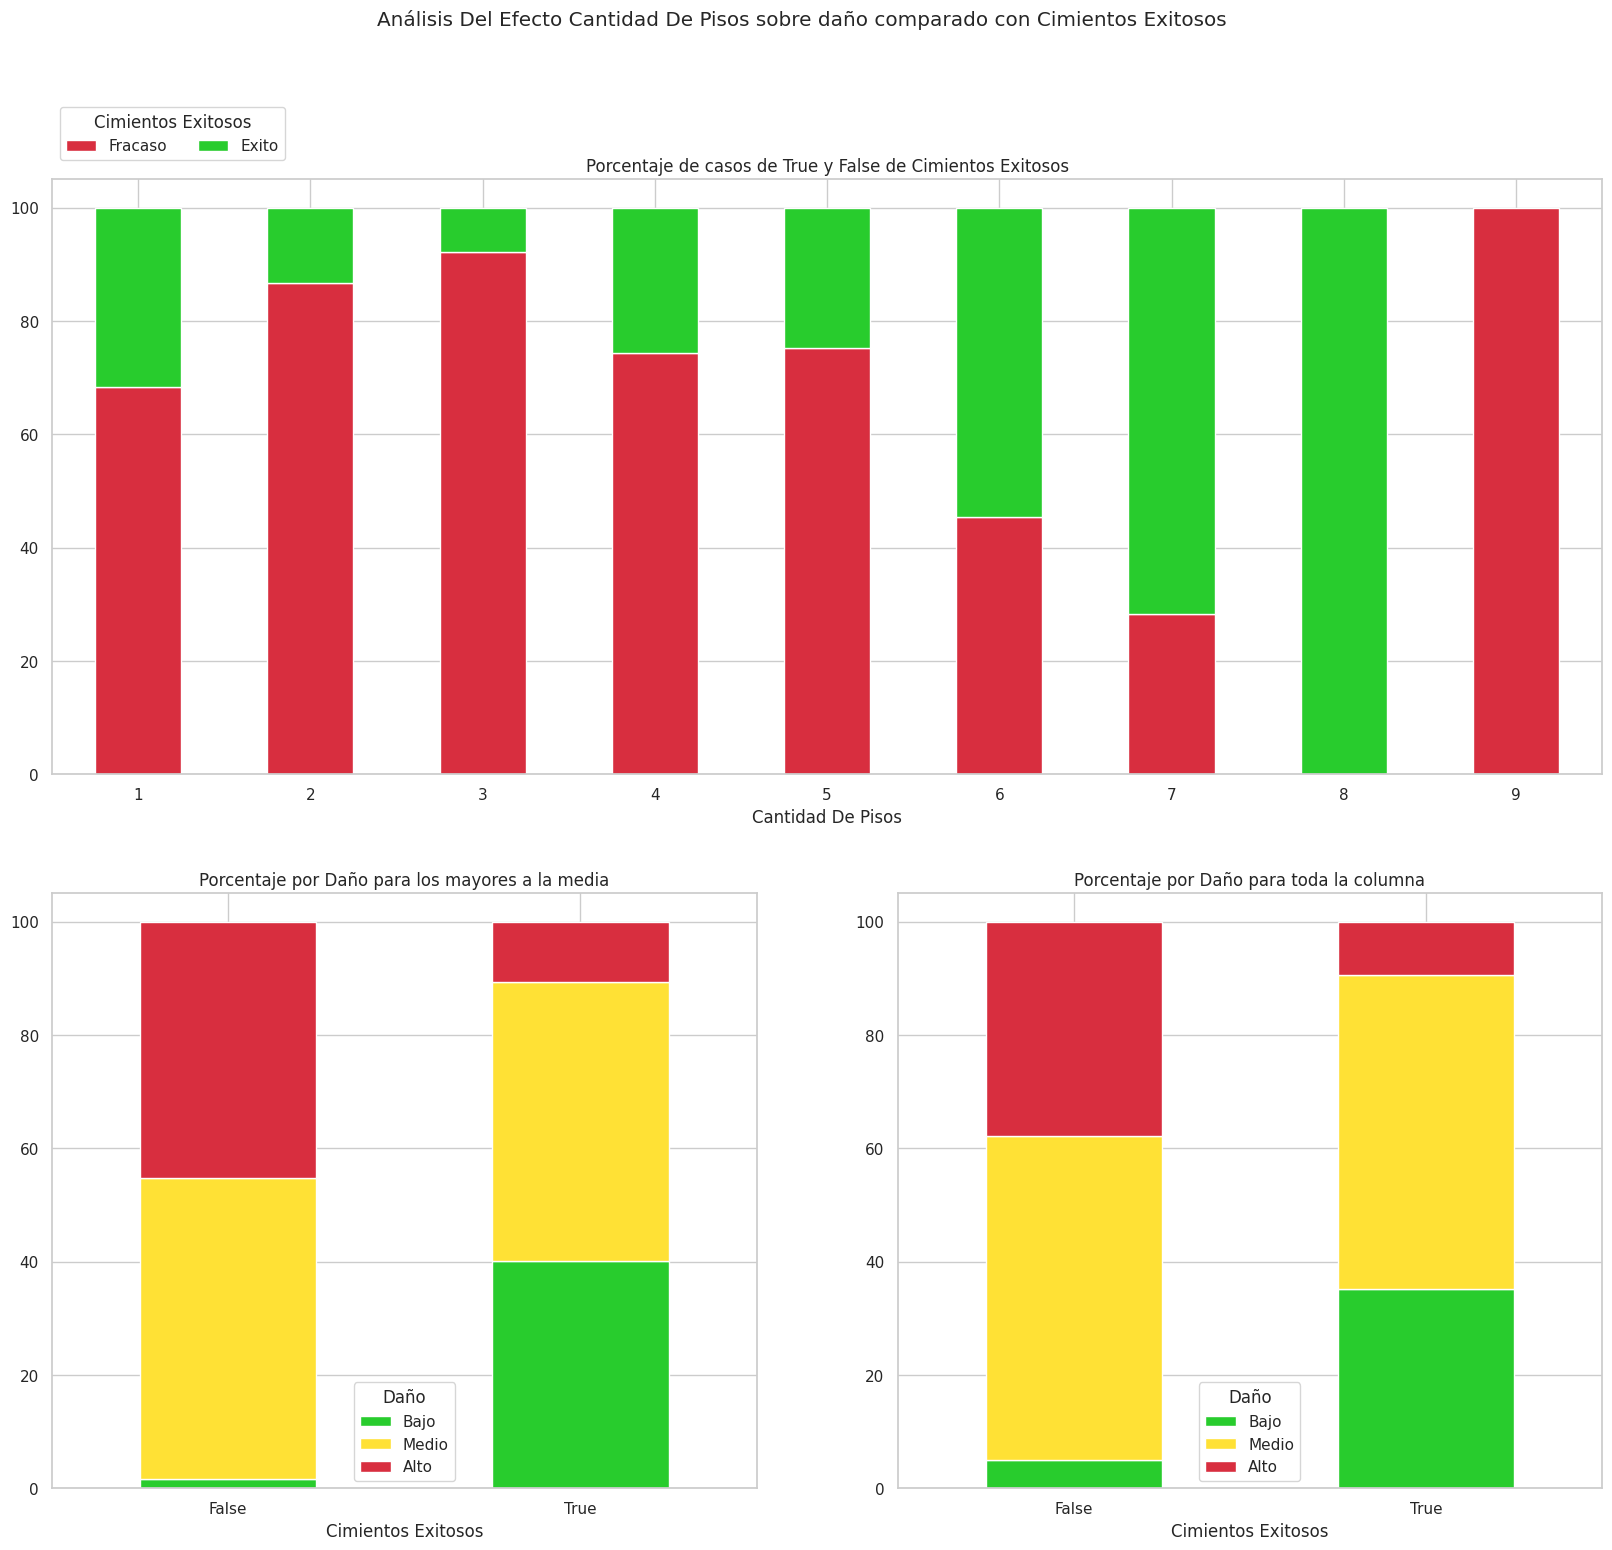

In [ ]:
plot_comparaciones("count_floors_pre_eq", "foundation_type_success","Cantidad De Pisos","Cimientos Exitosos")

Apreciamos una relación fuerte entre los casos de éxito de la altura y `foundation_type`, por lo tanto seguiremos analizando para más variables si pasa lo mismo.

### `has_superstructure`

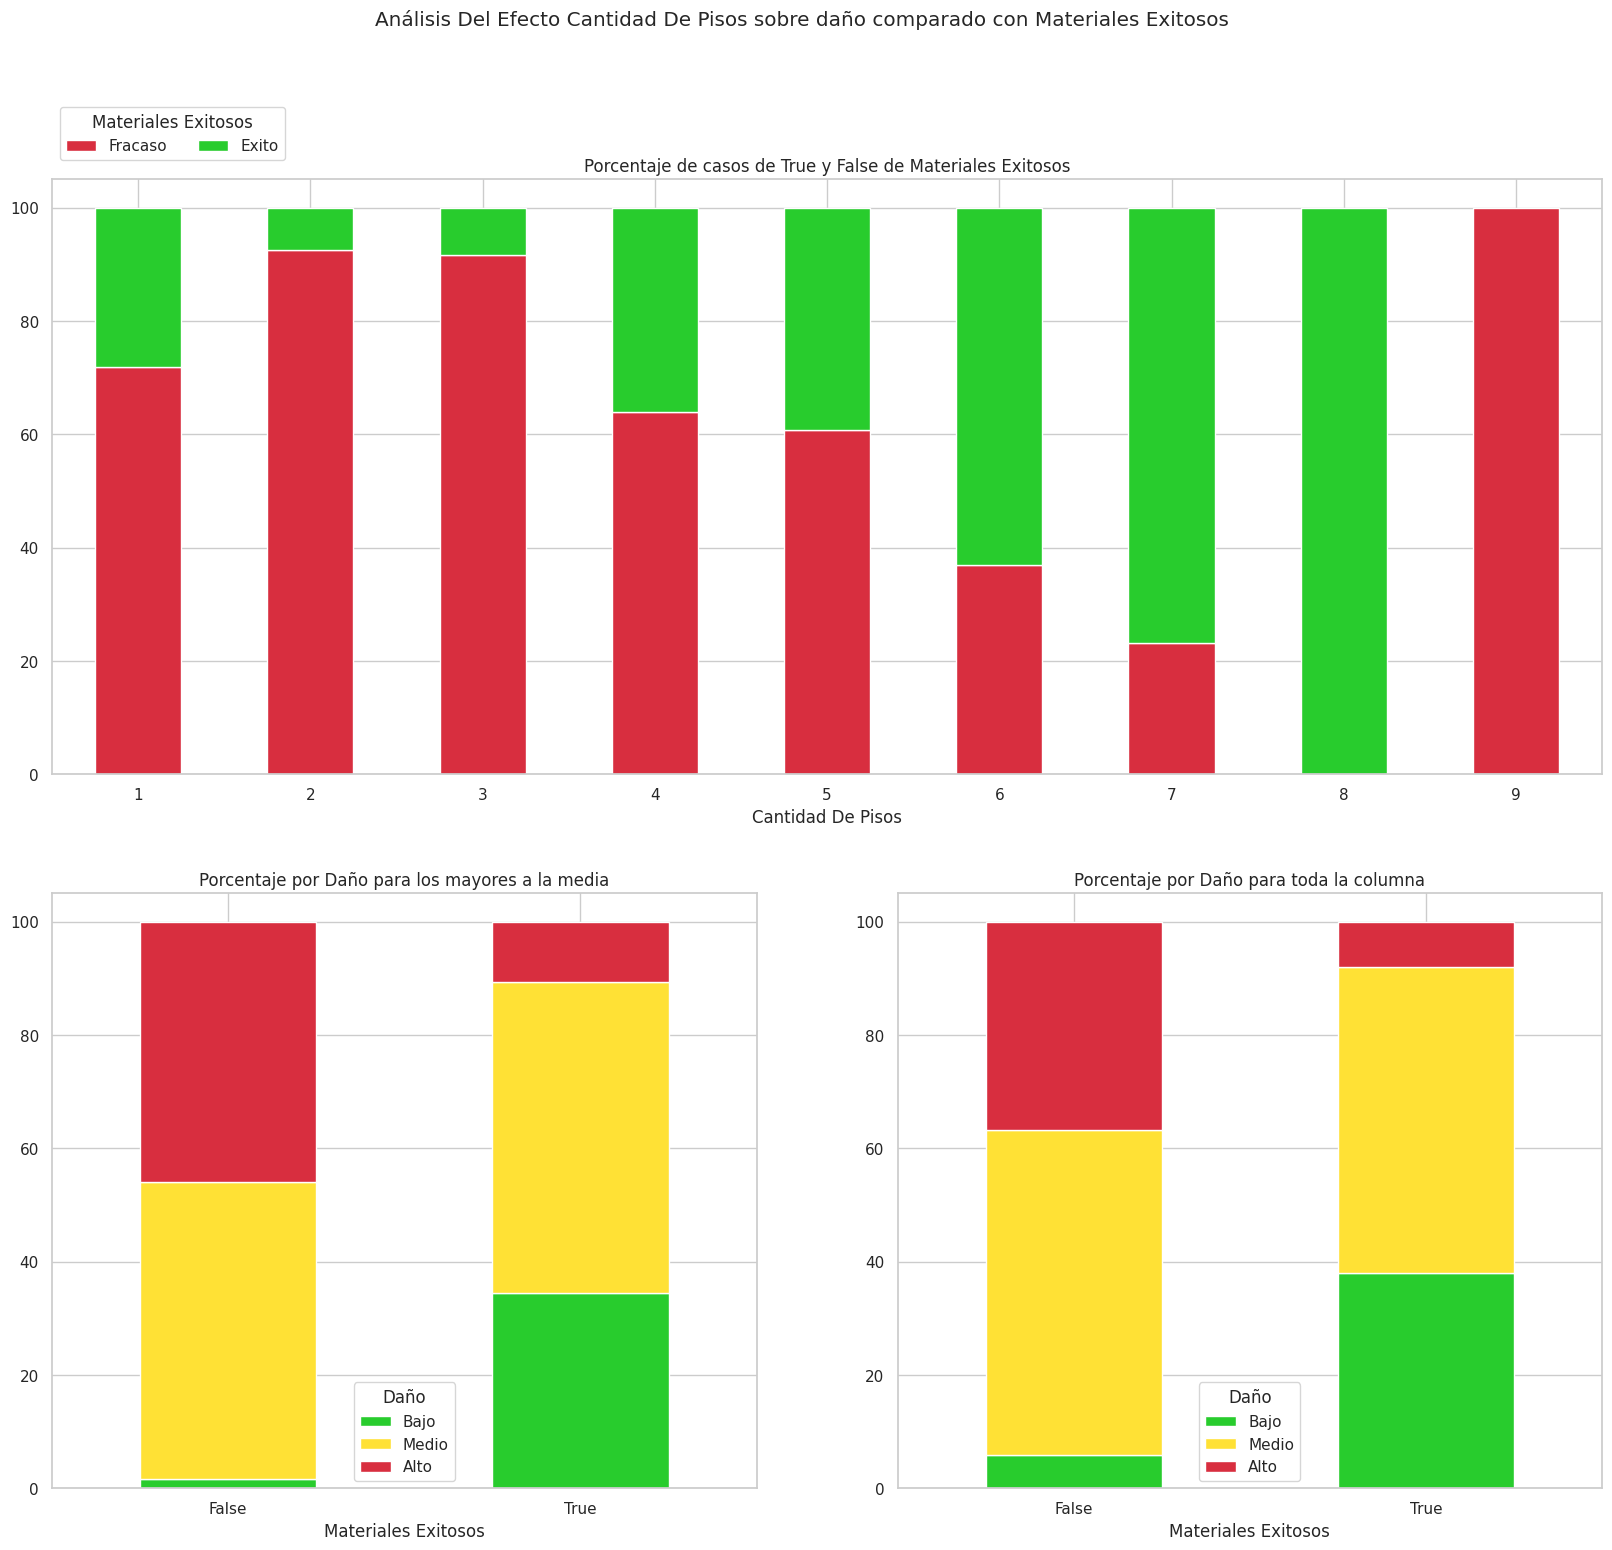

In [ ]:
plot_comparaciones("count_floors_pre_eq", "has_superstructure_success","Cantidad De Pisos","Materiales Exitosos")

### Tipo de piso

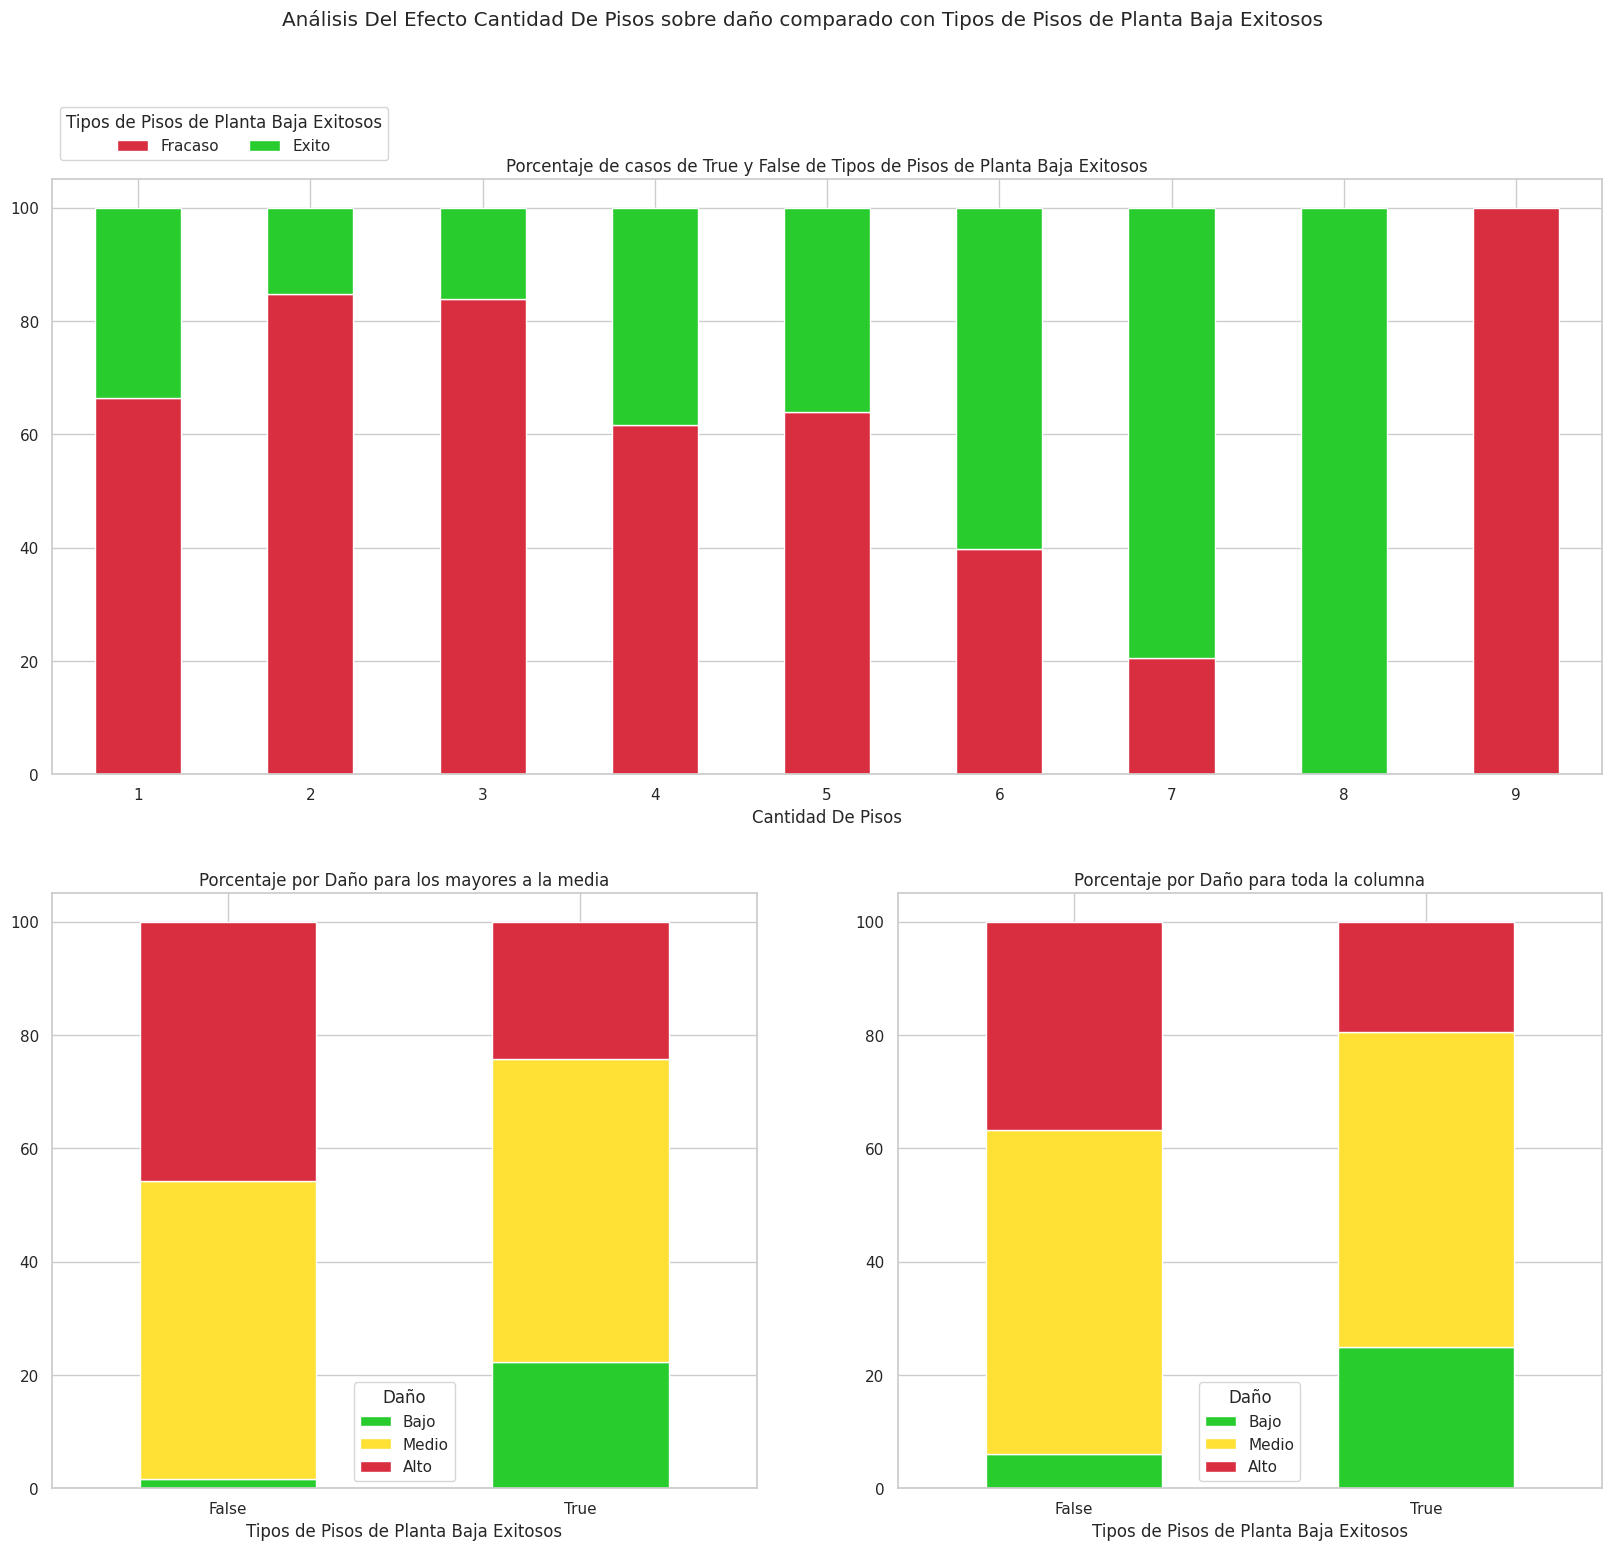

In [ ]:
plot_comparaciones("count_floors_pre_eq", "ground_floor_success","Cantidad De Pisos","Tipos de Pisos de Planta Baja Exitosos")

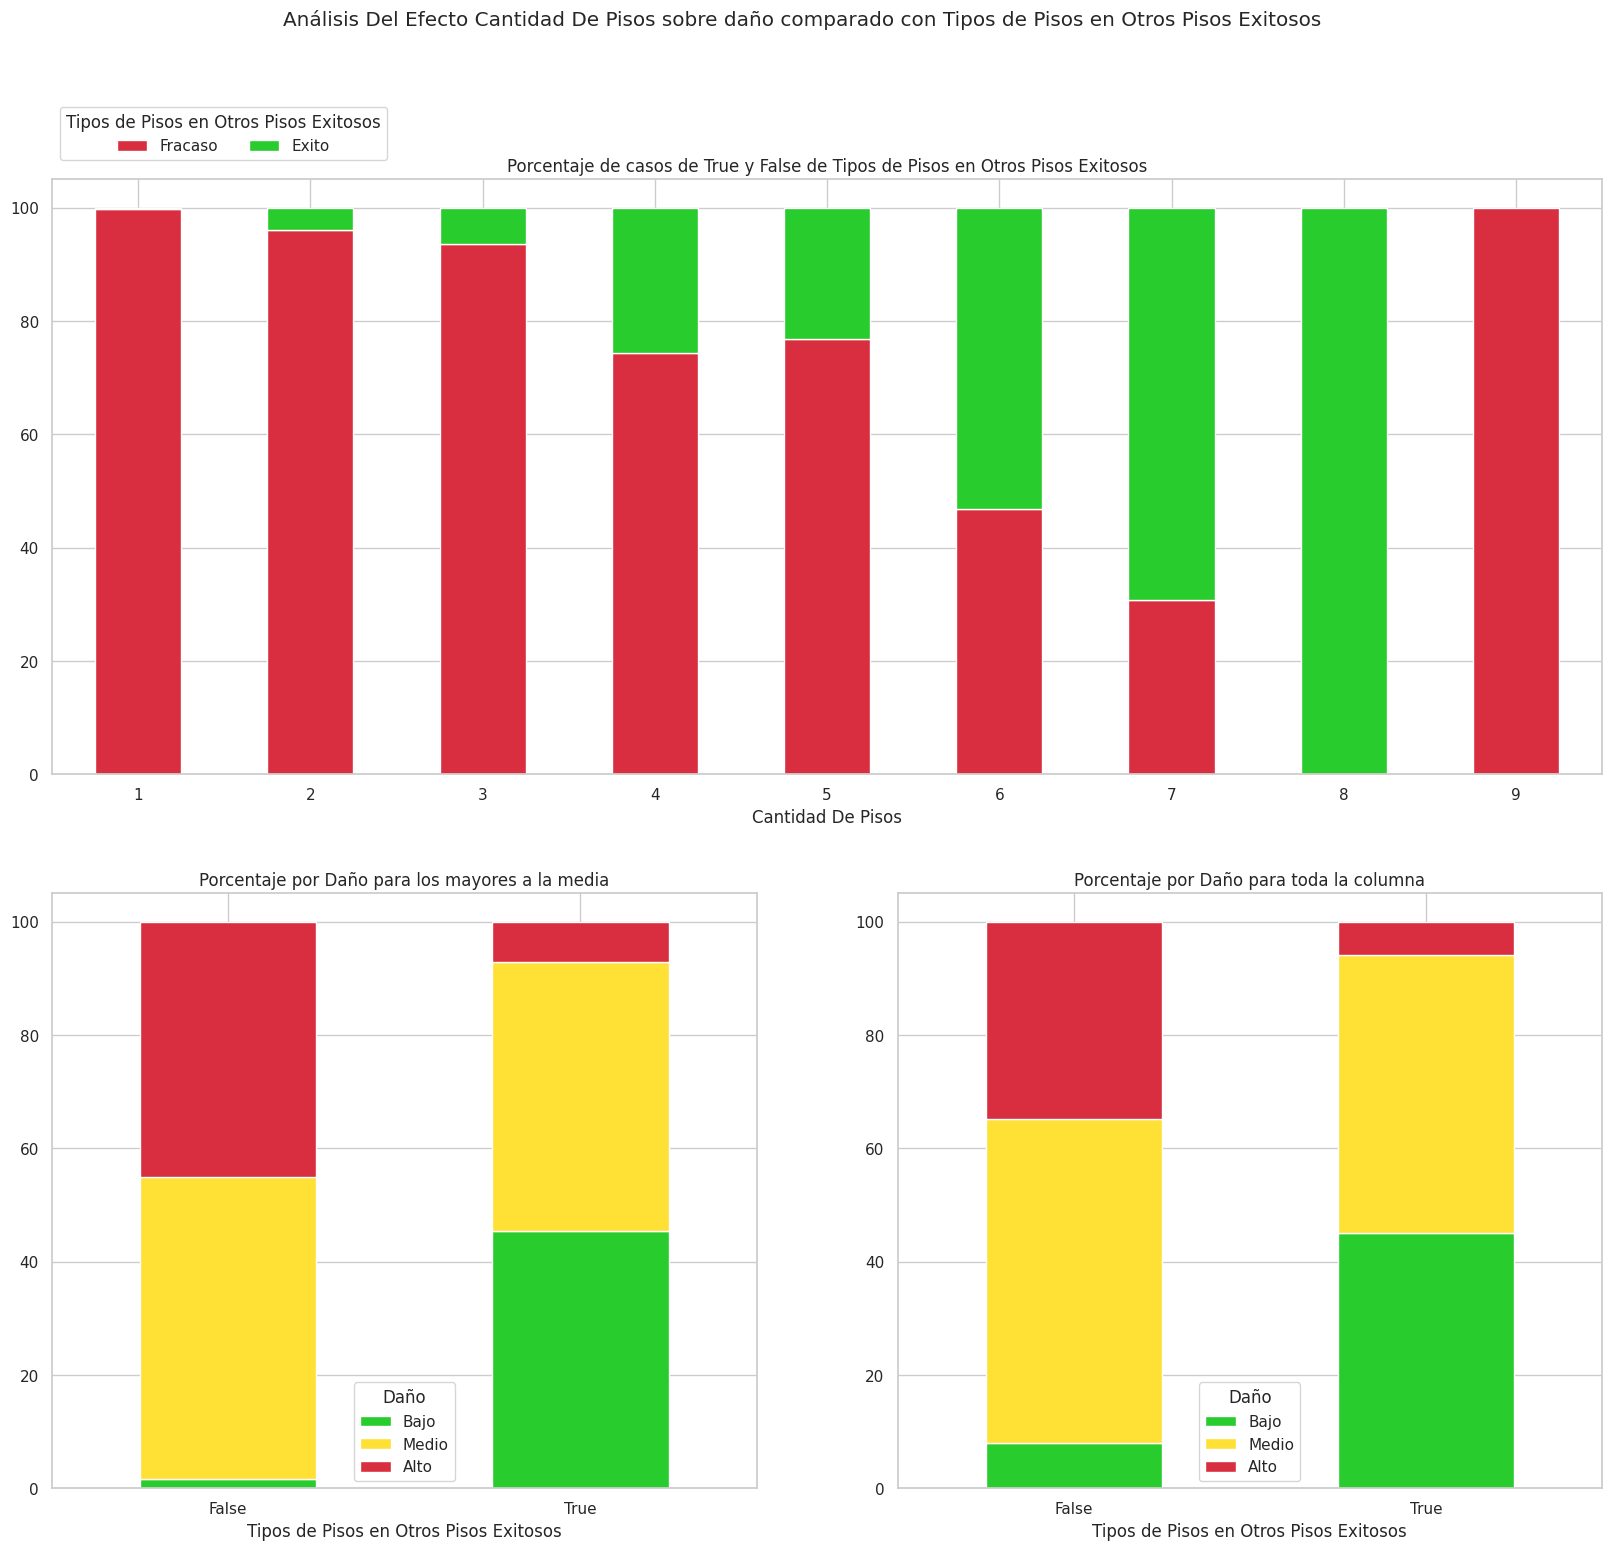

In [ ]:
plot_comparaciones("count_floors_pre_eq", "other_floor_success","Cantidad De Pisos","Tipos de Pisos en Otros Pisos Exitosos")

### `has_secondary_use`

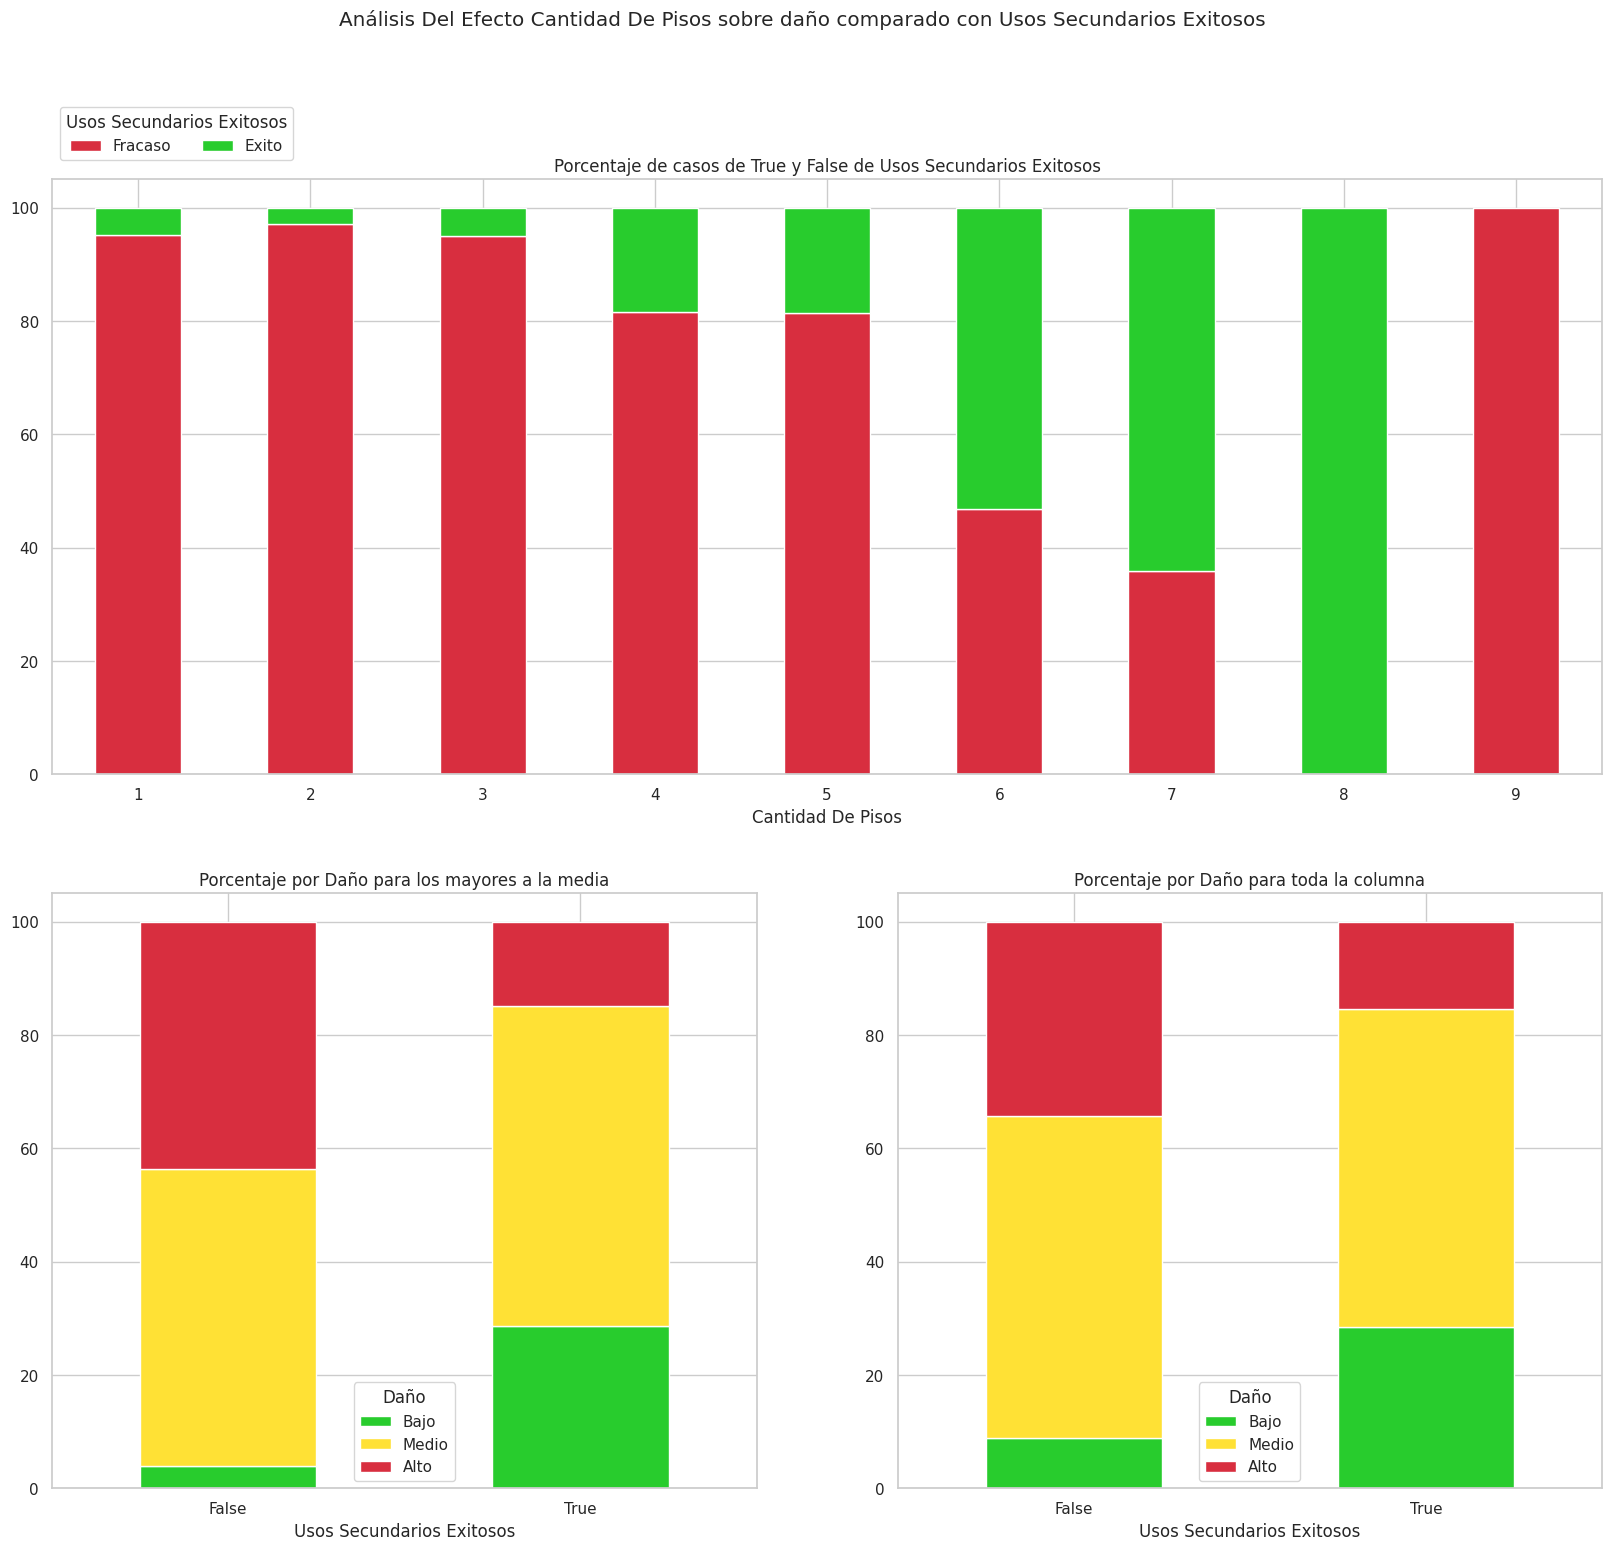

In [ ]:
plot_comparaciones("count_floors_pre_eq", "has_secondary_use_success","Cantidad De Pisos","Usos Secundarios Exitosos")

Vemos una gran similitud de todos los gráficos que realizamos, por lo tanto aquí nos detendremos y examinaremos la correlación entre los casos exitosos.

In [ ]:
data_success = useful_data.filter(regex='success')

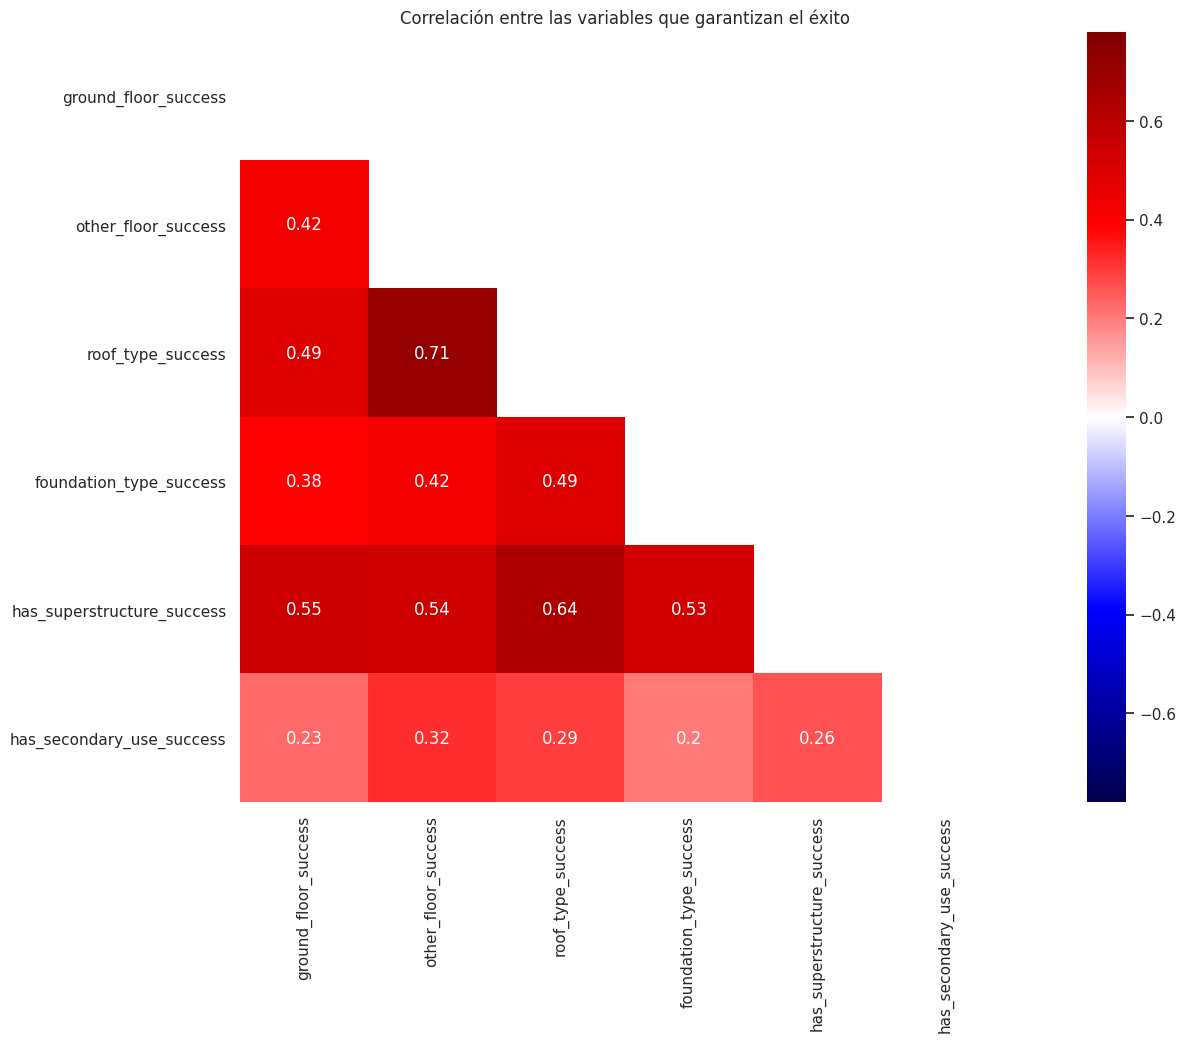

In [ ]:
corrMatrix = data_success.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True    
with sns.axes_style("white"):
          f, ax = plt.subplots(figsize=(20, 10))
          ax = sns.heatmap(corrMatrix, mask=mask, vmin=-0.78, vmax=0.78, cbar = True, annot = True, square=True, cmap='seismic')
plt.title("Correlación entre las variables que garantizan el éxito")
plt.show()

Apreciamos una fuerte correlación entre **la mayor parte** de los casos de éxito. Es decir, es muy probable que si una edificación tiene un caso de éxito, tiene algún caso de éxito más.

Esto se corrobora con la correlación Pearson estimada más arriba.

Examinando lo mismo para los casos de fracaso:

In [ ]:
data_failure = useful_data.filter(regex='failure')

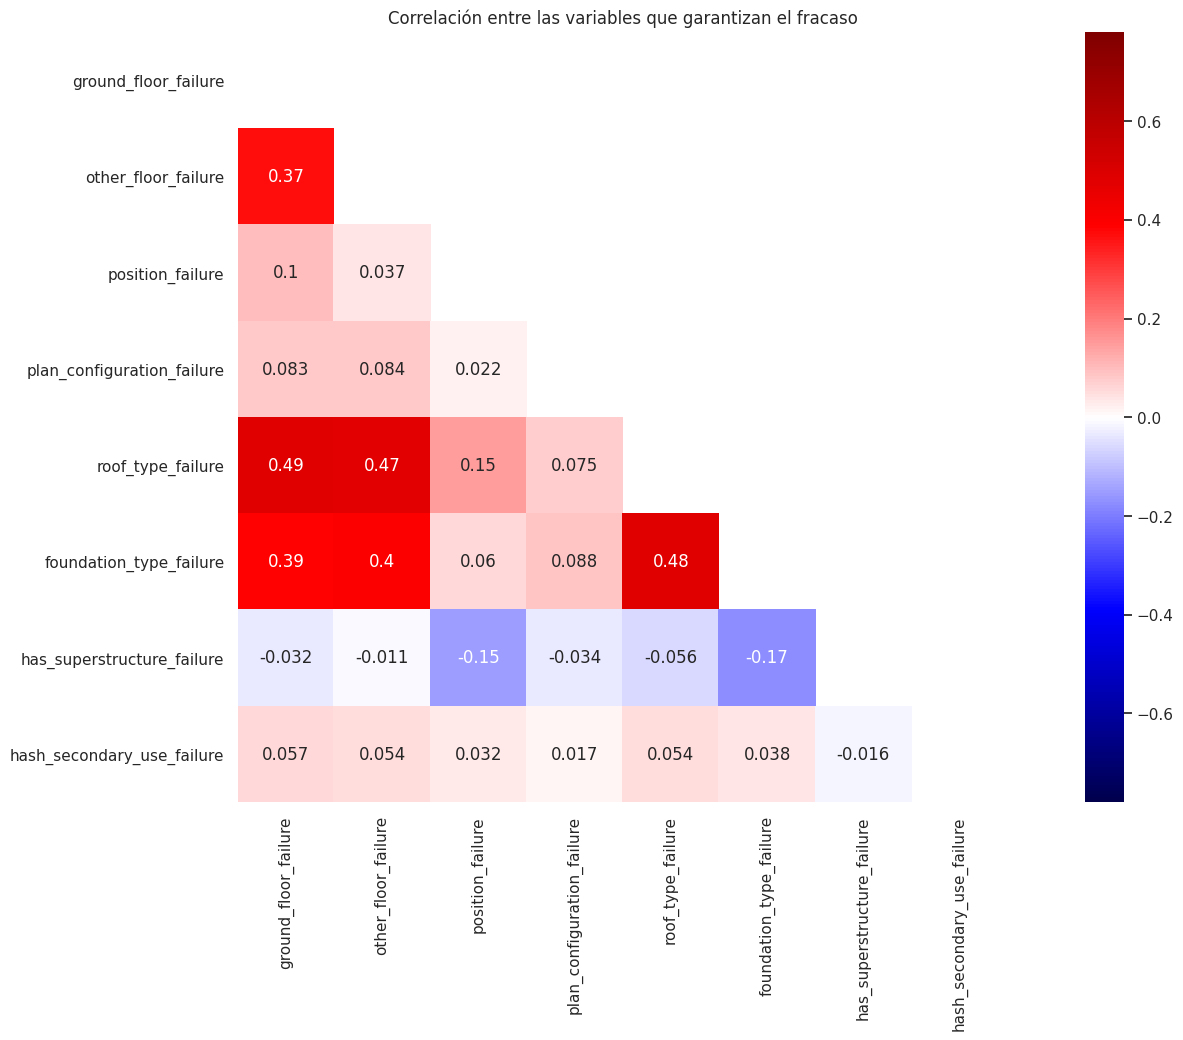

In [ ]:
corrMatrix = data_failure.corr()
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True    
with sns.axes_style("white"):
          f, ax = plt.subplots(figsize=(20, 10))
          ax = sns.heatmap(corrMatrix, mask=mask, vmin=-0.78, vmax=0.78, cbar = True, annot = True, square=True, cmap='seismic')
plt.title("Correlación entre las variables que garantizan el fracaso")
plt.show()

Podemos apreciar que los casos de fracaso no presentan una correlación general, pero si hay una correlación muy fuerte, particularmente sacando el apartado de `has_superstructure_failure`.

Para el caso de éxito, habíamos concluido que `has_superstructure` no tenía variables representativas, por lo tanto no aparece en el análisis de los casos éxitosos. Esto podría o no indicar que, quitando `has_superstructure`, el tener condiciones favorables o desfavorables para un daño menor viene dado por tener una serie de variables.

**Conclusión:**
* Tener solo una variable de éxito en un apartado (por ejemplo, tener x en `ground_floor_type`) **no garantiza el éxito**, sino que viene garantizado por enlazar más de una de estas condiciones.
* Se aprecia lo mismo para el caso fallido, a excepción de `has_superstructure`. Es decir, los materiales de construcción son muy importantes, ya que estos podrían por sí solos garantizar el fracaso ante un terremoto.
* A partir de esto, nos podemos independizar de las variables que parecen relativas pero que no hacen a la composición de los edificios (años, altura, área, estado legal de la tierra, etc).

# Independizándonos de los aspectos sociales:

Una de las hipótesis fuertes que nos planteamos al inicio del trabajo es si el aspecto social tiene influencia sobre el daño que sufren las edificaciones.

Nos pareció lógico que lo social no tenga un papel preponderante, sino que sean las condiciones en que están las edificaciones (que pueden originarse por aspectos sociales).

Al responder las preguntas de las variables más importantes para el grado de daño, pudimos independizarnos de todos los aspectos sociales, exceptuando la cantidad de familias que tiene una edificación.


Por lo tanto, estudiaremos si existe alguna relación, para poder realizar conclusiones más profundas sobre los aspectos sociales.

In [ ]:
useful_data["count_families"] = data["count_families"]

In [ ]:
failure = useful_data.filter(regex='failure')

In [ ]:
useful_data["has_any_failure_group"] = failure.iloc[:, 0] + failure.iloc[:, 1] + failure.iloc[:, 2] + failure.iloc[:, 3] + failure.iloc[:, 4] + failure.iloc[:, 5] + failure.iloc[:,7 ]

In [ ]:
failure.head(1)

ground_floor_failure  ...  has_any_failure_group
0                  True  ...                   True

[1 rows x 9 columns]

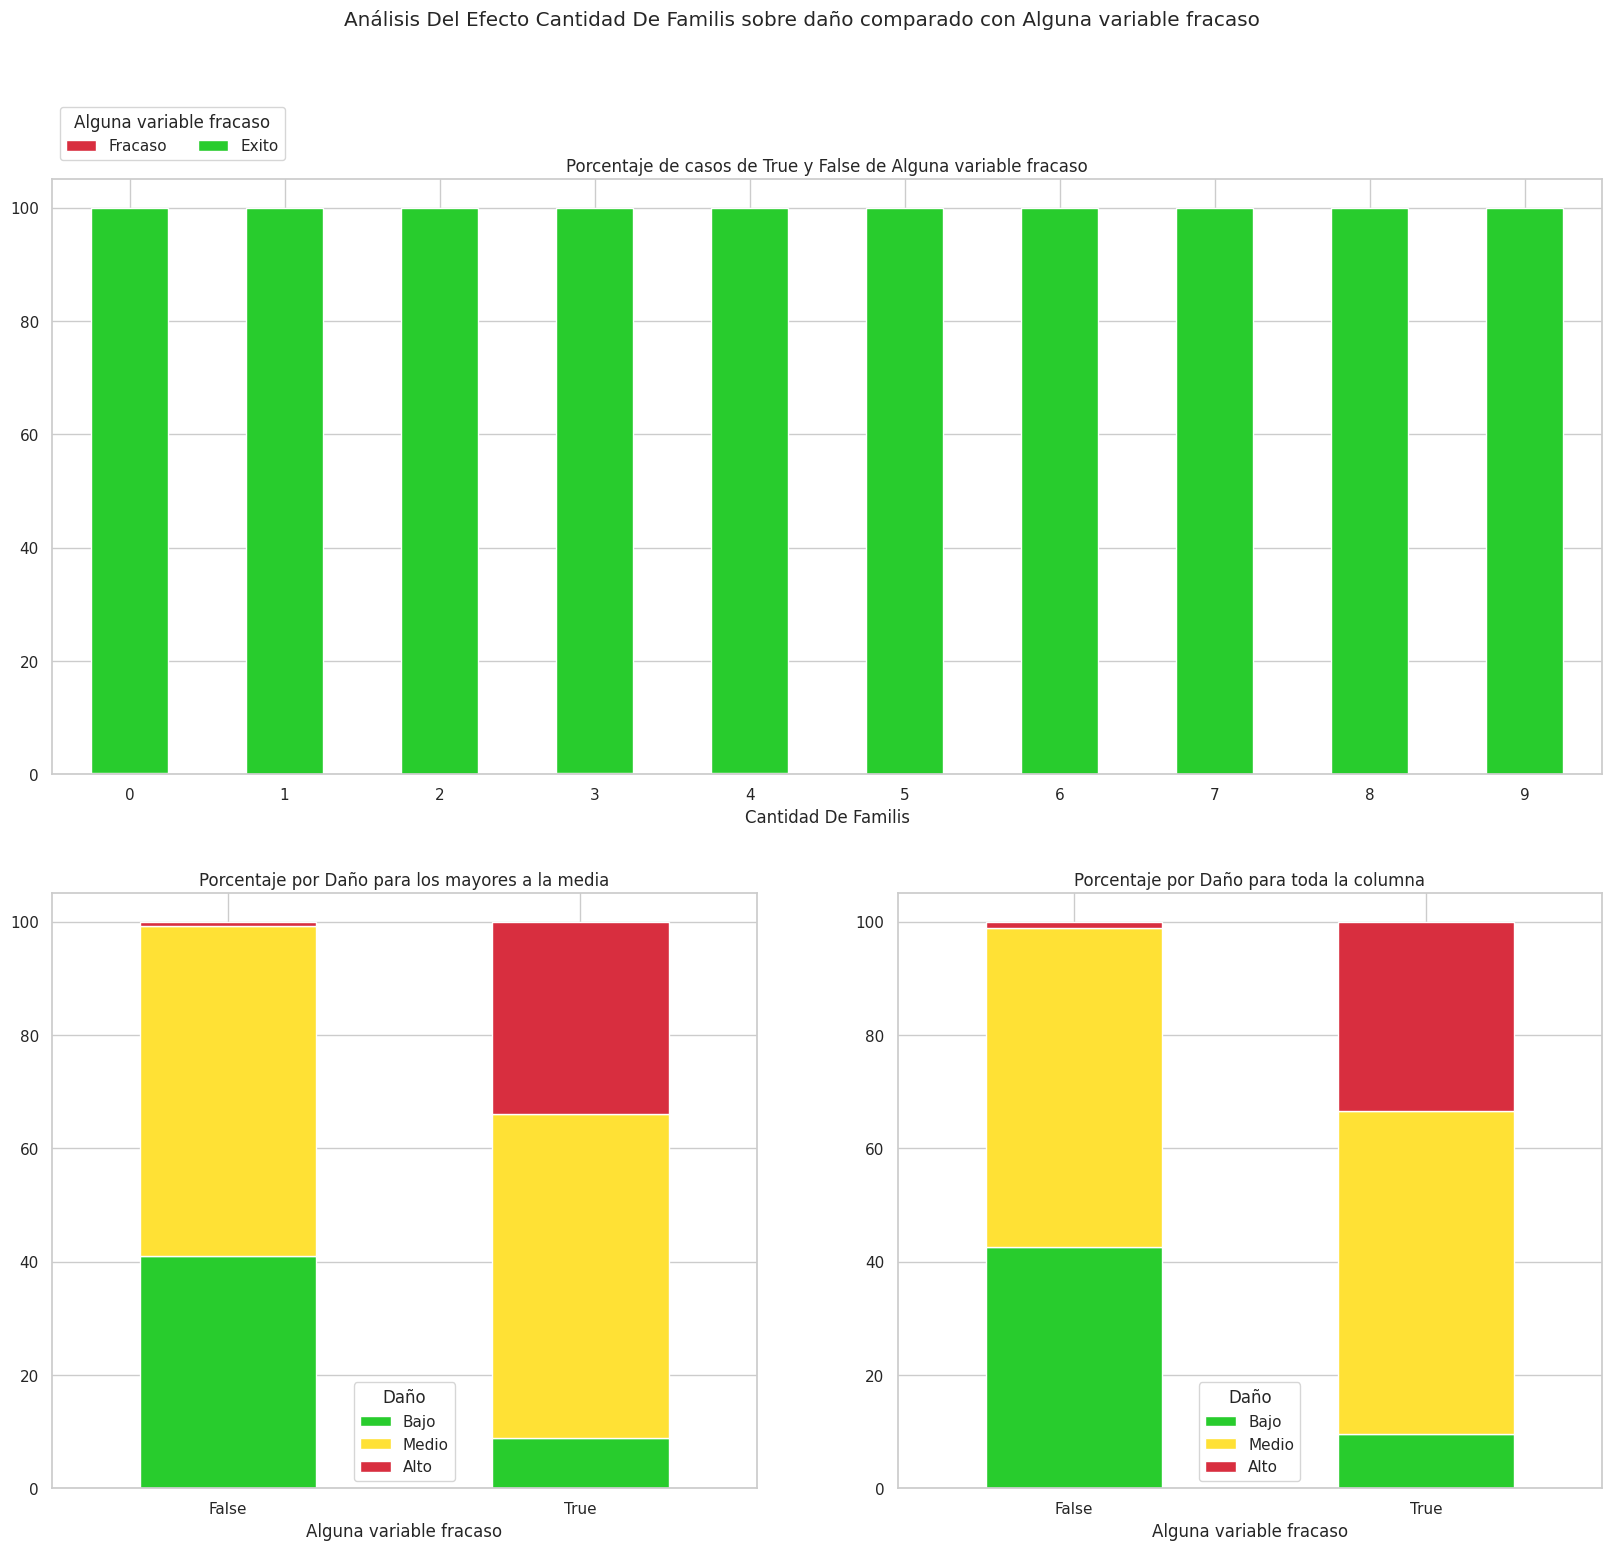

In [ ]:
plot_comparaciones("count_families", "has_any_failure_group","Cantidad De Familis","Alguna variable fracaso")

El gráfico superior nos dice que para cada grupo de cantidades de familias (1, 2, 3, etc), hay familias que viven en una edificación con una condición propensa al fracaso ante un sismo.
En los gráficos inferiores apreciamos que cada vez que solamente las se llega a un daño alto cuando las condiciones de fracaso son positivas. 

Estas conclusiones tienen coherencia, ya que una familia vive en una edificación y este puede o no caerse independientemente de la familia.

Por lo tanto, podemos independizarnos de los aspectos sociales.

**Conclusión:**
Los aspectos sociales, tales como la cantidad de familias en las edificaciones, los usos secundarios (que figuran como importantes, pero muestran correlación fuerte con todas las variables que garantizan fracaso), o la condición legal en la tierra no son importantes por sí solas, sino que son importantes en un contexto.
Por ejemplo, una edificación que presente una elevada cantidad de familias para un área pequeña y cantidad de pisos/altura pequeña puede apreciarse como una edificación carente, donde se puede construir sin planificación o uso de materiales especiales, por lo tanto pueden ser más propensas a sufrir mayores daños.

# Entendiendo la variable `has_superstructure`

Nos queda entender la única variable que no se correlaciona de forma fuerte con los demás casos de fracaso.

In [ ]:
superstructure = useful_data[(useful_data["has_superstructure_failure"]) & (~useful_data["has_any_failure_group"])]

In [ ]:
superstructure

building_id  damage_grade  ...  count_families  has_any_failure_group
6552         283580             2  ...               1                  False
7395         320436             2  ...               1                  False
8974         461990             1  ...               1                  False
11367        138669             2  ...               1                  False
14065        571023             2  ...               1                  False
...             ...           ...  ...             ...                    ...
231872       518783             1  ...               0                  False
238591        84985             2  ...               1                  False
244125       796631             1  ...               1                  False
248037       422483             2  ...               1                  False
258126       692552             1  ...               1                  False

[75 rows x 27 columns]

In [ ]:
casos_exito = superstructure[superstructure["damage_grade"] == 1]
casos_exito.head(10)

building_id  damage_grade  ...  count_families  has_any_failure_group
8974        461990             1  ...               1                  False
14347       220200             1  ...               1                  False
22944       220010             1  ...               1                  False
26456       478952             1  ...               0                  False
44430       614617             1  ...               1                  False
54285       890590             1  ...               1                  False
64610        86190             1  ...               1                  False
65798       996300             1  ...               1                  False
83670        10151             1  ...               0                  False
98200        13060             1  ...               1                  False

[10 rows x 27 columns]

In [ ]:
c = casos_exito.groupby("has_superstructure_failure").sum().filter(regex='success')
c

ground_floor_success  ...  has_secondary_use_success
has_superstructure_failure                        ...                           
True                                          34  ...                         15

[1 rows x 6 columns]

In [ ]:
c.values.tolist()[0]

[34, 28, 34, 33, 32, 15]

In [ ]:
import plotly.express as px
import pandas as pd
df = pd.DataFrame(dict(
    r=c.values.tolist()[0],
    theta=c.columns.tolist()))
fig = px.line_polar(df, r='r', theta='theta', line_close=True,color_discrete_sequence=['green'], width=1300, height=800)

fig.update_traces(fill='toself')
fig.update_layout(
    title={
        'text': "Casos de éxito para contrarrestar has_superstructure",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
      title_font_size=30,
      polar = dict(
      radialaxis_tickfont_size = 1,
      angularaxis = dict(
        tickfont_size=20,
        rotation=330, # start position of angular axis
        direction="counterclockwise"
      )))
fig.show()

In [ ]:
useful_data.head(1)

building_id  damage_grade  ...  count_families  has_any_failure_group
0       802906             3  ...               1                   True

[1 rows x 27 columns]

**Conclusión:**
* Para contrarrestar el efecto del fracaso en uso secundario, se observa que se tienen que tener todo el resto de los componentes de éxito de forma elevada, así asegurar un daño menor.